In [2]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
pd.read_csv("../raw_data/facturation_train.csv").head(10)

ID_CPTE PERIODID_MY StatementDate  CurrentTotalBalance  CashBalance  \
0  99690111  2015-05-01    2015-05-03              8497.84      4293.12   
1  99690111  2014-11-01    2014-11-03               866.00         0.00   
2  99690111  2015-06-01    2015-05-31             10790.95      5224.44   
3  99690111  2015-10-01    2015-10-04             12388.46      4786.08   
4  99690111  2015-11-01    2015-11-02             12746.50      4818.48   
5  99690111  2015-08-01    2015-08-02             10610.05      4753.35   
6  99690111  2015-09-01    2015-08-30             11417.12      4616.46   
7  99690111  2014-12-01    2014-12-03              1151.85         0.00   
8  99690111  2015-02-01    2015-01-31              4045.67      1148.45   
9  99690111  2015-12-01    2015-11-30             13119.60      4791.44   

   CreditLimit  DelqCycle  
0      16200.0          0  
1      12000.0          0  
2      16200.0          0  
3      16200.0          0  
4      16200.0          0  
5      16200.0          0  
6      16200.0          0  
7      12000.0          0  
8      16200.0          0  
9      16200.0          0

In [4]:
performance_train = pd.read_csv("../raw_data/performance_train.csv")
performance_train.head(10)

ID_CPTE PERIODID_MY  Default
0  99690111  2015-12-01        0
1  57427180  2012-12-01        0
2  29617912  2015-12-01        0
3  61632809  2015-12-01        0
4  14117855  2013-12-01        0
5  23700394  2013-12-01        0
6  27881705  2012-12-01        0
7  46100731  2012-12-01        0
8  58512689  2014-12-01        0
9  24661392  2016-12-01        0

In [5]:
paiements_train = pd.read_csv("../raw_data/paiements_train.csv")
paiements_train.head(10)

ID_CPTE  TRANSACTION_AMT     TRANSACTION_DTTM PAYMENT_REVERSAL_XFLG
0  99690111            208.0  2015-04-26 00:00:00                     Q
1  99690111            176.8  2015-05-28 00:00:00                     Q
2  99690111            200.0  2015-03-27 04:00:00                     Q
3  99690111             80.8  2015-04-02 00:00:00                     Q
4  99690111            250.0  2015-11-24 00:00:00                     Q
5  99690111            273.0  2015-12-26 00:00:00                     Q
6  99690111            267.5  2015-08-23 00:00:00                     Q
7  99690111            618.0  2015-07-27 00:00:00                     Q
8  99690111            226.6  2015-09-30 00:00:00                     Q
9  99690111            244.8  2015-10-27 00:00:00                     Q

In [6]:
transactions_train = pd.read_csv("../raw_data/transactions_train.csv")
transactions_train.head(5)

ID_CPTE MERCHANT_CATEGORY_XCD  MERCHANT_CITY_NAME MERCHANT_COUNTRY_XCD  \
0  99690111                     A              365767                   DP   
1  99690111                     L             2635650                   DP   
2  99690111                     L             2635650                   DP   
3  99690111                     J              680536                   AF   
4  99690111                     J              680536                   AF   

  DECISION_XCD  PRIOR_CREDIT_LIMIT_AMT  TRANSACTION_AMT  \
0            C                  5927.0            52.53   
1            C                 13343.0            28.35   
2            C                 13343.0             0.00   
3            C                  9430.0             0.00   
4            C                 10600.0             0.00   

  TRANSACTION_CATEGORY_XCD     TRANSACTION_DTTM TRANSACTION_TYPE_XCD SICGROUP  
0                        E  2015-06-20 12:00:00                    F       AN  
1                        B  2015-01-25 12:00:00                    F       AN  
2                        A  2015-01-26 12:00:00                    G       AN  
3                        A  2015-03-25 08:00:00                    G       AW  
4                        A  2015-03-03 08:00:00                    G       AW

In [8]:
Input = pd.read_csv("../intermidiate_data/20180709_2_features.csv")
X_test = pd.read_csv("../intermidiate_data/20180709_2_features_test.csv")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116055780>]],
      dtype=object)

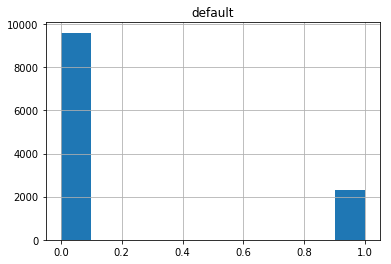

In [9]:
Input.hist("default")

In [10]:
def split(Input, Oversample = 1):
    Input_1 = Input[Input["default"] ==1] 
    Input_0 = Input[Input["default"] == 0]
    Input_1_train_valid, Input_1_test = train_test_split(Input_1, test_size = 0.2)
    Input_0_train_valid, Input_0_test = train_test_split(Input_0, test_size = 0.05)
    Input_train_valid = Input_0_train_valid
    for i in range(Oversample):
        Input_train_valid = Input_train_valid.append(Input_1_train_valid)
        print(Input_train_valid.shape)
    Input_train_valid = Input_train_valid.sample(frac = 1)
    Input_train, Input_valid = train_test_split(Input_train_valid, test_size = 0.2)
    Input_test = Input_0_test.append(Input_1_test)
    Input_test = Input_test.sample(frac = 1)
    return Input_train, Input_valid, Input_test

In [11]:
Input_train, Input_valid, Input_test = split(Input)

(10959, 35)


In [12]:

Input_train_y = Input_train["default"]
Input_train_X = Input_train.drop(columns = ["default"])
Input_valid_y = Input_valid["default"]
Input_valid_X = Input_valid.drop(columns = ["default"])
Input_test_y = Input_test["default"]
Input_test_X = Input_test.drop(columns = ["default"])
print("training sample number is :"+str(Input_train_X.shape[0]))
print("validation sample number is : "+str(Input_valid_X.shape[0]))
print("testing sample number is ： " +str(Input_test_X.shape[0]))

training sample number is :8767
validation sample number is : 2192
testing sample number is ： 941


In [45]:
n_estimators = list(range(1,100,5))
learning_rates =[x/1000 for x in list(range(25,500,10))]
def build_gridsearch_lgbm(n_estimators, learning_rates):
    estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1',n_estimators = 20, num_leaves = 38)
    param_grid = {'n_estimators': n_estimators,'learning_rate': learning_rates}
    gridsearch = GridSearchCV(estimator, param_grid)
    return gridsearch

gridsearch = build_gridsearch_lgbm(n_estimators, learning_rates)

gridsearch.fit(Input_train_X, Input_train_y,
               eval_set=[(Input_valid_X, Input_valid_y)],
               eval_metric=['auc', 'binary_logloss'],
               early_stopping_rounds=5)


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.847041
[16]	valid_0's binary_logloss: 0.387951	valid_0's auc: 0.847272
Did not meet early stopping. Best iteration is:
[16]	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 0.844627
[16]	valid_0's binary_logloss: 0.38777	valid_0's auc: 0.845249
[17]	valid_0's binary_logloss: 0.385133	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.842599
[16]	valid_0's binary_logloss: 0.389762	valid_0's auc: 0.842733
[17]	valid_0's binary_logloss: 0.387123	valid_0's auc: 0.843195
[18]	valid_0's binary_logloss: 0.384792	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.847041
[16]	valid_0's binary_logloss: 0.387951	valid_0's auc: 0.847272
[17]	valid_0's binary_logloss: 0.385423	valid_0's auc: 0.848297
[18]	valid_0's binary_logloss: 0.383134	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.847041
[16]	valid_0's binary_logloss: 0.387951	valid_0's auc: 0.847272
[17]	valid_0's binary_logloss: 0.385423	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.847041
[16]	valid_0's binary_logloss: 0.387951	valid_0's auc: 0.847272
[17]	valid_0's binary_logloss: 0.385423	valid_0's auc: 0.848297
[18]	valid_0's binary_logloss: 0.383134	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.842599
[16]	valid_0's binary_logloss: 0.389762	valid_0's auc: 0.842733
[17]	valid_0's binary_logloss: 0.387123	valid_0's auc: 0.843195
[18]	valid_0's binary_logloss: 0.384792	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 0.844627
[16]	valid_0's binary_logloss: 0.38777	valid_0's auc: 0.845249
[17]	valid_0's binary_logloss: 0.385133	valid_0's auc: 0.845534
[18]	valid_0's binary_logloss: 0.382596	valid_0's auc: 0.846232
[19]	valid_0's binary_logloss: 0.380377	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.842599
[16]	valid_0's binary_logloss: 0.389762	valid_0's auc: 0.842733
[17]	valid_0's binary_logloss: 0.387123	valid_0's auc: 0.843195
[18]	valid_0's binary_logloss: 0.384792	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 0.844627
[16]	valid_0's binary_logloss: 0.38777	valid_0's auc: 0.845249
[17]	valid_0's binary_logloss: 0.385133	valid_0's auc: 0.845534
[18]	valid_0's binary_logloss: 0.382596	valid_0's auc: 0.846232
[19]	valid_0's binary_logloss: 0.380377	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.847041
[16]	valid_0's binary_logloss: 0.387951	valid_0's auc: 0.847272
[17]	valid_0's binary_logloss: 0.385423	valid_0's auc: 0.848297
[18]	valid_0's binary_logloss: 0.383134	valid_0's auc: 0.848474
[19]	valid_0's binary_logloss: 0.380627	valid_0's auc: 0.851213
[20]	valid_0's binary_logloss: 0.378147	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 0.844627
[16]	valid_0's binary_logloss: 0.38777	valid_0's auc: 0.845249
[17]	valid_0's binary_logloss: 0.385133	valid_0's auc: 0.845534
[18]	valid_0's binary_logloss: 0.382596	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.847041
[16]	valid_0's binary_logloss: 0.387951	valid_0's auc: 0.847272
[17]	valid_0's binary_logloss: 0.385423	valid_0's auc: 0.848297
[18]	valid_0's binary_logloss: 0.383134	valid_0's auc: 0.848474
[19]	valid_0's binary_logloss: 0.380627	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 0.844627
[16]	valid_0's binary_logloss: 0.38777	valid_0's auc: 0.845249
[17]	valid_0's binary_logloss: 0.385133	valid_0's auc: 0.845534
[18]	valid_0's binary_logloss: 0.382596	valid_0's auc: 0.846232
[19]	valid_0's binary_logloss: 0.380377	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448456	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442712	valid_0's auc: 0.82941
[3]	valid_0's binary_logloss: 0.437326	valid_0's auc: 0.83294
[4]	valid_0's binary_logloss: 0.432505	valid_0's auc: 0.832139
[5]	valid_0's binary_logloss: 0.42764	valid_0's auc: 0.835041
[6]	valid_0's binary_logloss: 0.42328	valid_0's auc: 0.836603
[7]	valid_0's binary_logloss: 0.41911	valid_0's auc: 0.837125
[8]	valid_0's binary_logloss: 0.415356	valid_0's auc: 0.836658
[9]	valid_0's binary_logloss: 0.411754	valid_0's auc: 0.83713
[10]	valid_0's binary_logloss: 0.408271	valid_0's auc: 0.837336
[11]	valid_0's binary_logloss: 0.405033	valid_0's auc: 0.837322
[12]	valid_0's binary_logloss: 0.40177	valid_0's auc: 0.838799
[13]	valid_0's binary_logloss: 0.398424	valid_0's auc: 0.840667
[14]	valid_0's binary_logloss: 0.395304	valid_0's auc: 0.841469
[15]	valid_0's binary_logloss: 0.392434	valid_0's auc: 0.84

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448322	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442425	valid_0's auc: 0.81963
[3]	valid_0's binary_logloss: 0.437045	valid_0's auc: 0.819457
[4]	valid_0's binary_logloss: 0.431775	valid_0's auc: 0.821962
[5]	valid_0's binary_logloss: 0.426676	valid_0's auc: 0.832593
[6]	valid_0's binary_logloss: 0.422094	valid_0's auc: 0.838011
[7]	valid_0's binary_logloss: 0.417486	valid_0's auc: 0.840537
[8]	valid_0's binary_logloss: 0.413687	valid_0's auc: 0.840894
[9]	valid_0's binary_logloss: 0.409979	valid_0's auc: 0.839538
[10]	valid_0's binary_logloss: 0.406281	valid_0's auc: 0.840626
[11]	valid_0's binary_logloss: 0.402908	valid_0's auc: 0.841596
[12]	valid_0's binary_logloss: 0.399545	valid_0's auc: 0.842721
[13]	valid_0's binary_logloss: 0.396523	valid_0's auc: 0.843344
[14]	valid_0's binary_logloss: 0.393436	valid_0's auc: 0.84419
[15]	valid_0's binary_logloss: 0.390566	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.448299	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.442204	valid_0's auc: 0.8295
[3]	valid_0's binary_logloss: 0.436713	valid_0's auc: 0.83049
[4]	valid_0's binary_logloss: 0.431462	valid_0's auc: 0.833028
[5]	valid_0's binary_logloss: 0.426663	valid_0's auc: 0.832809
[6]	valid_0's binary_logloss: 0.42214	valid_0's auc: 0.835606
[7]	valid_0's binary_logloss: 0.417758	valid_0's auc: 0.835607
[8]	valid_0's binary_logloss: 0.413477	valid_0's auc: 0.837607
[9]	valid_0's binary_logloss: 0.409413	valid_0's auc: 0.838479
[10]	valid_0's binary_logloss: 0.405723	valid_0's auc: 0.8398
[11]	valid_0's binary_logloss: 0.402186	valid_0's auc: 0.840422
[12]	valid_0's binary_logloss: 0.39917	valid_0's auc: 0.840662
[13]	valid_0's binary_logloss: 0.396224	valid_0's auc: 0.840251
[14]	valid_0's binary_logloss: 0.393518	valid_0's auc: 0.84042
[15]	valid_0's binary_logloss: 0.390599	valid_0's auc: 0.8470

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 0.848811
[16]	valid_0's binary_logloss: 0.372206	valid_0's auc: 0.850318
[17]	valid_0's binary_logloss: 0.369658	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 0.853183
[16]	valid_0's binary_logloss: 0.372665	valid_0's auc: 0.854439
[17]	valid_0's binary_logloss: 0.370176	valid_0's auc: 0.854468
[18]	valid_0's binary_logloss: 0.367854	valid_0's auc: 0.854476
[19]	valid_0's binary_logloss: 0.365326	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 0.848811
[16]	valid_0's binary_logloss: 0.372206	valid_0's auc: 0.850318
[17]	valid_0's binary_logloss: 0.369658	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 0.853183
[16]	valid_0's binary_logloss: 0.372665	valid_0's auc: 0.854439
[17]	valid_0's binary_logloss: 0.370176	valid_0's auc: 0.854468
[18]	valid_0's binary_logloss: 0.367854	valid_0's auc: 0.854476
[19]	valid_0's binary_logloss: 0.365326	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's auc: 0.843931
[18]	valid_0's binary_logloss: 0.37022	valid_0's auc: 0.844281
[19]	valid_0's binary_logloss: 0.367816	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 0.853183
[16]	valid_0's binary_logloss: 0.372665	valid_0's auc: 0.854439
[17]	valid_0's binary_logloss: 0.370176	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's auc: 0.843931
[18]	valid_0's binary_logloss: 0.37022	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 0.853183
[16]	valid_0's binary_logloss: 0.372665	valid_0's auc: 0.854439
[17]	valid_0's binary_logloss: 0.370176	valid_0's auc: 0.854468
[18]	valid_0's binary_logloss: 0.367854	valid_0's auc: 0.854476
[19]	valid_0's binary_logloss: 0.365326	valid_0's auc: 0.855173
[20]	valid_0's binary_logloss: 0.363112	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 0.848811
[16]	valid_0's binary_logloss: 0.372206	valid_0's auc: 0.850318
[17]	valid_0's binary_logloss: 0.369658	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's auc: 0.843931
[18]	valid_0's binary_logloss: 0.37022	valid_0's auc: 0.844281
[19]	valid_0's binary_logloss: 0.367816	valid_0's auc: 0.845426
[20]	valid_0's binary_logloss: 0.365469	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.446013	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.438008	valid_0's auc: 0.832106
[3]	valid_0's binary_logloss: 0.431177	valid_0's auc: 0.831382
[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's auc: 0.843931
[18]	valid_0's binary_logloss: 0.37022	valid_0's auc: 0.844281
[19]	valid_0's binary_logloss: 0.367816	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.425081	valid_0's auc: 0.83429
[5]	valid_0's binary_logloss: 0.419091	valid_0's auc: 0.835315
[6]	valid_0's binary_logloss: 0.413704	valid_0's auc: 0.835762
[7]	valid_0's binary_logloss: 0.408899	valid_0's auc: 0.835357
[8]	valid_0's binary_logloss: 0.404404	valid_0's auc: 0.836488
[9]	valid_0's binary_logloss: 0.39965	valid_0's auc: 0.838935
[10]	valid_0's binary_logloss: 0.395417	valid_0's auc: 0.840674
[11]	valid_0's binary_logloss: 0.391515	valid_0's auc: 0.840936
[12]	valid_0's binary_logloss: 0.388038	valid_0's auc: 0.841078
[13]	valid_0's binary_logloss: 0.384605	valid_0's auc: 0.841638
[14]	valid_0's binary_logloss: 0.38157	valid_0's auc: 0.841759
[15]	valid_0's binary_logloss: 0.378117	valid_0's auc: 0.843202
[16]	valid_0's binary_logloss: 0.375692	valid_0's auc: 0.842724
[17]	valid_0's binary_logloss: 0.372727	valid_0's auc: 0.843931
[18]	valid_0's binary_logloss: 0.37022	valid_0's auc: 0.844281
[19]	valid_0's binary_logloss: 0.367816	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445826	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437904	valid_0's auc: 0.818967
[3]	valid_0's binary_logloss: 0.430673	valid_0's auc: 0.821891
[4]	valid_0's binary_logloss: 0.423683	valid_0's auc: 0.837177
[5]	valid_0's binary_logloss: 0.417102	valid_0's auc: 0.841302
[6]	valid_0's binary_logloss: 0.411984	valid_0's auc: 0.841559
[7]	valid_0's binary_logloss: 0.406772	valid_0's auc: 0.842433
[8]	valid_0's binary_logloss: 0.402075	valid_0's auc: 0.843285
[9]	valid_0's binary_logloss: 0.397584	valid_0's auc: 0.844609
[10]	valid_0's binary_logloss: 0.393124	valid_0's auc: 0.846204
[11]	valid_0's binary_logloss: 0.38902	valid_0's auc: 0.847306
[12]	valid_0's binary_logloss: 0.385343	valid_0's auc: 0.847747
[13]	valid_0's binary_logloss: 0.381805	valid_0's auc: 0.848009
[14]	valid_0's binary_logloss: 0.378463	valid_0's auc: 0.84859
[15]	valid_0's binary_logloss: 0.375395	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.445792	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.437724	valid_0's auc: 0.828677
[3]	valid_0's binary_logloss: 0.430478	valid_0's auc: 0.829695
[4]	valid_0's binary_logloss: 0.423665	valid_0's auc: 0.835453
[5]	valid_0's binary_logloss: 0.417552	valid_0's auc: 0.833931
[6]	valid_0's binary_logloss: 0.411607	valid_0's auc: 0.836838
[7]	valid_0's binary_logloss: 0.406109	valid_0's auc: 0.838744
[8]	valid_0's binary_logloss: 0.401086	valid_0's auc: 0.83925
[9]	valid_0's binary_logloss: 0.396967	valid_0's auc: 0.839863
[10]	valid_0's binary_logloss: 0.393061	valid_0's auc: 0.839532
[11]	valid_0's binary_logloss: 0.389386	valid_0's auc: 0.845574
[12]	valid_0's binary_logloss: 0.385618	valid_0's auc: 0.847548
[13]	valid_0's binary_logloss: 0.382291	valid_0's auc: 0.848373
[14]	valid_0's binary_logloss: 0.378795	valid_0's auc: 0.85136
[15]	valid_0's binary_logloss: 0.375558	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc: 0.846665
[16]	valid_0's binary_logloss: 0.363542	valid_0's auc: 0.848043
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.363542	valid_0's auc: 0.848043


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 0.849913
[16]	valid_0's binary_logloss: 0.360837	valid_0's auc: 0.850359
[17]	valid_0's binary_logloss: 0.35846	valid_0's auc: 0.850048
[18]	valid_0's binary_logloss: 0.356071	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc: 0.846665
[16]	valid_0's binary_logloss: 0.363542	valid_0's auc: 0.848043
[17]	valid_0's binary_logloss: 0.360751	valid_0's auc: 0.848995
[18]	valid_0's binary_logloss: 0.358136	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 0.849913
[16]	valid_0's binary_logloss: 0.360837	valid_0's auc: 0.850359
[17]	valid_0's binary_logloss: 0.35846	valid_0's auc: 0.850048
[18]	valid_0's binary_logloss: 0.356071	valid_0's auc: 0.85021
[19]	valid_0's binary_logloss: 0.353891	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.857587
[16]	valid_0's binary_logloss: 0.360759	valid_0's auc: 0.857703
[17]	valid_0's binary_logloss: 0.357878	valid_0's auc: 0.858246
[18]	valid_0's binary_logloss: 0.355614	valid_0's auc: 0.857951
[19]	valid_0's binary_logloss: 0.353239	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443604	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.43378	valid_0's auc: 0.831881
[3]	valid_0's binary_logloss: 0.425642	valid_0's auc: 0.830721
[4]	valid_0's binary_logloss: 0.418379	valid_0's auc: 0.833295
[5]	valid_0's binary_logloss: 0.411798	valid_0's auc: 0.833672
[6]	valid_0's binary_logloss: 0.40592	valid_0's auc: 0.834446
[7]	valid_0's binary_logloss: 0.399939	valid_0's auc: 0.836542
[8]	valid_0's binary_logloss: 0.394399	valid_0's auc: 0.838687
[9]	valid_0's binary_logloss: 0.389331	valid_0's auc: 0.840355
[10]	valid_0's binary_logloss: 0.385032	valid_0's auc: 0.840458
[11]	valid_0's binary_logloss: 0.380869	valid_0's auc: 0.841457
[12]	valid_0's binary_logloss: 0.377051	valid_0's auc: 0.842115
[13]	valid_0's binary_logloss: 0.373571	valid_0's auc: 0.842833
[14]	valid_0's binary_logloss: 0.369756	valid_0's auc: 0.845241
[15]	valid_0's binary_logloss: 0.366211	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443363	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433571	valid_0's auc: 0.819129
[3]	valid_0's binary_logloss: 0.424159	valid_0's auc: 0.837118
[4]	valid_0's binary_logloss: 0.416209	valid_0's auc: 0.839523
[5]	valid_0's binary_logloss: 0.408965	valid_0's auc: 0.841099
[6]	valid_0's binary_logloss: 0.402429	valid_0's auc: 0.842157
[7]	valid_0's binary_logloss: 0.39662	valid_0's auc: 0.843256
[8]	valid_0's binary_logloss: 0.391211	valid_0's auc: 0.845475
[9]	valid_0's binary_logloss: 0.386444	valid_0's auc: 0.845278
[10]	valid_0's binary_logloss: 0.381677	valid_0's auc: 0.846368
[11]	valid_0's binary_logloss: 0.377648	valid_0's auc: 0.846534
[12]	valid_0's binary_logloss: 0.373599	valid_0's auc: 0.847533
[13]	valid_0's binary_logloss: 0.369624	valid_0's auc: 0.849313
[14]	valid_0's binary_logloss: 0.366622	valid_0's auc: 0.849477
[15]	valid_0's binary_logloss: 0.36373	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.443318	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.433326	valid_0's auc: 0.828837
[3]	valid_0's binary_logloss: 0.424504	valid_0's auc: 0.83279
[4]	valid_0's binary_logloss: 0.416273	valid_0's auc: 0.84567
[5]	valid_0's binary_logloss: 0.408769	valid_0's auc: 0.848493
[6]	valid_0's binary_logloss: 0.402149	valid_0's auc: 0.849336
[7]	valid_0's binary_logloss: 0.396764	valid_0's auc: 0.84875
[8]	valid_0's binary_logloss: 0.391549	valid_0's auc: 0.847941
[9]	valid_0's binary_logloss: 0.386725	valid_0's auc: 0.848639
[10]	valid_0's binary_logloss: 0.382169	valid_0's auc: 0.850694
[11]	valid_0's binary_logloss: 0.37794	valid_0's auc: 0.853607
[12]	valid_0's binary_logloss: 0.373821	valid_0's auc: 0.85578
[13]	valid_0's binary_logloss: 0.370406	valid_0's auc: 0.856329
[14]	valid_0's binary_logloss: 0.366946	valid_0's auc: 0.857161
[15]	valid_0's binary_logloss: 0.363855	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.851769
[16]	valid_0's binary_logloss: 0.352372	valid_0's auc: 0.850894
[17]	valid_0's binary_logloss: 0.349817	valid_0's auc: 0.851475
[18]	valid_0's binary_logloss: 0.347563	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 0.857496
[16]	valid_0's binary_logloss: 0.351437	valid_0's auc: 0.858648
[17]	valid_0's binary_logloss: 0.348913	valid_0's auc: 0.859286
[18]	valid_0's binary_logloss: 0.3462	valid_0's auc: 0.861645
[19]	valid_0's binary_logloss: 0.343722	valid_0's auc: 0.862274
[20]	valid_0's binary_logloss: 0.341632	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.851769
[16]	valid_0's binary_logloss: 0.352372	valid_0's auc: 0.850894
[17]	valid_0's binary_logloss: 0.349817	valid_0's auc: 0.851475
[18]	valid_0's binary_logloss: 0.347563	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 0.857496
[16]	valid_0's binary_logloss: 0.351437	valid_0's auc: 0.858648
[17]	valid_0's binary_logloss: 0.348913	valid_0's auc: 0.859286
[18]	valid_0's binary_logloss: 0.3462	valid_0's auc: 0.861645
[19]	valid_0's binary_logloss: 0.343722	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.851769
[16]	valid_0's binary_logloss: 0.352372	valid_0's auc: 0.850894
[17]	valid_0's binary_logloss: 0.349817	valid_0's auc: 0.851475
[18]	valid_0's binary_logloss: 0.347563	valid_0's auc: 0.852844
[19]	valid_0's binary_logloss: 0.345021	valid_0's auc: 0.853781
[20]	valid_0's binary_logloss: 0.343235	valid_0's auc: 0.853905
[21]	valid_0's binary_logloss: 0.341451	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's auc: 0.850288
[19]	valid_0's binary_logloss: 0.347621	valid_0's auc: 0.850976
[20]	valid_0's binary_logloss: 0.34557	valid_0's auc: 0.851508
[21]	valid_0's binary_logloss: 0.343715	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's auc: 0.850288
[19]	valid_0's binary_logloss: 0.347621	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 0.857496
[16]	valid_0's binary_logloss: 0.351437	valid_0's auc: 0.858648
[17]	valid_0's binary_logloss: 0.348913	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.441231	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.851769
[16]	valid_0's binary_logloss: 0.352372	valid_0's auc: 0.850894
[17]	valid_0's binary_logloss: 0.349817	valid_0's auc: 0.851475
[18]	valid_0's binary_logloss: 0.347563	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 0.857496
[16]	valid_0's binary_logloss: 0.351437	valid_0's auc: 0.858648
[17]	valid_0's binary_logloss: 0.348913	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.851769
[16]	valid_0's binary_logloss: 0.352372	valid_0's auc: 0.850894
[17]	valid_0's binary_logloss: 0.349817	valid_0's auc: 0.851475
[18]	valid_0's binary_logloss: 0.347563	valid_0's auc: 0.852844
[19]	valid_0's binary_logloss: 0.345021	valid_0's auc: 0.853781
[20]	valid_0's binary_logloss: 0.343235	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's auc: 0.850288
[19]	valid_0's binary_logloss: 0.347621	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's auc: 0.850288
[19]	valid_0's binary_logloss: 0.347621	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's auc: 0.850472
[18]	valid_0's binary_logloss: 0.349861	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.429125	valid_0's auc: 0.833705
[3]	valid_0's binary_logloss: 0.419874	valid_0's auc: 0.834628
[4]	valid_0's binary_logloss: 0.411415	valid_0's auc: 0.835313
[5]	valid_0's binary_logloss: 0.404014	valid_0's auc: 0.837043
[6]	valid_0's binary_logloss: 0.397083	valid_0's auc: 0.83989
[7]	valid_0's binary_logloss: 0.390816	valid_0's auc: 0.840705
[8]	valid_0's binary_logloss: 0.385246	valid_0's auc: 0.841356
[9]	valid_0's binary_logloss: 0.38044	valid_0's auc: 0.841997
[10]	valid_0's binary_logloss: 0.376045	valid_0's auc: 0.842339
[11]	valid_0's binary_logloss: 0.371617	valid_0's auc: 0.84359
[12]	valid_0's binary_logloss: 0.367136	valid_0's auc: 0.846181
[13]	valid_0's binary_logloss: 0.363202	valid_0's auc: 0.848567
[14]	valid_0's binary_logloss: 0.360327	valid_0's auc: 0.848721
[15]	valid_0's binary_logloss: 0.357058	valid_0's auc: 0.85007
[16]	valid_0's binary_logloss: 0.354497	valid_0's auc: 0.849981
[17]	valid_0's binary_logloss: 0.351925	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440936	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.428826	valid_0's auc: 0.822511
[3]	valid_0's binary_logloss: 0.418743	valid_0's auc: 0.837564
[4]	valid_0's binary_logloss: 0.409326	valid_0's auc: 0.839698
[5]	valid_0's binary_logloss: 0.401803	valid_0's auc: 0.840503
[6]	valid_0's binary_logloss: 0.3953	valid_0's auc: 0.841654
[7]	valid_0's binary_logloss: 0.388656	valid_0's auc: 0.8439
[8]	valid_0's binary_logloss: 0.383089	valid_0's auc: 0.844586
[9]	valid_0's binary_logloss: 0.377833	valid_0's auc: 0.845668
[10]	valid_0's binary_logloss: 0.373158	valid_0's auc: 0.846229
[11]	valid_0's binary_logloss: 0.368974	valid_0's auc: 0.847441
[12]	valid_0's binary_logloss: 0.365139	valid_0's auc: 0.848517
[13]	valid_0's binary_logloss: 0.361345	valid_0's auc: 0.849609
[14]	valid_0's binary_logloss: 0.358069	valid_0's auc: 0.850478
[15]	valid_0's binary_logloss: 0.354758	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.440877	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.429055	valid_0's auc: 0.831086
[3]	valid_0's binary_logloss: 0.418749	valid_0's auc: 0.835368
[4]	valid_0's binary_logloss: 0.409239	valid_0's auc: 0.838353
[5]	valid_0's binary_logloss: 0.401362	valid_0's auc: 0.840776
[6]	valid_0's binary_logloss: 0.395003	valid_0's auc: 0.840439
[7]	valid_0's binary_logloss: 0.388661	valid_0's auc: 0.848245
[8]	valid_0's binary_logloss: 0.38299	valid_0's auc: 0.849327
[9]	valid_0's binary_logloss: 0.377416	valid_0's auc: 0.853772
[10]	valid_0's binary_logloss: 0.372923	valid_0's auc: 0.854763
[11]	valid_0's binary_logloss: 0.368468	valid_0's auc: 0.856324
[12]	valid_0's binary_logloss: 0.364619	valid_0's auc: 0.856941
[13]	valid_0's binary_logloss: 0.361028	valid_0's auc: 0.856742
[14]	valid_0's binary_logloss: 0.357554	valid_0's auc: 0.857489
[15]	valid_0's binary_logloss: 0.35461	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0.852804
[16]	valid_0's binary_logloss: 0.346414	valid_0's auc: 0.853294
Did not meet early stopping. Best iteration is:
[16]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc: 0.853434
[18]	valid_0's binary_logloss: 0.34182	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc: 0.860248
[18]	valid_0's binary_logloss: 0.340547	valid_0's auc: 0.861478
[19]	valid_0's binary_logloss: 0.338187	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0.852804
[16]	valid_0's binary_logloss: 0.346414	valid_0's auc: 0.853294
[17]	valid_0's binary_logloss: 0.343833	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc: 0.853434
[18]	valid_0's binary_logloss: 0.34182	valid_0's auc: 0.853829
[19]	valid_0's binary_logloss: 0.340193	valid_0's auc: 0.853789
[20]	valid_0's binary_logloss: 0.338265	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0.852804
[16]	valid_0's binary_logloss: 0.346414	valid_0's auc: 0.853294
[17]	valid_0's binary_logloss: 0.343833	valid_0's auc: 0.85422
[18]	valid_0's binary_logloss: 0.341732	valid_0's auc: 0.854607
[19]	valid_0's binary_logloss: 0.338957	valid_0's auc: 0.856151
[20]	valid_0's binary_logloss: 0.337242	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc: 0.853434
[18]	valid_0's binary_logloss: 0.34182	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc: 0.860248
[18]	valid_0's binary_logloss: 0.340547	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0.852804
[16]	valid_0's binary_logloss: 0.346414	valid_0's auc: 0.853294
[17]	valid_0's binary_logloss: 0.343833	valid_0's auc: 0.85422
[18]	valid_0's binary_logloss: 0.341732	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc: 0.860248
[18]	valid_0's binary_logloss: 0.340547	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc: 0.853434
[18]	valid_0's binary_logloss: 0.34182	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc: 0.853434
[18]	valid_0's binary_logloss: 0.34182	valid_0's auc: 0.853829
[19]	valid_0's binary_logloss: 0.340193	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc: 0.860248
[18]	valid_0's binary_logloss: 0.340547	valid_0's auc: 0.861478
[19]	valid_0's binary_logloss: 0.338187	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0.852804
[16]	valid_0's binary_logloss: 0.346414	valid_0's auc: 0.853294
[17]	valid_0's binary_logloss: 0.343833	valid_0's auc: 0.85422
[18]	valid_0's binary_logloss: 0.341732	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.852633
[16]	valid_0's binary_logloss: 0.346425	valid_0's auc: 0.853086
[17]	valid_0's binary_logloss: 0.34407	valid_0's auc: 0.853434
[18]	valid_0's binary_logloss: 0.34182	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.858503
[16]	valid_0's binary_logloss: 0.34558	valid_0's auc: 0.859678
[17]	valid_0's binary_logloss: 0.34297	valid_0's auc: 0.860248
[18]	valid_0's binary_logloss: 0.340547	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438892	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.424962	valid_0's auc: 0.834225
[3]	valid_0's binary_logloss: 0.414687	valid_0's auc: 0.834878
[4]	valid_0's binary_logloss: 0.405722	valid_0's auc: 0.833884
[5]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.836832
[6]	valid_0's binary_logloss: 0.390162	valid_0's auc: 0.839268
[7]	valid_0's binary_logloss: 0.38349	valid_0's auc: 0.840965
[8]	valid_0's binary_logloss: 0.377829	valid_0's auc: 0.842288
[9]	valid_0's binary_logloss: 0.372285	valid_0's auc: 0.844276
[10]	valid_0's binary_logloss: 0.36786	valid_0's auc: 0.845254
[11]	valid_0's binary_logloss: 0.36332	valid_0's auc: 0.846613
[12]	valid_0's binary_logloss: 0.358289	valid_0's auc: 0.850825
[13]	valid_0's binary_logloss: 0.354871	valid_0's auc: 0.851801
[14]	valid_0's binary_logloss: 0.351712	valid_0's auc: 0.852203
[15]	valid_0's binary_logloss: 0.34859	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.438543	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425	valid_0's auc: 0.821637
[3]	valid_0's binary_logloss: 0.413693	valid_0's auc: 0.837383
[4]	valid_0's binary_logloss: 0.404004	valid_0's auc: 0.839444
[5]	valid_0's binary_logloss: 0.395705	valid_0's auc: 0.840328
[6]	valid_0's binary_logloss: 0.388385	valid_0's auc: 0.843258
[7]	valid_0's binary_logloss: 0.381663	valid_0's auc: 0.844379
[8]	valid_0's binary_logloss: 0.375747	valid_0's auc: 0.845201
[9]	valid_0's binary_logloss: 0.370871	valid_0's auc: 0.846286
[10]	valid_0's binary_logloss: 0.365468	valid_0's auc: 0.849225
[11]	valid_0's binary_logloss: 0.36127	valid_0's auc: 0.850314
[12]	valid_0's binary_logloss: 0.357393	valid_0's auc: 0.851283
[13]	valid_0's binary_logloss: 0.354683	valid_0's auc: 0.851402
[14]	valid_0's binary_logloss: 0.351787	valid_0's auc: 0.851133
[15]	valid_0's binary_logloss: 0.348889	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43847	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.425045	valid_0's auc: 0.831283
[3]	valid_0's binary_logloss: 0.413565	valid_0's auc: 0.845358
[4]	valid_0's binary_logloss: 0.40313	valid_0's auc: 0.848505
[5]	valid_0's binary_logloss: 0.39547	valid_0's auc: 0.847933
[6]	valid_0's binary_logloss: 0.388092	valid_0's auc: 0.849041
[7]	valid_0's binary_logloss: 0.381671	valid_0's auc: 0.849121
[8]	valid_0's binary_logloss: 0.375575	valid_0's auc: 0.852538
[9]	valid_0's binary_logloss: 0.370394	valid_0's auc: 0.853763
[10]	valid_0's binary_logloss: 0.36593	valid_0's auc: 0.854337
[11]	valid_0's binary_logloss: 0.361685	valid_0's auc: 0.854968
[12]	valid_0's binary_logloss: 0.357623	valid_0's auc: 0.856278
[13]	valid_0's binary_logloss: 0.353911	valid_0's auc: 0.857348
[14]	valid_0's binary_logloss: 0.350676	valid_0's auc: 0.857918
[15]	valid_0's binary_logloss: 0.347879	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 0.852052
[16]	valid_0's binary_logloss: 0.341278	valid_0's auc: 0.852958
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.341278	valid_0's auc: 0.852958
[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	v

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 0.852052
[16]	valid_0's binary_logloss: 0.341278	valid_0's auc: 0.852958
[17]	valid_0's binary_logloss: 0.339119	valid_0's auc: 0.85413
[18]	valid_0's binary_logloss: 0.337495	valid_0's auc: 0.855563
[19]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855461
[20]	valid_0's binary_logloss: 0.333862	valid_0's auc: 0.858491
[21]	valid_0's binary_logloss: 0.332225	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's auc: 0.86434
[18]	valid_0's binary_logloss: 0.333401	valid_0's auc: 0.864269
[19]	valid_0's binary_logloss: 0.331564	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc: 0.851657
[18]	valid_0's binary_logloss: 0.337834	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's auc: 0.86434
[18]	valid_0's binary_logloss: 0.333401	valid_0's auc: 0.864269
[19]	valid_0's binary_logloss: 0.331564	valid_0's auc: 0.864733
[20]	valid_0's binary_logloss: 0.330724	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 0.852052
[16]	valid_0's binary_logloss: 0.341278	valid_0's auc: 0.852958
[17]	valid_0's binary_logloss: 0.339119	valid_0's auc: 0.85413
[18]	valid_0's binary_logloss: 0.337495	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 0.852052
[16]	valid_0's binary_logloss: 0.341278	valid_0's auc: 0.852958
[17]	valid_0's binary_logloss: 0.339119	valid_0's auc: 0.85413
[18]	valid_0's binary_logloss: 0.337495	valid_0's auc: 0.855563
[19]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855461
[20]	valid_0's binary_logloss: 0.333862	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc: 0.851657
[18]	valid_0's binary_logloss: 0.337834	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's auc: 0.86434
[18]	valid_0's binary_logloss: 0.333401	valid_0's auc: 0.864269
[19]	valid_0's binary_logloss: 0.331564	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc: 0.851657
[18]	valid_0's binary_logloss: 0.337834	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's auc: 0.86434
[18]	valid_0's binary_logloss: 0.333401	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc: 0.851657
[18]	valid_0's binary_logloss: 0.337834	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's auc: 0.86434
[18]	valid_0's binary_logloss: 0.333401	valid_0's auc: 0.864269
[19]	valid_0's binary_logloss: 0.331564	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc: 0.851657
[18]	valid_0's binary_logloss: 0.337834	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's auc: 0.86434
[18]	valid_0's binary_logloss: 0.333401	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc: 0.851657
[18]	valid_0's binary_logloss: 0.337834	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 0.852052
[16]	valid_0's binary_logloss: 0.341278	valid_0's auc: 0.852958
[17]	valid_0's binary_logloss: 0.339119	valid_0's auc: 0.85413
[18]	valid_0's binary_logloss: 0.337495	valid_0's auc: 0.855563
[19]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855461
[20]	valid_0's binary_logloss: 0.333862	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436098	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.436186	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.420949	valid_0's auc: 0.822902
[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.421016	valid_0's auc: 0.832338
[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43659	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.421101	valid_0's auc: 0.834151
[3]	valid_0's binary_logloss: 0.409875	valid_0's auc: 0.834728
[4]	valid_0's binary_logloss: 0.400171	valid_0's auc: 0.835339
[5]	valid_0's binary_logloss: 0.391186	valid_0's auc: 0.839715
[6]	valid_0's binary_logloss: 0.383715	valid_0's auc: 0.84034
[7]	valid_0's binary_logloss: 0.377057	valid_0's auc: 0.841569
[8]	valid_0's binary_logloss: 0.371062	valid_0's auc: 0.84318
[9]	valid_0's binary_logloss: 0.365343	valid_0's auc: 0.846348
[10]	valid_0's binary_logloss: 0.360668	valid_0's auc: 0.847247
[11]	valid_0's binary_logloss: 0.356655	valid_0's auc: 0.848881
[12]	valid_0's binary_logloss: 0.352813	valid_0's auc: 0.849518
[13]	valid_0's binary_logloss: 0.349604	valid_0's auc: 0.850479
[14]	valid_0's binary_logloss: 0.346562	valid_0's auc: 0.851395
[15]	valid_0's binary_logloss: 0.343913	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.408455	valid_0's auc: 0.839502
[4]	valid_0's binary_logloss: 0.398329	valid_0's auc: 0.840497
[5]	valid_0's binary_logloss: 0.389129	valid_0's auc: 0.842456
[6]	valid_0's binary_logloss: 0.380976	valid_0's auc: 0.845162
[7]	valid_0's binary_logloss: 0.37404	valid_0's auc: 0.846488
[8]	valid_0's binary_logloss: 0.367969	valid_0's auc: 0.848667
[9]	valid_0's binary_logloss: 0.362964	valid_0's auc: 0.849381
[10]	valid_0's binary_logloss: 0.358152	valid_0's auc: 0.850501
[11]	valid_0's binary_logloss: 0.354328	valid_0's auc: 0.85089
[12]	valid_0's binary_logloss: 0.3508	valid_0's auc: 0.851144
[13]	valid_0's binary_logloss: 0.348106	valid_0's auc: 0.850613
[14]	valid_0's binary_logloss: 0.346231	valid_0's auc: 0.851077
[15]	valid_0's binary_logloss: 0.343789	valid_0's auc: 0.85109
[16]	valid_0's binary_logloss: 0.341736	valid_0's auc: 0.851329
[17]	valid_0's binary_logloss: 0.339672	valid_0's auc: 0.851657
[18]	valid_0's binary_logloss: 0.337834	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.40825	valid_0's auc: 0.836975
[4]	valid_0's binary_logloss: 0.397928	valid_0's auc: 0.837554
[5]	valid_0's binary_logloss: 0.38925	valid_0's auc: 0.838803
[6]	valid_0's binary_logloss: 0.381228	valid_0's auc: 0.848297
[7]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.853598
[8]	valid_0's binary_logloss: 0.368023	valid_0's auc: 0.855635
[9]	valid_0's binary_logloss: 0.362747	valid_0's auc: 0.856708
[10]	valid_0's binary_logloss: 0.358279	valid_0's auc: 0.857589
[11]	valid_0's binary_logloss: 0.353901	valid_0's auc: 0.858103
[12]	valid_0's binary_logloss: 0.349745	valid_0's auc: 0.85923
[13]	valid_0's binary_logloss: 0.345934	valid_0's auc: 0.860771
[14]	valid_0's binary_logloss: 0.342783	valid_0's auc: 0.863297
[15]	valid_0's binary_logloss: 0.339955	valid_0's auc: 0.863821
[16]	valid_0's binary_logloss: 0.33758	valid_0's auc: 0.864127
[17]	valid_0's binary_logloss: 0.335313	valid_0's auc: 0.86434
[18]	valid_0's binary_logloss: 0.333401	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 0.861259
[16]	valid_0's binary_logloss: 0.33451	valid_0's auc: 0.861893
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.33451	valid_0's auc: 0.861893


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.854419
[16]	valid_0's binary_logloss: 0.336122	valid_0's auc: 0.855282
[17]	valid_0's binary_logloss: 0.334045	valid_0's auc: 0.856592
[18]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.857331
[19]	valid_0's binary_logloss: 0.331111	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.850729
[16]	valid_0's binary_logloss: 0.338614	valid_0's auc: 0.852632
[17]	valid_0's binary_logloss: 0.336242	valid_0's auc: 0.853936
[18]	valid_0's binary_logloss: 0.334507	valid_0's auc: 0.855623
[19]	valid_0's binary_logloss: 0.333166	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.854419
[16]	valid_0's binary_logloss: 0.336122	valid_0's auc: 0.855282
[17]	valid_0's binary_logloss: 0.334045	valid_0's auc: 0.856592
[18]	valid_0's binary_logloss: 0.332622	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 0.861259
[16]	valid_0's binary_logloss: 0.33451	valid_0's auc: 0.861893
[17]	valid_0's binary_logloss: 0.33261	valid_0's auc: 0.861865
[18]	valid_0's binary_logloss: 0.330338	valid_0's auc: 0.86281
[19]	valid_0's binary_logloss: 0.329236	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.850729
[16]	valid_0's binary_logloss: 0.338614	valid_0's auc: 0.852632
[17]	valid_0's binary_logloss: 0.336242	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 0.861259
[16]	valid_0's binary_logloss: 0.33451	valid_0's auc: 0.861893
[17]	valid_0's binary_logloss: 0.33261	valid_0's auc: 0.861865
[18]	valid_0's binary_logloss: 0.330338	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.850729
[16]	valid_0's binary_logloss: 0.338614	valid_0's auc: 0.852632
[17]	valid_0's binary_logloss: 0.336242	valid_0's auc: 0.853936
[18]	valid_0's binary_logloss: 0.334507	valid_0's auc: 0.855623
[19]	valid_0's binary_logloss: 0.333166	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.854419
[16]	valid_0's binary_logloss: 0.336122	valid_0's auc: 0.855282
[17]	valid_0's binary_logloss: 0.334045	valid_0's auc: 0.856592
[18]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.857331
[19]	valid_0's binary_logloss: 0.331111	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 0.861259
[16]	valid_0's binary_logloss: 0.33451	valid_0's auc: 0.861893
[17]	valid_0's binary_logloss: 0.33261	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.434324	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.854419
[16]	valid_0's binary_logloss: 0.336122	valid_0's auc: 0.855282
[17]	valid_0's binary_logloss: 0.334045	valid_0's auc: 0.856592
[18]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.857331
[19]	valid_0's binary_logloss: 0.331111	valid_0's auc: 0.858012
[20]	valid_0's binary_logloss: 0.329396	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.850729
[16]	valid_0's binary_logloss: 0.338614	valid_0's auc: 0.852632
[17]	valid_0's binary_logloss: 0.336242	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 0.861259
[16]	valid_0's binary_logloss: 0.33451	valid_0's auc: 0.861893
[17]	valid_0's binary_logloss: 0.33261	valid_0's auc: 0.861865
[18]	valid_0's binary_logloss: 0.330338	valid_0's auc: 0.86281
[19]	valid_0's binary_logloss: 0.329236	valid_0's auc: 0.862933
[20]	valid_0's binary_logloss: 0.327816	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.850729
[16]	valid_0's binary_logloss: 0.338614	valid_0's auc: 0.852632
[17]	valid_0's binary_logloss: 0.336242	valid_0's auc: 0.853936
[18]	valid_0's binary_logloss: 0.334507	valid_0's auc: 0.855623
[19]	valid_0's binary_logloss: 0.333166	valid_0's auc: 0.856244
[20]	valid_0's binary_logloss: 0.331697	valid_0's auc: 0.85717
[21]	valid_0's binary_logloss: 0.330306	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.854419
[16]	valid_0's binary_logloss: 0.336122	valid_0's auc: 0.855282
[17]	valid_0's binary_logloss: 0.334045	valid_0's auc: 0.856592
[18]	valid_0's binary_logloss: 0.332622	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.417586	valid_0's auc: 0.83327
[3]	valid_0's binary_logloss: 0.405531	valid_0's auc: 0.833997
[4]	valid_0's binary_logloss: 0.395666	valid_0's auc: 0.834227
[5]	valid_0's binary_logloss: 0.38619	valid_0's auc: 0.838853
[6]	valid_0's binary_logloss: 0.378287	valid_0's auc: 0.840689
[7]	valid_0's binary_logloss: 0.371812	valid_0's auc: 0.842688
[8]	valid_0's binary_logloss: 0.364919	valid_0's auc: 0.846402
[9]	valid_0's binary_logloss: 0.359784	valid_0's auc: 0.847448
[10]	valid_0's binary_logloss: 0.354913	valid_0's auc: 0.849443
[11]	valid_0's binary_logloss: 0.350853	valid_0's auc: 0.850281
[12]	valid_0's binary_logloss: 0.347813	valid_0's auc: 0.850405
[13]	valid_0's binary_logloss: 0.34474	valid_0's auc: 0.850937
[14]	valid_0's binary_logloss: 0.342297	valid_0's auc: 0.851386
[15]	valid_0's binary_logloss: 0.3403	valid_0's auc: 0.850729
[16]	valid_0's binary_logloss: 0.338614	valid_0's auc: 0.852632
[17]	valid_0's binary_logloss: 0.336242	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.433864	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.416179	valid_0's auc: 0.84055
[3]	valid_0's binary_logloss: 0.403453	valid_0's auc: 0.841155
[4]	valid_0's binary_logloss: 0.393291	valid_0's auc: 0.842436
[5]	valid_0's binary_logloss: 0.384003	valid_0's auc: 0.84443
[6]	valid_0's binary_logloss: 0.375956	valid_0's auc: 0.84634
[7]	valid_0's binary_logloss: 0.369074	valid_0's auc: 0.848144
[8]	valid_0's binary_logloss: 0.363412	valid_0's auc: 0.849108
[9]	valid_0's binary_logloss: 0.358179	valid_0's auc: 0.850904
[10]	valid_0's binary_logloss: 0.353541	valid_0's auc: 0.852931
[11]	valid_0's binary_logloss: 0.349853	valid_0's auc: 0.853264
[12]	valid_0's binary_logloss: 0.346461	valid_0's auc: 0.853319
[13]	valid_0's binary_logloss: 0.343605	valid_0's auc: 0.853673
[14]	valid_0's binary_logloss: 0.340746	valid_0's auc: 0.85412
[15]	valid_0's binary_logloss: 0.338517	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43376	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.417542	valid_0's auc: 0.832191
[3]	valid_0's binary_logloss: 0.403147	valid_0's auc: 0.839183
[4]	valid_0's binary_logloss: 0.392035	valid_0's auc: 0.841316
[5]	valid_0's binary_logloss: 0.383281	valid_0's auc: 0.849188
[6]	valid_0's binary_logloss: 0.375943	valid_0's auc: 0.849634
[7]	valid_0's binary_logloss: 0.368867	valid_0's auc: 0.853267
[8]	valid_0's binary_logloss: 0.363003	valid_0's auc: 0.854737
[9]	valid_0's binary_logloss: 0.358269	valid_0's auc: 0.854911
[10]	valid_0's binary_logloss: 0.353043	valid_0's auc: 0.856843
[11]	valid_0's binary_logloss: 0.349298	valid_0's auc: 0.856748
[12]	valid_0's binary_logloss: 0.345572	valid_0's auc: 0.85783
[13]	valid_0's binary_logloss: 0.341977	valid_0's auc: 0.859618
[14]	valid_0's binary_logloss: 0.338944	valid_0's auc: 0.860729
[15]	valid_0's binary_logloss: 0.336674	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
Did not meet early stopping. Best iteration is:
[16]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's auc: 0.860469
[18]	valid_0's binary_logloss: 0.327542	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0.861239
[16]	valid_0's binary_logloss: 0.331593	valid_0's auc: 0.860932
[17]	valid_0's binary_logloss: 0.330113	valid_0's auc: 0.860524
[18]	valid_0's binary_logloss: 0.328196	valid_0's auc: 0.862543
[19]	valid_0's binary_logloss: 0.327154	valid_0's auc: 0.863314
[20]	valid_0's binary_logloss: 0.325796	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's auc: 0.860469
[18]	valid_0's binary_logloss: 0.327542	valid_0's auc: 0.861177
[19]	valid_0's binary_logloss: 0.326832	valid_0's auc: 0.860786
[20]	valid_0's binary_logloss: 0.325758	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0.861239
[16]	valid_0's binary_logloss: 0.331593	valid_0's auc: 0.860932
[17]	valid_0's binary_logloss: 0.330113	valid_0's auc: 0.860524
[18]	valid_0's binary_logloss: 0.328196	valid_0's auc: 0.862543
[19]	valid_0's binary_logloss: 0.327154	valid_0's auc: 0.863314
[20]	valid_0's binary_logloss: 0.325796	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0.854914
[18]	valid_0's binary_logloss: 0.333244	valid_0's auc: 0.854385
[19]	valid_0's binary_logloss: 0.33185	valid_0's auc: 0.854925
[20]	valid_0's binary_logloss: 0.329744	valid_0's auc: 0.857485
[21]	valid_0's binary_logloss: 0.328414	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0.861239
[16]	valid_0's binary_logloss: 0.331593	valid_0's auc: 0.860932
[17]	valid_0's binary_logloss: 0.330113	valid_0's auc: 0.860524
[18]	valid_0's binary_logloss: 0.328196	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0.861239
[16]	valid_0's binary_logloss: 0.331593	valid_0's auc: 0.860932
[17]	valid_0's binary_logloss: 0.330113	valid_0's auc: 0.860524
[18]	valid_0's binary_logloss: 0.328196	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0.861239
[16]	valid_0's binary_logloss: 0.331593	valid_0's auc: 0.860932
[17]	valid_0's binary_logloss: 0.330113	valid_0's auc: 0.860524
[18]	valid_0's binary_logloss: 0.328196	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0.854914
[18]	valid_0's binary_logloss: 0.333244	valid_0's auc: 0.854385
[19]	valid_0's binary_logloss: 0.33185	valid_0's auc: 0.854925
[20]	valid_0's binary_logloss: 0.329744	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's auc: 0.860469
[18]	valid_0's binary_logloss: 0.327542	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0.854914
[18]	valid_0's binary_logloss: 0.333244	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0.854914
[18]	valid_0's binary_logloss: 0.333244	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's auc: 0.860469
[18]	valid_0's binary_logloss: 0.327542	valid_0's auc: 0.861177
[19]	valid_0's binary_logloss: 0.326832	valid_0's auc: 0.860786
[20]	valid_0's binary_logloss: 0.325758	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0.861239
[16]	valid_0's binary_logloss: 0.331593	valid_0's auc: 0.860932
[17]	valid_0's binary_logloss: 0.330113	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.43158	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852773
[16]	valid_0's binary_logloss: 0.334981	valid_0's auc: 0.853551
[17]	valid_0's binary_logloss: 0.334162	valid_0's auc: 0.854914
[18]	valid_0's binary_logloss: 0.333244	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's auc: 0.860469
[18]	valid_0's binary_logloss: 0.327542	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0.861239
[16]	valid_0's binary_logloss: 0.331593	valid_0's auc: 0.860932
[17]	valid_0's binary_logloss: 0.330113	valid_0's auc: 0.860524
[18]	valid_0's binary_logloss: 0.328196	valid_0's auc: 0.862543
[19]	valid_0's binary_logloss: 0.327154	valid_0's auc: 0.863314
[20]	valid_0's binary_logloss: 0.325796	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.432095	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.415647	valid_0's auc: 0.828714
[3]	valid_0's binary_logloss: 0.401143	valid_0's auc: 0.836848
[4]	valid_0's binary_logloss: 0.389701	valid_0's auc: 0.841154
[5]	valid_0's binary_logloss: 0.380376	valid_0's auc: 0.842365
[6]	valid_0's binary_logloss: 0.37189	valid_0's auc: 0.845387
[7]	valid_0's binary_logloss: 0.3651	valid_0's auc: 0.8466
[8]	valid_0's binary_logloss: 0.36017	valid_0's auc: 0.845871
[9]	valid_0's binary_logloss: 0.354635	valid_0's auc: 0.848541
[10]	valid_0's binary_logloss: 0.350141	valid_0's auc: 0.849804
[11]	valid_0's binary_logloss: 0.346661	valid_0's auc: 0.850195
[12]	valid_0's binary_logloss: 0.343651	valid_0's auc: 0.850758
[13]	valid_0's binary_logloss: 0.341178	valid_0's auc: 0.8516
[14]	valid_0's binary_logloss: 0.338849	valid_0's auc: 0.853644
[15]	valid_0's binary_logloss: 0.337158	valid_0's auc: 0.852

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.41217	valid_0's auc: 0.843493
[3]	valid_0's binary_logloss: 0.397499	valid_0's auc: 0.847294
[4]	valid_0's binary_logloss: 0.385651	valid_0's auc: 0.850375
[5]	valid_0's binary_logloss: 0.376475	valid_0's auc: 0.850202
[6]	valid_0's binary_logloss: 0.368535	valid_0's auc: 0.852058
[7]	valid_0's binary_logloss: 0.361947	valid_0's auc: 0.854145
[8]	valid_0's binary_logloss: 0.356074	valid_0's auc: 0.854077
[9]	valid_0's binary_logloss: 0.350726	valid_0's auc: 0.855419
[10]	valid_0's binary_logloss: 0.346442	valid_0's auc: 0.856355
[11]	valid_0's binary_logloss: 0.343165	valid_0's auc: 0.855887
[12]	valid_0's binary_logloss: 0.340571	valid_0's auc: 0.855924
[13]	valid_0's binary_logloss: 0.337351	valid_0's auc: 0.85715
[14]	valid_0's binary_logloss: 0.334825	valid_0's auc: 0.857953
[15]	valid_0's binary_logloss: 0.332542	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.330479	valid_0's auc: 0.860307
[17]	valid_0's binary_logloss: 0.328883	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.431457	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.413874	valid_0's auc: 0.834159
[3]	valid_0's binary_logloss: 0.398988	valid_0's auc: 0.840517
[4]	valid_0's binary_logloss: 0.388709	valid_0's auc: 0.840376
[5]	valid_0's binary_logloss: 0.379764	valid_0's auc: 0.847007
[6]	valid_0's binary_logloss: 0.371885	valid_0's auc: 0.85095
[7]	valid_0's binary_logloss: 0.365455	valid_0's auc: 0.85251
[8]	valid_0's binary_logloss: 0.359535	valid_0's auc: 0.854219
[9]	valid_0's binary_logloss: 0.35344	valid_0's auc: 0.856233
[10]	valid_0's binary_logloss: 0.348978	valid_0's auc: 0.857239
[11]	valid_0's binary_logloss: 0.345543	valid_0's auc: 0.857825
[12]	valid_0's binary_logloss: 0.341614	valid_0's auc: 0.859806
[13]	valid_0's binary_logloss: 0.338721	valid_0's auc: 0.859117
[14]	valid_0's binary_logloss: 0.336543	valid_0's auc: 0.859511
[15]	valid_0's binary_logloss: 0.333465	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4124	valid_0's auc: 0.82876
[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4124	valid_0's auc: 0.82876
[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4124	valid_0's auc: 0.82876
[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
Did not meet early stopping. Best iteration is:
[16

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4124	valid_0's auc: 0.82876
[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856619
[16]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.8566
[17]	valid_0's binary_logloss: 0.330259	valid_0's auc: 0.856341
[18]	valid_0's binary_logloss: 0.328109	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.862002
[18]	valid_0's binary_logloss: 0.326352	valid_0's auc: 0.862361
[19]	valid_0's binary_logloss: 0.324842	valid_0's auc: 0.863853
[20]	valid_0's binary_logloss: 0.323832	valid_0's auc: 0.863821
[21]	valid_0's binary_logloss: 0.323192	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4124	valid_0's auc: 0.82876
[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0's auc: 0.862385
[20]	valid_0's binary_logloss: 0.324539	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.862002
[18]	valid_0's binary_logloss: 0.326352	valid_0's auc: 0.862361
[19]	valid_0's binary_logloss: 0.324842	valid_0's auc: 0.863853
[20]	valid_0's binary_logloss: 0.323832	valid_0's auc: 0.863821
[21]	valid_0's binary_logloss: 0.323192	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4124	valid_0's auc: 0.82876
[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856619
[16]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.8566
[17]	valid_0's binary_logloss: 0.330259	valid_0's auc: 0.856341
[18]	valid_0's binary_logloss: 0.328109	valid_0's auc: 0.858204
[19]	valid_0's binary_logloss: 0.326567	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.862002
[18]	valid_0's binary_logloss: 0.326352	valid_0's auc: 0.862361
[19]	valid_0's binary_logloss: 0.324842	valid_0's auc: 0.863853
[20]	valid_0's binary_logloss: 0.323832	valid_0's auc: 0.863821
[21]	valid_0's binary_logloss: 0.323192	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429903	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4124	valid_0's auc: 0.82876
[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856619
[16]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.8566
[17]	valid_0's binary_logloss: 0.330259	valid_0's auc: 0.856341
[18]	valid_0's binary_logloss: 0.328109	valid_0's auc: 0.858204
[19]	valid_0's binary_logloss: 0.326567	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856619
[16]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.8566
[17]	valid_0's binary_logloss: 0.330259	valid_0's auc: 0.856341
[18]	valid_0's binary_logloss: 0.328109	valid_0's auc: 0.858204
[19]	valid_0's binary_logloss: 0.326567	valid_0's auc: 0.859559
[20]	valid_0's binary_logloss: 0.325745	valid_0's auc: 0.859467
[21]	valid_0's binary_logloss: 0.32448	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0's auc: 0.862385
[20]	valid_0's binary_logloss: 0.324539	valid_0's auc: 0.861876
[21]	valid_0's binary_logloss: 0.323541	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856619
[16]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.8566
[17]	valid_0's binary_logloss: 0.330259	valid_0's auc: 0.856341
[18]	valid_0's binary_logloss: 0.328109	valid_0's auc: 0.858204
[19]	valid_0's binary_logloss: 0.326567	valid_0's auc: 0.859559
[20]	valid_0's binary_logloss: 0.325745	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0's auc: 0.862385
[20]	valid_0's binary_logloss: 0.324539	valid_0's auc: 0.861876
[21]	valid_0's binary_logloss: 0.323541	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0's auc: 0.862385
[20]	valid_0's binary_logloss: 0.324539	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856619
[16]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.8566
[17]	valid_0's binary_logloss: 0.330259	valid_0's auc: 0.856341
[18]	valid_0's binary_logloss: 0.328109	valid_0's auc: 0.858204
[19]	valid_0's binary_logloss: 0.326567	valid_0's auc: 0.859559
[20]	valid_0's binary_logloss: 0.325745	valid_0's auc: 0.859467
[21]	valid_0's binary_logloss: 0.32448	valid_0's auc: 0.85996
[22]	valid_0's binary_logloss: 0.32307	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.862002
[18]	valid_0's binary_logloss: 0.326352	valid_0's auc: 0.862361
[19]	valid_0's binary_logloss: 0.324842	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0's auc: 0.862385
[20]	valid_0's binary_logloss: 0.324539	valid_0's auc: 0.861876
[21]	valid_0's binary_logloss: 0.323541	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's auc: 0.862199
[19]	valid_0's binary_logloss: 0.325187	valid_0's auc: 0.862385
[20]	valid_0's binary_logloss: 0.324539	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429332	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.409942	valid_0's auc: 0.83771
[3]	valid_0's binary_logloss: 0.396003	valid_0's auc: 0.838683
[4]	valid_0's binary_logloss: 0.38428	valid_0's auc: 0.842134
[5]	valid_0's binary_logloss: 0.375192	valid_0's auc: 0.842812
[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.429191	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.410499	valid_0's auc: 0.834059
[3]	valid_0's binary_logloss: 0.394918	valid_0's auc: 0.840452
[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.397218	valid_0's auc: 0.836601
[4]	valid_0's binary_logloss: 0.385712	valid_0's auc: 0.840551
[5]	valid_0's binary_logloss: 0.375962	valid_0's auc: 0.84233
[6]	valid_0's binary_logloss: 0.366649	valid_0's auc: 0.847544
[7]	valid_0's binary_logloss: 0.360018	valid_0's auc: 0.848276
[8]	valid_0's binary_logloss: 0.355088	valid_0's auc: 0.849532
[9]	valid_0's binary_logloss: 0.350856	valid_0's auc: 0.850224
[10]	valid_0's binary_logloss: 0.345904	valid_0's auc: 0.851926
[11]	valid_0's binary_logloss: 0.342607	valid_0's auc: 0.851859
[12]	valid_0's binary_logloss: 0.339192	valid_0's auc: 0.853948
[13]	valid_0's binary_logloss: 0.336668	valid_0's auc: 0.856669
[14]	valid_0's binary_logloss: 0.333443	valid_0's auc: 0.858744
[15]	valid_0's binary_logloss: 0.331625	valid_0's auc: 0.858527
[16]	valid_0's binary_logloss: 0.329677	valid_0's auc: 0.859576
[17]	valid_0's binary_logloss: 0.327977	valid_0's auc: 0.86045
[18]	valid_0's binary_logloss: 0.325962	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.36684	valid_0's auc: 0.84785
[7]	valid_0's binary_logloss: 0.360521	valid_0's auc: 0.84759
[8]	valid_0's binary_logloss: 0.355434	valid_0's auc: 0.847462
[9]	valid_0's binary_logloss: 0.350484	valid_0's auc: 0.849599
[10]	valid_0's binary_logloss: 0.346119	valid_0's auc: 0.850991
[11]	valid_0's binary_logloss: 0.34305	valid_0's auc: 0.851653
[12]	valid_0's binary_logloss: 0.339967	valid_0's auc: 0.852212
[13]	valid_0's binary_logloss: 0.336869	valid_0's auc: 0.853518
[14]	valid_0's binary_logloss: 0.334619	valid_0's auc: 0.85568
[15]	valid_0's binary_logloss: 0.332897	valid_0's auc: 0.856619
[16]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.8566
[17]	valid_0's binary_logloss: 0.330259	valid_0's auc: 0.856341
[18]	valid_0's binary_logloss: 0.328109	valid_0's auc: 0.858204
[19]	valid_0's binary_logloss: 0.326567	valid_0's auc: 0.859559
[20]	valid_0's binary_logloss: 0.325745	valid_0's auc: 0.859467
[21]	valid_0's binary_logloss: 0.32448	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.383858	valid_0's auc: 0.840553
[5]	valid_0's binary_logloss: 0.374772	valid_0's auc: 0.849828
[6]	valid_0's binary_logloss: 0.367308	valid_0's auc: 0.851956
[7]	valid_0's binary_logloss: 0.36096	valid_0's auc: 0.852745
[8]	valid_0's binary_logloss: 0.355669	valid_0's auc: 0.852853
[9]	valid_0's binary_logloss: 0.349873	valid_0's auc: 0.855727
[10]	valid_0's binary_logloss: 0.345346	valid_0's auc: 0.858873
[11]	valid_0's binary_logloss: 0.340783	valid_0's auc: 0.861174
[12]	valid_0's binary_logloss: 0.337803	valid_0's auc: 0.861217
[13]	valid_0's binary_logloss: 0.335674	valid_0's auc: 0.86124
[14]	valid_0's binary_logloss: 0.333046	valid_0's auc: 0.86182
[15]	valid_0's binary_logloss: 0.330592	valid_0's auc: 0.862443
[16]	valid_0's binary_logloss: 0.329419	valid_0's auc: 0.861183
[17]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.862002
[18]	valid_0's binary_logloss: 0.326352	valid_0's auc: 0.862361
[19]	valid_0's binary_logloss: 0.324842	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
Did not meet ea

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
Did not meet early stopping. Best iteration 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's auc: 0.860211
[19]	valid_0's binary_logloss: 0.323353	valid_0's auc: 0.860826
[20]	valid_0's binary_logloss: 0.322856	valid_0's auc: 0.860323
[21]	valid_0's binary_logloss: 0.322668	valid_0's auc: 0.86004
Did not meet early stopping. Best iteration is:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.865966
[19]	valid_0's binary_logloss: 0.320198	valid_0's auc: 0.86642
[20]	valid_0's binary_logloss: 0.319879	valid_0's auc: 0.865855
[21]	valid_0's binary_logloss: 0.318435	valid_0's auc: 0.866347
Did not meet early stopping. Best iteration is

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	valid_0's auc: 0.858865
[23]	valid_0's binary_logloss: 0.324674	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	valid_0's auc: 0.858865
[23]	valid_0's binary_logloss: 0.324674	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's auc: 0.860211
[19]	valid_0's binary_logloss: 0.323353	valid_0's auc: 0.860826
[20]	valid_0's binary_logloss: 0.322856	valid_0's auc: 0.860323
[21]	valid_0's binary_logloss: 0.322668	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.865966
[19]	valid_0's binary_logloss: 0.320198	valid_0's auc: 0.86642
[20]	valid_0's binary_logloss: 0.319879	valid_0's auc: 0.865855
[21]	valid_0's binary_logloss: 0.318435	valid_0's auc: 0.866347
[22]	valid_0's binary_logloss: 0.317742	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	valid_0's auc: 0.858865
[23]	valid_0's binary_logloss: 0.324674	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's auc: 0.860211
[19]	valid_0's binary_logloss: 0.323353	valid_0's auc: 0.860826
[20]	valid_0's binary_logloss: 0.322856	valid_0's auc: 0.860323
[21]	valid_0's binary_logloss: 0.322668	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.865966
[19]	valid_0's binary_logloss: 0.320198	valid_0's auc: 0.86642
[20]	valid_0's binary_logloss: 0.319879	valid_0's auc: 0.865855
[21]	valid_0's binary_logloss: 0.318435	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	valid_0's auc: 0.858865
[23]	valid_0's binary_logloss: 0.324674	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's auc: 0.860211
[19]	valid_0's binary_logloss: 0.323353	valid_0's auc: 0.860826
[20]	valid_0's binary_logloss: 0.322856	valid_0's auc: 0.860323
[21]	valid_0's binary_logloss: 0.322668	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.865966
[19]	valid_0's binary_logloss: 0.320198	valid_0's auc: 0.86642
[20]	valid_0's binary_logloss: 0.319879	valid_0's auc: 0.865855
[21]	valid_0's binary_logloss: 0.318435	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	valid_0's auc: 0.858865
[23]	valid_0's binary_logloss: 0.324674	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's auc: 0.860211
[19]	valid_0's binary_logloss: 0.323353	valid_0's auc: 0.860826
[20]	valid_0's binary_logloss: 0.322856	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.865966
[19]	valid_0's binary_logloss: 0.320198	valid_0's auc: 0.86642
[20]	valid_0's binary_logloss: 0.319879	valid_0's auc: 0.865855
[21]	valid_0's binary_logloss: 0.318435	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.426961	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	valid_0's auc: 0.858865
[23]	valid_0's binary_logloss: 0.324674	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's auc: 0.860211
[19]	valid_0's binary_logloss: 0.323353	valid_0's auc: 0.860826
[20]	valid_0's binary_logloss: 0.322856	valid_0's auc: 0.860323
[21]	valid_0's binary_logloss: 0.322668	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.865966
[19]	valid_0's binary_logloss: 0.320198	valid_0's auc: 0.86642
[20]	valid_0's binary_logloss: 0.319879	valid_0's auc: 0.865855
[21]	valid_0's binary_logloss: 0.318435	valid_0's auc: 0.866347
[22]	valid_0's binary_logloss: 0.317742	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42775	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40919	valid_0's auc: 0.829173
[3]	valid_0's binary_logloss: 0.393449	valid_0's auc: 0.836508
[4]	valid_0's binary_logloss: 0.382055	valid_0's auc: 0.839461
[5]	valid_0's binary_logloss: 0.372693	valid_0's auc: 0.841356
[6]	valid_0's binary_logloss: 0.363478	valid_0's auc: 0.846773
[7]	valid_0's binary_logloss: 0.356826	valid_0's auc: 0.848344
[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.427122	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.406507	valid_0's auc: 0.83808
[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.407048	valid_0's auc: 0.835521
[3]	valid_0's binary_logloss: 0.390873	valid_0's auc: 0.841559
[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.351187	valid_0's auc: 0.850606
[9]	valid_0's binary_logloss: 0.346386	valid_0's auc: 0.851547
[10]	valid_0's binary_logloss: 0.343322	valid_0's auc: 0.850871
[11]	valid_0's binary_logloss: 0.340088	valid_0's auc: 0.851951
[12]	valid_0's binary_logloss: 0.337631	valid_0's auc: 0.851635
[13]	valid_0's binary_logloss: 0.335306	valid_0's auc: 0.854011
[14]	valid_0's binary_logloss: 0.333364	valid_0's auc: 0.856595
[15]	valid_0's binary_logloss: 0.33194	valid_0's auc: 0.857051
[16]	valid_0's binary_logloss: 0.330469	valid_0's auc: 0.858072
[17]	valid_0's binary_logloss: 0.328951	valid_0's auc: 0.858184
[18]	valid_0's binary_logloss: 0.327263	valid_0's auc: 0.859168
[19]	valid_0's binary_logloss: 0.326577	valid_0's auc: 0.859412
[20]	valid_0's binary_logloss: 0.326488	valid_0's auc: 0.858316
[21]	valid_0's binary_logloss: 0.326372	valid_0's auc: 0.858024
[22]	valid_0's binary_logloss: 0.325424	valid_0's auc: 0.858865
[23]	valid_0's binary_logloss: 0.324674	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.390858	valid_0's auc: 0.844246
[4]	valid_0's binary_logloss: 0.379519	valid_0's auc: 0.845746
[5]	valid_0's binary_logloss: 0.369559	valid_0's auc: 0.847721
[6]	valid_0's binary_logloss: 0.361646	valid_0's auc: 0.849429
[7]	valid_0's binary_logloss: 0.354863	valid_0's auc: 0.851576
[8]	valid_0's binary_logloss: 0.350049	valid_0's auc: 0.851369
[9]	valid_0's binary_logloss: 0.345374	valid_0's auc: 0.853485
[10]	valid_0's binary_logloss: 0.341062	valid_0's auc: 0.854181
[11]	valid_0's binary_logloss: 0.337994	valid_0's auc: 0.854533
[12]	valid_0's binary_logloss: 0.334529	valid_0's auc: 0.857471
[13]	valid_0's binary_logloss: 0.332363	valid_0's auc: 0.858664
[14]	valid_0's binary_logloss: 0.330734	valid_0's auc: 0.85883
[15]	valid_0's binary_logloss: 0.329001	valid_0's auc: 0.8599
[16]	valid_0's binary_logloss: 0.327244	valid_0's auc: 0.859973
[17]	valid_0's binary_logloss: 0.326013	valid_0's auc: 0.860902
[18]	valid_0's binary_logloss: 0.324836	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.379173	valid_0's auc: 0.849395
[5]	valid_0's binary_logloss: 0.369616	valid_0's auc: 0.853728
[6]	valid_0's binary_logloss: 0.362165	valid_0's auc: 0.854582
[7]	valid_0's binary_logloss: 0.355129	valid_0's auc: 0.857189
[8]	valid_0's binary_logloss: 0.34911	valid_0's auc: 0.857845
[9]	valid_0's binary_logloss: 0.343783	valid_0's auc: 0.859522
[10]	valid_0's binary_logloss: 0.339892	valid_0's auc: 0.860288
[11]	valid_0's binary_logloss: 0.336219	valid_0's auc: 0.863141
[12]	valid_0's binary_logloss: 0.333887	valid_0's auc: 0.860945
[13]	valid_0's binary_logloss: 0.331448	valid_0's auc: 0.861217
[14]	valid_0's binary_logloss: 0.329379	valid_0's auc: 0.861877
[15]	valid_0's binary_logloss: 0.326926	valid_0's auc: 0.863491
[16]	valid_0's binary_logloss: 0.324712	valid_0's auc: 0.863995
[17]	valid_0's binary_logloss: 0.323087	valid_0's auc: 0.864406
[18]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.865966
[19]	valid_0's binary_logloss: 0.320198	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.424767	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.424767	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40622	valid_0's auc: 0.829123
[3]	valid_0's binary_logloss: 0.391388	valid_0's auc: 0.833487
[4]	valid_0's binary_logloss: 0.378788	valid_0's auc: 0.839184
[5]	valid_0's binary_logloss: 0.368696	valid_0's auc: 0.84446
[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
Did not meet early 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40622	valid_0's auc: 0.829123
[3]	valid_0's binary_logloss: 0.391388	valid_0's auc: 0.833487
[4]	valid_0's binary_logloss: 0.378788	valid_0's auc: 0.839184
[5]	valid_0's binary_logloss: 0.368696	valid_0's auc: 0.84446
[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.424767	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403878	valid_0's auc: 0.83215
[3]	valid_0's binary_logloss: 0.389097	valid_0's auc: 0.836858
[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40622	valid_0's auc: 0.829123
[3]	valid_0's binary_logloss: 0.391388	valid_0's auc: 0.833487
[4]	valid_0's binary_logloss: 0.378788	valid_0's auc: 0.839184
[5]	valid_0's binary_logloss: 0.368696	valid_0's auc: 0.84446
[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.85797

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.424767	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403878	valid_0's auc: 0.83215
[3]	valid_0's binary_logloss: 0.389097	valid_0's auc: 0.836858
[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.86

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
Did not meet early stopping. Best iteration is:
[21

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's auc: 0.861151
[19]	valid_0's binary_logloss: 0.321374	valid_0's auc: 0.863368
[20]	valid_0's binary_logloss: 0.320616	valid_0's auc: 0.863491
[21]	valid_0's binary_logloss: 0.319446	valid_0's auc: 0.864355
Did not meet early stopping. Best iteration is

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40622	valid_0's auc: 0.829123
[3]	valid_0's binary_logloss: 0.391388	valid_0's auc: 0.833487
[4]	valid_0's binary_logloss: 0.378788	valid_0's auc: 0.839184
[5]	valid_0's binary_logloss: 0.368696	valid_0's auc: 0.84446
[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.85797

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's auc: 0.861151
[19]	valid_0's binary_logloss: 0.321374	valid_0's auc: 0.863368
[20]	valid_0's binary_logloss: 0.320616	valid_0's auc: 0.863491
[21]	valid_0's binary_logloss: 0.319446	valid_0's auc: 0.864355
[22]	valid_0's binary_logloss: 0.318634	valid_0's auc: 0.864951
[23]	valid_0's binary_logloss: 0.318778	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.389097	valid_0's auc: 0.836858
[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.389097	valid_0's auc: 0.836858
[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's auc: 0.862774
[23]	valid_0's binary_logloss: 0.322975	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's auc: 0.862774
[23]	valid_0's binary_logloss: 0.322975	valid_0's auc: 0.862207
[24]	valid_0's binary_logloss: 0.323187	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's auc: 0.861151
[19]	valid_0's binary_logloss: 0.321374	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's auc: 0.862774
[23]	valid_0's binary_logloss: 0.322975	valid_0's auc: 0.862207
[24]	valid_0's binary_logloss: 0.323187	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until va

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's auc: 0.862774
[23]	valid_0's binary_logloss: 0.322975	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until va

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's auc: 0.862774
[23]	valid_0's binary_logloss: 0.322975	valid_0's auc: 0.862207
[24]	valid_0's binary_logloss: 0.323187	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's auc: 0.861151
[19]	valid_0's binary_logloss: 0.321374	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.425636	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40622	valid_0's auc: 0.829123
[3]	valid_0's binary_logloss: 0.391388	valid_0's auc: 0.833487
[4]	valid_0's binary_logloss: 0.378788	valid_0's auc: 0.839184
[5]	valid_0's binary_logloss: 0.368696	valid_0's auc: 0.84446
[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.85797

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's auc: 0.861151
[19]	valid_0's binary_logloss: 0.321374	valid_0's auc: 0.863368
[20]	valid_0's binary_logloss: 0.320616	valid_0's auc: 0.863491
[21]	valid_0's binary_logloss: 0.319446	valid_0's auc: 0.864355
[22]	valid_0's binary_logloss: 0.318634	valid_0's auc: 0.864951
[23]	valid_0's binary_logloss: 0.318778	valid_0's auc: 0.86457
[24]	valid_0's binary_logloss: 0.317354	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.424767	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403878	valid_0's auc: 0.83215
[3]	valid_0's binary_logloss: 0.389097	valid_0's auc: 0.836858
[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.86

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.378788	valid_0's auc: 0.839184
[5]	valid_0's binary_logloss: 0.368696	valid_0's auc: 0.84446
[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.389097	valid_0's auc: 0.836858
[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.36157	valid_0's auc: 0.84419
[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's auc: 0.862774
[23]	valid_0's binary_logloss: 0.322975	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.35311	valid_0's auc: 0.849068
[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42495	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403725	valid_0's auc: 0.838205
[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.389097	valid_0's auc: 0.836858
[4]	valid_0's binary_logloss: 0.377293	valid_0's auc: 0.845282
[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.347562	valid_0's auc: 0.851294
[9]	valid_0's binary_logloss: 0.342611	valid_0's auc: 0.853271
[10]	valid_0's binary_logloss: 0.339066	valid_0's auc: 0.85273
[11]	valid_0's binary_logloss: 0.33678	valid_0's auc: 0.85355
[12]	valid_0's binary_logloss: 0.33453	valid_0's auc: 0.856173
[13]	valid_0's binary_logloss: 0.333066	valid_0's auc: 0.85706
[14]	valid_0's binary_logloss: 0.331157	valid_0's auc: 0.857747
[15]	valid_0's binary_logloss: 0.330408	valid_0's auc: 0.857974
[16]	valid_0's binary_logloss: 0.328333	valid_0's auc: 0.85904
[17]	valid_0's binary_logloss: 0.32641	valid_0's auc: 0.860575
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.861199
[19]	valid_0's binary_logloss: 0.324763	valid_0's auc: 0.860927
[20]	valid_0's binary_logloss: 0.324487	valid_0's auc: 0.860914
[21]	valid_0's binary_logloss: 0.323556	valid_0's auc: 0.861605
[22]	valid_0's binary_logloss: 0.322807	valid_0's auc: 0.862774
[23]	valid_0's binary_logloss: 0.322975	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.389965	valid_0's auc: 0.838034
[4]	valid_0's binary_logloss: 0.377091	valid_0's auc: 0.843312
[5]	valid_0's binary_logloss: 0.365689	valid_0's auc: 0.851051
[6]	valid_0's binary_logloss: 0.358717	valid_0's auc: 0.850215
[7]	valid_0's binary_logloss: 0.352287	valid_0's auc: 0.850693
[8]	valid_0's binary_logloss: 0.347716	valid_0's auc: 0.851626
[9]	valid_0's binary_logloss: 0.343457	valid_0's auc: 0.851927
[10]	valid_0's binary_logloss: 0.339862	valid_0's auc: 0.8525
[11]	valid_0's binary_logloss: 0.336139	valid_0's auc: 0.854409
[12]	valid_0's binary_logloss: 0.333849	valid_0's auc: 0.854723
[13]	valid_0's binary_logloss: 0.331802	valid_0's auc: 0.856933
[14]	valid_0's binary_logloss: 0.329963	valid_0's auc: 0.857577
[15]	valid_0's binary_logloss: 0.327942	valid_0's auc: 0.859033
[16]	valid_0's binary_logloss: 0.32657	valid_0's auc: 0.859225
[17]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860019
[18]	valid_0's binary_logloss: 0.323646	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.367001	valid_0's auc: 0.851442
[6]	valid_0's binary_logloss: 0.358586	valid_0's auc: 0.854558
[7]	valid_0's binary_logloss: 0.350969	valid_0's auc: 0.857192
[8]	valid_0's binary_logloss: 0.346036	valid_0's auc: 0.857975
[9]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.859717
[10]	valid_0's binary_logloss: 0.337016	valid_0's auc: 0.862017
[11]	valid_0's binary_logloss: 0.333674	valid_0's auc: 0.862614
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[13]	valid_0's binary_logloss: 0.329	valid_0's auc: 0.862622
[14]	valid_0's binary_logloss: 0.327179	valid_0's auc: 0.86286
[15]	valid_0's binary_logloss: 0.325096	valid_0's auc: 0.862476
[16]	valid_0's binary_logloss: 0.324202	valid_0's auc: 0.862306
[17]	valid_0's binary_logloss: 0.323168	valid_0's auc: 0.862038
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.330796	valid_0's auc: 0.86301
[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0.860436
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	v

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Did not meet early stopping. Best iteration is:
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841
[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0.860436
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
[17]	valid_0's binary_logloss: 0.324331	valid_0's auc: 0.861273
[18]	valid_0's binary_logloss: 0.324169	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0's auc: 0.860843
[21]	valid_0's binary_logloss: 0.323721	valid_0's auc: 0.861199
[22]	valid_0's binary_logloss: 0.323298	valid_0's auc: 0.861197
[23]	valid_0's binary_logloss: 0.322813	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841
[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0's auc: 0.860843
[21]	valid_0's binary_logloss: 0.323721	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0's auc: 0.860843
[21]	valid_0's binary_logloss: 0.323721	valid_0's auc: 0.861199
[22]	valid_0's binary_logloss: 0.323298	valid_0's auc: 0.861197
[23]	valid_0's binary_logloss: 0.322813	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0.860436
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
[17]	valid_0's binary_logloss: 0.324331	valid_0's auc: 0.861273
[18]	valid_0's binary_logloss: 0.324169	valid_0's auc: 0.860669
[19]	valid_0's binary_logloss: 0.324036	valid_0's auc: 0.860525
[20]	valid_0's binary_logloss: 0.322598	valid_0's auc: 0.861589
[21]	valid_0's binary_logloss: 0.321805	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841
[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0's auc: 0.860843
[21]	valid_0's binary_logloss: 0.323721	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0.860436
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
[17]	valid_0's binary_logloss: 0.324331	valid_0's auc: 0.861273
[18]	valid_0's binary_logloss: 0.324169	valid_0's auc: 0.860669
[19]	valid_0's binary_logloss: 0.324036	valid_0's auc: 0.860525
[20]	valid_0's binary_logloss: 0.322598	valid_0's auc: 0.861589
[21]	valid_0's binary_logloss: 0.321805	valid_0's auc: 0.862354
[22]	valid_0's binary_logloss: 0.321408	valid_0's auc: 0.862791
[23]	valid_0's binary_logloss: 0.321321	val

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841
[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0's auc: 0.860843
[21]	valid_0's binary_logloss: 0.323721	valid_0's auc: 0.861199
[22]	valid_0's binary_logloss: 0.323298	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0.860436
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
[17]	valid_0's binary_logloss: 0.324331	valid_0's auc: 0.861273
[18]	valid_0's binary_logloss: 0.324169	valid_0's auc: 0.860669
[19]	valid_0's binary_logloss: 0.324036	valid_0's auc: 0.860525
[20]	valid_0's binary_logloss: 0.322598	valid_0's auc: 0.861589
[21]	valid_0's binary_logloss: 0.321805	valid_0's auc: 0.862354
[22]	valid_0's binary_logloss: 0.321408	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841
[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0's auc: 0.860843
[21]	valid_0's binary_logloss: 0.323721	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0.860436
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
[17]	valid_0's binary_logloss: 0.324331	valid_0's auc: 0.861273
[18]	valid_0's binary_logloss: 0.324169	valid_0's auc: 0.860669
[19]	valid_0's binary_logloss: 0.324036	valid_0's auc: 0.860525
[20]	valid_0's binary_logloss: 0.322598	valid_0's auc: 0.861589
[21]	valid_0's binary_logloss: 0.321805	valid_0's auc: 0.862354
[22]	valid_0's binary_logloss: 0.321408	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841
[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0's auc: 0.860843
[21]	valid_0's binary_logloss: 0.323721	valid_0's auc: 0.861199
[22]	valid_0's binary_logloss: 0.323298	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.42356	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.403267	valid_0's auc: 0.829688
[3]	valid_0's binary_logloss: 0.388471	valid_0's auc: 0.834069
[4]	valid_0's binary_logloss: 0.376424	valid_0's auc: 0.837439
[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0.860436
[16]	valid_0's binary_logloss: 0.325113	valid_0's auc: 0.860774
[17]	valid_0's binary_logloss: 0.324331	valid_0's auc: 0.861273
[18]	valid_0's binary_logloss: 0.324169	valid_0's auc: 0.860669
[19]	valid_0's binary_logloss: 0.324036	valid_0's auc: 0.860525
[20]	valid_0's binary_logloss: 0.322598	valid_0's auc: 0.861589
[21]	valid_0's binary_logloss: 0.321805	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422612	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.400421	valid_0's auc: 0.833841
[3]	valid_0's binary_logloss: 0.386021	valid_0's auc: 0.836955
[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.36559	valid_0's auc: 0.843976
[6]	valid_0's binary_logloss: 0.358089	valid_0's auc: 0.845486
[7]	valid_0's binary_logloss: 0.352199	valid_0's auc: 0.846935
[8]	valid_0's binary_logloss: 0.348074	valid_0's auc: 0.846254
[9]	valid_0's binary_logloss: 0.344008	valid_0's auc: 0.847603
[10]	valid_0's binary_logloss: 0.34079	valid_0's auc: 0.850384
[11]	valid_0's binary_logloss: 0.337959	valid_0's auc: 0.851665
[12]	valid_0's binary_logloss: 0.335066	valid_0's auc: 0.852753
[13]	valid_0's binary_logloss: 0.33239	valid_0's auc: 0.855421
[14]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.857332
[15]	valid_0's binary_logloss: 0.328341	valid_0's auc: 0.858656
[16]	valid_0's binary_logloss: 0.327614	valid_0's auc: 0.858481
[17]	valid_0's binary_logloss: 0.326196	valid_0's auc: 0.859303
[18]	valid_0's binary_logloss: 0.324725	valid_0's auc: 0.860913
[19]	valid_0's binary_logloss: 0.324423	valid_0's auc: 0.860444
[20]	valid_0's binary_logloss: 0.323979	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.422817	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.401852	valid_0's auc: 0.834947
[3]	valid_0's binary_logloss: 0.386688	valid_0's auc: 0.839846
[4]	valid_0's binary_logloss: 0.374267	valid_0's auc: 0.843835
[5]	valid_0's binary_logloss: 0.363696	valid_0's auc: 0.85008
[6]	valid_0's binary_logloss: 0.356583	valid_0's auc: 0.84887
[7]	valid_0's binary_logloss: 0.350648	valid_0's auc: 0.849504
[8]	valid_0's binary_logloss: 0.345213	valid_0's auc: 0.852182
[9]	valid_0's binary_logloss: 0.340771	valid_0's auc: 0.854399
[10]	valid_0's binary_logloss: 0.337063	valid_0's auc: 0.855098
[11]	valid_0's binary_logloss: 0.33516	valid_0's auc: 0.854521
[12]	valid_0's binary_logloss: 0.332153	valid_0's auc: 0.855926
[13]	valid_0's binary_logloss: 0.329969	valid_0's auc: 0.857932
[14]	valid_0's binary_logloss: 0.328254	valid_0's auc: 0.859033
[15]	valid_0's binary_logloss: 0.326472	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.374026	valid_0's auc: 0.846795
[5]	valid_0's binary_logloss: 0.364123	valid_0's auc: 0.851617
[6]	valid_0's binary_logloss: 0.356355	valid_0's auc: 0.852623
[7]	valid_0's binary_logloss: 0.348986	valid_0's auc: 0.856028
[8]	valid_0's binary_logloss: 0.343352	valid_0's auc: 0.858689
[9]	valid_0's binary_logloss: 0.338465	valid_0's auc: 0.860625
[10]	valid_0's binary_logloss: 0.335186	valid_0's auc: 0.861003
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[12]	valid_0's binary_logloss: 0.330093	valid_0's auc: 0.861485
[13]	valid_0's binary_logloss: 0.327981	valid_0's auc: 0.861662
[14]	valid_0's binary_logloss: 0.326526	valid_0's auc: 0.861226
[15]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.861266
[16]	valid_0's binary_logloss: 0.325221	valid_0's auc: 0.859535
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.331754	valid_0's auc: 0.862052
[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training unt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
Did not meet early

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.860592
[16]	valid_0's binary_logloss: 0.324939	valid_0's auc: 0.860564
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.324939	valid_0's auc: 0.860564


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 0.858502
[16]	valid_0's binary_logloss: 0.327813	valid_0's auc: 0.85877
[17]	valid_0's binary_logloss: 0.326922	valid_0's auc: 0.858883
[18]	valid_0's binary_logloss: 0.326148	valid_0's auc: 0.859758
[19]	valid_0's binary_logloss: 0.326179	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.860592
[16]	valid_0's binary_logloss: 0.324939	valid_0's auc: 0.860564
[17]	valid_0's binary_logloss: 0.323818	valid_0's auc: 0.861415
[18]	valid_0's binary_logloss: 0.32393	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.863637
[16]	valid_0's binary_logloss: 0.321985	valid_0's auc: 0.863095
[17]	valid_0's binary_logloss: 0.320334	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.421525	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.40104	valid_0's auc: 0.829537
[3]	valid_0's binary_logloss: 0.385974	valid_0's auc: 0.833669
[4]	valid_0's binary_logloss: 0.373923	valid_0's auc: 0.837386
[5]	valid_0's binary_logloss: 0.364912	valid_0's auc: 0.839822
[6]	valid_0's binary_logloss: 0.355338	valid_0's auc: 0.845151
[7]	valid_0's binary_logloss: 0.34935	valid_0's auc: 0.84841
[8]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847989
[9]	valid_0's binary_logloss: 0.342875	valid_0's auc: 0.848427
[10]	valid_0's binary_logloss: 0.339716	valid_0's auc: 0.849689
[11]	valid_0's binary_logloss: 0.336724	valid_0's auc: 0.852595
[12]	valid_0's binary_logloss: 0.334629	valid_0's auc: 0.853546
[13]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.855652
[14]	valid_0's binary_logloss: 0.330525	valid_0's auc: 0.856021
[15]	valid_0's binary_logloss: 0.328586	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420723	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398965	valid_0's auc: 0.834848
[3]	valid_0's binary_logloss: 0.3838	valid_0's auc: 0.838432
[4]	valid_0's binary_logloss: 0.370693	valid_0's auc: 0.842838
[5]	valid_0's binary_logloss: 0.361036	valid_0's auc: 0.847852
[6]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.850668
[7]	valid_0's binary_logloss: 0.3465	valid_0's auc: 0.852916
[8]	valid_0's binary_logloss: 0.342116	valid_0's auc: 0.85289
[9]	valid_0's binary_logloss: 0.338619	valid_0's auc: 0.852663
[10]	valid_0's binary_logloss: 0.335227	valid_0's auc: 0.855017
[11]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.855967
[12]	valid_0's binary_logloss: 0.331055	valid_0's auc: 0.856497
[13]	valid_0's binary_logloss: 0.328406	valid_0's auc: 0.859073
[14]	valid_0's binary_logloss: 0.326384	valid_0's auc: 0.860715
[15]	valid_0's binary_logloss: 0.325736	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.420494	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.397557	valid_0's auc: 0.833871
[3]	valid_0's binary_logloss: 0.383869	valid_0's auc: 0.835
[4]	valid_0's binary_logloss: 0.371777	valid_0's auc: 0.847217
[5]	valid_0's binary_logloss: 0.361743	valid_0's auc: 0.849695
[6]	valid_0's binary_logloss: 0.352673	valid_0's auc: 0.855005
[7]	valid_0's binary_logloss: 0.346497	valid_0's auc: 0.857188
[8]	valid_0's binary_logloss: 0.341742	valid_0's auc: 0.857699
[9]	valid_0's binary_logloss: 0.336558	valid_0's auc: 0.860189
[10]	valid_0's binary_logloss: 0.332661	valid_0's auc: 0.861723
[11]	valid_0's binary_logloss: 0.329612	valid_0's auc: 0.862583
[12]	valid_0's binary_logloss: 0.327533	valid_0's auc: 0.862566
[13]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.862221
[14]	valid_0's binary_logloss: 0.32516	valid_0's auc: 0.860931
[15]	valid_0's binary_logloss: 0.322942	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.41953	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.41953	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.418414	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.418414	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.41953	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398454	valid_0's auc: 0.829324
[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
Did not meet e

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[1]	valid_0's binary_logloss: 0.41953	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398454	valid_0's auc: 0.829324
[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[1]	valid_0's binary_logloss: 0.418414	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.39355	valid_0's auc: 0.839127
[3]	valid_0's binary_logloss: 0.377897	valid_0's auc: 0.848666


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.364509	valid_0's auc: 0.855353
[5]	valid_0's binary_logloss: 0.355979	valid_0's auc: 0.85468
[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[1]	valid_0's binary_logloss: 0.41953	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.398454	valid_0's auc: 0.829324
[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
Did not meet early stopping. Best iteration is:
[1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 0.86279
[16]	valid_0's binary_logloss: 0.321817	valid_0's auc: 0.863045
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.321817	valid_0's auc: 0.863045


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418414	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.39355	valid_0's auc: 0.839127
[3]	valid_0's binary_logloss: 0.377897	valid_0's auc: 0.848666
[4]	valid_0's binary_logloss: 0.364509	valid_0's auc: 0.855353
[5]	valid_0's binary_logloss: 0.355979	valid_0's auc: 0.85468
[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0's auc: 0.863132
[20]	valid_0's binary_logloss: 0.32127	valid_0's auc: 0.863486
[21]	valid_0's binary_logloss: 0.321691	valid_0's auc: 0.862923
Did not meet early stopping. Best iteration is

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 0.86279
[16]	valid_0's binary_logloss: 0.321817	valid_0's auc: 0.863045
[17]	valid_0's binary_logloss: 0.321234	valid_0's auc: 0.862993
[18]	valid_0's binary_logloss: 0.320066	valid_0's auc: 0.863715
[19]	valid_0's binary_logloss: 0.320464	valid_0's auc: 0.863036
[20]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.863206
[21]	valid_0's binary_logloss: 0.319245	valid_0's auc: 0.864027
Did not meet early stopping. Best iteration is

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0's auc: 0.863132
[20]	valid_0's binary_logloss: 0.32127	valid_0's auc: 0.863486
[21]	valid_0's binary_logloss: 0.321691	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 0.86279
[16]	valid_0's binary_logloss: 0.321817	valid_0's auc: 0.863045
[17]	valid_0's binary_logloss: 0.321234	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0's auc: 0.862696
[23]	valid_0's binary_logloss: 0.31938	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0's auc: 0.863132
[20]	valid_0's binary_logloss: 0.32127	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0's auc: 0.863132
[20]	valid_0's binary_logloss: 0.32127	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's auc: 0.86264
[20]	valid_0's binary_logloss: 0.318174	valid_0's auc: 0.863691
[21]	valid_0's binary_logloss: 0.31831	valid_0's auc: 0.863145
[22]	valid_0's binary_logloss: 0.319218	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.364509	valid_0's auc: 0.855353
[5]	valid_0's binary_logloss: 0.355979	valid_0's auc: 0.85468
[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.41953	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398454	valid_0's auc: 0.829324
[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 0.86279
[16]	valid_0's binary_logloss: 0.321817	valid_0's auc: 0.863045
[17]	valid_0's binary_logloss: 0.321234	valid_0's auc: 0.862993
[18]	valid_0's binary_logloss: 0.320066	valid_0's auc: 0.863715
[19]	valid_0's binary_logloss: 0.320464	valid_0's auc: 0.863036
[20]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.863206
[21]	valid_0's binary_logloss: 0.319245	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418414	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.39355	valid_0's auc: 0.839127
[3]	valid_0's binary_logloss: 0.377897	valid_0's auc: 0.848666
[4]	valid_0's binary_logloss: 0.364509	valid_0's auc: 0.855353
[5]	valid_0's binary_logloss: 0.355979	valid_0's auc: 0.85468
[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 0.862108
[16]	valid_0's binary_logloss: 0.323886	valid_0's auc: 0.862187
[17]	valid_0's binary_logloss: 0.323472	valid_0's auc: 0.862532
[18]	valid_0's binary_logloss: 0.323098	valid_0's auc: 0.862498
[19]	valid_0's binary_logloss: 0.321938	valid_0's auc: 0.863132
[20]	valid_0's binary_logloss: 0.32127	valid_0's auc: 0.863486
[21]	valid_0's binary_logloss: 0.321691	valid_0's auc: 0.862923
[22]	valid_0's binary_logloss: 0.322851	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418668	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.394889	valid_0's auc: 0.837046
[3]	valid_0's binary_logloss: 0.377921	valid_0's auc: 0.844174
[4]	valid_0's binary_logloss: 0.365928	valid_0's auc: 0.846018
[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.364509	valid_0's auc: 0.855353
[5]	valid_0's binary_logloss: 0.355979	valid_0's auc: 0.85468
[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 0.863257
[16]	valid_0's binary_logloss: 0.320785	valid_0's auc: 0.863345
[17]	valid_0's binary_logloss: 0.3202	valid_0's auc: 0.862666
[18]	valid_0's binary_logloss: 0.318368	valid_0's auc: 0.864097
[19]	valid_0's binary_logloss: 0.319346	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.41953	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.398454	valid_0's auc: 0.829324
[3]	valid_0's binary_logloss: 0.382585	valid_0's auc: 0.835604
[4]	valid_0's binary_logloss: 0.369822	valid_0's auc: 0.840859
[5]	valid_0's binary_logloss: 0.360464	valid_0's auc: 0.844403
[6]	valid_0's binary_logloss: 0.350958	valid_0's auc: 0.849388
[7]	valid_0's binary_logloss: 0.345297	valid_0's auc: 0.851178
[8]	valid_0's binary_logloss: 0.340632	valid_0's auc: 0.851613
[9]	valid_0's binary_logloss: 0.337234	valid_0's auc: 0.85203
[10]	valid_0's binary_logloss: 0.335026	valid_0's auc: 0.854253
[11]	valid_0's binary_logloss: 0.333221	valid_0's auc: 0.856402
[12]	valid_0's binary_logloss: 0.330865	valid_0's auc: 0.857167
[13]	valid_0's binary_logloss: 0.327751	valid_0's auc: 0.860514
[14]	valid_0's binary_logloss: 0.326712	valid_0's auc: 0.861364
[15]	valid_0's binary_logloss: 0.32515	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.357381	valid_0's auc: 0.84638
[6]	valid_0's binary_logloss: 0.349671	valid_0's auc: 0.850813
[7]	valid_0's binary_logloss: 0.344457	valid_0's auc: 0.850503
[8]	valid_0's binary_logloss: 0.340317	valid_0's auc: 0.85083
[9]	valid_0's binary_logloss: 0.337116	valid_0's auc: 0.852589
[10]	valid_0's binary_logloss: 0.333514	valid_0's auc: 0.854495
[11]	valid_0's binary_logloss: 0.332095	valid_0's auc: 0.854034
[12]	valid_0's binary_logloss: 0.329706	valid_0's auc: 0.856164
[13]	valid_0's binary_logloss: 0.327067	valid_0's auc: 0.858598
[14]	valid_0's binary_logloss: 0.324321	valid_0's auc: 0.861326
[15]	valid_0's binary_logloss: 0.322421	valid_0's auc: 0.86279
[16]	valid_0's binary_logloss: 0.321817	valid_0's auc: 0.863045
[17]	valid_0's binary_logloss: 0.321234	valid_0's auc: 0.862993
[18]	valid_0's binary_logloss: 0.320066	valid_0's auc: 0.863715
[19]	valid_0's binary_logloss: 0.320464	valid_0's auc: 0.863036
[20]	valid_0's binary_logloss: 0.31993	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.418414	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.39355	valid_0's auc: 0.839127
[3]	valid_0's binary_logloss: 0.377897	valid_0's auc: 0.848666
[4]	valid_0's binary_logloss: 0.364509	valid_0's auc: 0.855353
[5]	valid_0's binary_logloss: 0.355979	valid_0's auc: 0.85468
[6]	valid_0's binary_logloss: 0.348151	valid_0's auc: 0.857001
[7]	valid_0's binary_logloss: 0.342902	valid_0's auc: 0.857054
[8]	valid_0's binary_logloss: 0.337464	valid_0's auc: 0.858898
[9]	valid_0's binary_logloss: 0.333209	valid_0's auc: 0.860806
[10]	valid_0's binary_logloss: 0.328728	valid_0's auc: 0.863207
[11]	valid_0's binary_logloss: 0.327385	valid_0's auc: 0.861199
[12]	valid_0's binary_logloss: 0.325572	valid_0's auc: 0.861313
[13]	valid_0's binary_logloss: 0.324884	valid_0's auc: 0.860925
[14]	valid_0's binary_logloss: 0.322567	valid_0's auc: 0.862036
[15]	valid_0's binary_logloss: 0.321507	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.416653	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.416653	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416653	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.392531	valid_0's auc: 0.837712
[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416653	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.392531	valid_0's auc: 0.837712
[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
Did not meet early stopping. Best iteration is:
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.856232
[16]	valid_0's binary_logloss: 0.327467	valid_0's auc: 0.856922
[17]	valid_0's binary_logloss: 0.326919	valid_0's auc: 0.857266
[18]	valid_0's binary_logloss: 0.325991	valid_0's auc: 0.858316
[19]	valid_0's binary_logloss: 0.325523	valid_0's auc: 0.858876
[20]	valid_0's binary_logloss: 0.325008	valid_0's auc: 0.859181
[21]	valid_0's binary_logloss: 0.325494	valid_0's auc: 0.858624
Did not meet early stopping. Best iteration is

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0's auc: 0.864441
[21]	valid_0's binary_logloss: 0.317319	valid_0's auc: 0.86584
[22]	valid_0's binary_logloss: 0.318005	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.856232
[16]	valid_0's binary_logloss: 0.327467	valid_0's auc: 0.856922
[17]	valid_0's binary_logloss: 0.326919	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0's auc: 0.864441
[21]	valid_0's binary_logloss: 0.317319	valid_0's auc: 0.86584
[22]	valid_0's binary_logloss: 0.318005	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0's auc: 0.864441
[21]	valid_0's binary_logloss: 0.317319	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0's auc: 0.864441
[21]	valid_0's binary_logloss: 0.317319	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0's auc: 0.864441
[21]	valid_0's binary_logloss: 0.317319	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.856232
[16]	valid_0's binary_logloss: 0.327467	valid_0's auc: 0.856922
[17]	valid_0's binary_logloss: 0.326919	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416653	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.392531	valid_0's auc: 0.837712
[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
[17]	valid_0's binary_logloss: 0.321578	valid_0's auc: 0.862131
[18]	valid_0's binary_logloss: 0.32069	valid_0's auc: 0.86264
[19]	valid_0's binary_logloss: 0.320006	valid_0's auc: 0.863147
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.856232
[16]	valid_0's binary_logloss: 0.327467	valid_0's auc: 0.856922
[17]	valid_0's binary_logloss: 0.326919	valid_0's auc: 0.857266
[18]	valid_0's binary_logloss: 0.325991	valid_0's auc: 0.858316
[19]	valid_0's binary_logloss: 0.325523	valid_0's auc: 0.858876
[20]	valid_0's binary_logloss: 0.325008	valid_0's auc: 0.859181
[21]	valid_0's binary_logloss: 0.325494	valid_0's auc: 0.858624
[22]	valid_0's binary_logloss: 0.326198	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.392531	valid_0's auc: 0.837712
[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
[17]	valid_0's binary_logloss: 0.321578	valid_0's auc: 0.862131
[18]	valid_0's binary_logloss: 0.32069	valid_0's auc: 0.86264
[19]	valid_0's binary_logloss: 0.320006	valid_0's auc: 0.863147
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training unt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.856232
[16]	valid_0's binary_logloss: 0.327467	valid_0's auc: 0.856922
[17]	valid_0's binary_logloss: 0.326919	valid_0's auc: 0.857266
[18]	valid_0's binary_logloss: 0.325991	valid_0's auc: 0.858316
[19]	valid_0's binary_logloss: 0.325523	valid_0's auc: 0.858876
[20]	valid_0's binary_logloss: 0.325008	valid_0's auc: 0.859181
[21]	valid_0's binary_logloss: 0.325494	valid_0's auc: 0.858624
[22]	valid_0's binary_logloss: 0.326198	valid_0's auc: 0.857856
[23]	valid_0's binary_logloss: 0.326619	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.392531	valid_0's auc: 0.837712
[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
[17]	valid_0's binary_logloss: 0.321578	valid_0's auc: 0.862131
[18]	valid_0's binary_logloss: 0.32069	valid_0's auc: 0.86264
[19]	valid_0's binary_logloss: 0.320006	valid_0's auc: 0.863147
Early stopping, best iteration is:
[14]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.856232
[16]	valid_0's binary_logloss: 0.327467	valid_0's auc: 0.856922
[17]	valid_0's binary_logloss: 0.326919	valid_0's auc: 0.857266
[18]	valid_0's binary_logloss: 0.325991	valid_0's auc: 0.858316
[19]	valid_0's binary_logloss: 0.325523	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416653	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.392531	valid_0's auc: 0.837712
[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
[17]	valid_0's binary_logloss: 0.321578	valid_0's auc: 0.862131
[18]	valid_0's binary_logloss: 0.32069	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.392531	valid_0's auc: 0.837712
[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
[17]	valid_0's binary_logloss: 0.321578	valid_0's auc: 0.862131
[18]	valid_0's binary_logloss: 0.32069	valid_0's auc: 0.86264
[19]	valid_0's binary_logloss: 0.320006	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.37654	valid_0's auc: 0.842113
[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
[17]	valid_0's binary_logloss: 0.321578	valid_0's auc: 0.862131
[18]	valid_0's binary_logloss: 0.32069	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.417576	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.363902	valid_0's auc: 0.846117
[5]	valid_0's binary_logloss: 0.354648	valid_0's auc: 0.847566
[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc: 0.863605
[16]	valid_0's binary_logloss: 0.32112	valid_0's auc: 0.863088
[17]	valid_0's binary_logloss: 0.321578	valid_0's auc: 0.862131
[18]	valid_0's binary_logloss: 0.32069	valid_0's auc: 0.86264
[19]	valid_0's binary_logloss: 0.320006	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.395987	valid_0's auc: 0.829218
[3]	valid_0's binary_logloss: 0.379986	valid_0's auc: 0.835645
[4]	valid_0's binary_logloss: 0.36623	valid_0's auc: 0.84158
[5]	valid_0's binary_logloss: 0.355946	valid_0's auc: 0.848046
[6]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.84833
[7]	valid_0's binary_logloss: 0.344173	valid_0's auc: 0.848208
[8]	valid_0's binary_logloss: 0.34127	valid_0's auc: 0.846868
[9]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.84825
[10]	valid_0's binary_logloss: 0.336153	valid_0's auc: 0.851667
[11]	valid_0's binary_logloss: 0.333314	valid_0's auc: 0.853012
[12]	valid_0's binary_logloss: 0.331266	valid_0's auc: 0.854442
[13]	valid_0's binary_logloss: 0.32969	valid_0's auc: 0.855423
[14]	valid_0's binary_logloss: 0.329268	valid_0's auc: 0.855468
[15]	valid_0's binary_logloss: 0.328245	valid_0's auc: 0.856232
[16]	valid_0's binary_logloss: 0.327467	valid_0's auc: 0.856922
[17]	valid_0's binary_logloss: 0.326919	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.346997	valid_0's auc: 0.851944
[7]	valid_0's binary_logloss: 0.340944	valid_0's auc: 0.853387
[8]	valid_0's binary_logloss: 0.337761	valid_0's auc: 0.85244
[9]	valid_0's binary_logloss: 0.334839	valid_0's auc: 0.852463
[10]	valid_0's binary_logloss: 0.331277	valid_0's auc: 0.856315
[11]	valid_0's binary_logloss: 0.328421	valid_0's auc: 0.858105
[12]	valid_0's binary_logloss: 0.325976	valid_0's auc: 0.859406
[13]	valid_0's binary_logloss: 0.325642	valid_0's auc: 0.859348
[14]	valid_0's binary_logloss: 0.323856	valid_0's auc: 0.861285
[15]	valid_0's binary_logloss: 0.322312	valid_0's auc: 0.862419
[16]	valid_0's binary_logloss: 0.321562	valid_0's auc: 0.862506
[17]	valid_0's binary_logloss: 0.319906	valid_0's auc: 0.862795
[18]	valid_0's binary_logloss: 0.318792	valid_0's auc: 0.864827
[19]	valid_0's binary_logloss: 0.318735	valid_0's auc: 0.864422
[20]	valid_0's binary_logloss: 0.31828	valid_0's auc: 0.864441
[21]	valid_0's binary_logloss: 0.317319	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.416373	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.391223	valid_0's auc: 0.838001
[3]	valid_0's binary_logloss: 0.374892	valid_0's auc: 0.848647
[4]	valid_0's binary_logloss: 0.362011	valid_0's auc: 0.853881
[5]	valid_0's binary_logloss: 0.351814	valid_0's auc: 0.857113
[6]	valid_0's binary_logloss: 0.343794	valid_0's auc: 0.859952
[7]	valid_0's binary_logloss: 0.337871	valid_0's auc: 0.861105
[8]	valid_0's binary_logloss: 0.333559	valid_0's auc: 0.862461
[9]	valid_0's binary_logloss: 0.330198	valid_0's auc: 0.862017
[10]	valid_0's binary_logloss: 0.328269	valid_0's auc: 0.861369
[11]	valid_0's binary_logloss: 0.326592	valid_0's auc: 0.861753
[12]	valid_0's binary_logloss: 0.324302	valid_0's auc: 0.862301
[13]	valid_0's binary_logloss: 0.321901	valid_0's auc: 0.863938
[14]	valid_0's binary_logloss: 0.320438	valid_0's auc: 0.864083
[15]	valid_0's binary_logloss: 0.320606	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388984	valid_0's auc: 0.837769


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388984	valid_0's auc: 0.837769
[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc: 0.861462
[16]	valid_0's binary_logloss: 0.320405	valid_0's auc: 0.862167
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.320405	valid_0's auc: 0.862167
[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698
T

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388984	valid_0's auc: 0.837769
[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.863035
[19]	valid_0's binary_logloss: 0.319802	valid_0's auc: 0.863517
[20]	valid_0's binary_logloss: 0.319901	valid_0's auc: 0.863168
[21]	valid_0's binary_logloss: 0.319487	valid_0's auc: 0.863132
Early stopping, best iteration is:
[16]	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 0.856885
[16]	valid_0's binary_logloss: 0.328174	valid_0's auc: 0.856335
[17]	valid_0's binary_logloss: 0.328576	valid_0's auc: 0.855589
[18]	valid_0's binary_logloss: 0.328573	valid_0's auc: 0.855364
[19]	valid_0's binary_logloss: 0.330302	valid_0's auc: 0.852704
[20]	valid_0's binary_logloss: 0.330005	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc: 0.861462
[16]	valid_0's binary_logloss: 0.320405	valid_0's auc: 0.862167
[17]	valid_0's binary_logloss: 0.317608	valid_0's auc: 0.866304
[18]	valid_0's binary_logloss: 0.318013	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388984	valid_0's auc: 0.837769
[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.863035
[19]	valid_0's binary_logloss: 0.319802	valid_0's auc: 0.863517
[20]	valid_0's binary_logloss: 0.319901	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 0.856885
[16]	valid_0's binary_logloss: 0.328174	valid_0's auc: 0.856335
[17]	valid_0's binary_logloss: 0.328576	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.863035
[19]	valid_0's binary_logloss: 0.319802	valid_0's auc: 0.863517
[20]	valid_0's binary_logloss: 0.319901	valid_0's auc: 0.863168
[21]	valid_0's binary_logloss: 0.319487	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 0.856885
[16]	valid_0's binary_logloss: 0.328174	valid_0's auc: 0.856335
[17]	valid_0's binary_logloss: 0.328576	valid_0's auc: 0.855589
[18]	valid_0's binary_logloss: 0.328573	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.863035
[19]	valid_0's binary_logloss: 0.319802	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.863035
[19]	valid_0's binary_logloss: 0.319802	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.863035
[19]	valid_0's binary_logloss: 0.319802	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.388984	valid_0's auc: 0.837769
[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 0.856885
[16]	valid_0's binary_logloss: 0.328174	valid_0's auc: 0.856335
[17]	valid_0's binary_logloss: 0.328576	valid_0's auc: 0.855589
[18]	valid_0's binary_logloss: 0.328573	valid_0's auc: 0.855364
[19]	valid_0's binary_logloss: 0.330302	valid_0's auc: 0.852704
[20]	valid_0's binary_logloss: 0.330005	valid_0's auc: 0.853437
Early stopping, best iteration is:
[15]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414678	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388705	valid_0's auc: 0.839591
[3]	valid_0's binary_logloss: 0.372569	valid_0's auc: 0.843616
[4]	valid_0's binary_logloss: 0.360356	valid_0's auc: 0.847104
[5]	valid_0's binary_logloss: 0.351619	valid_0's auc: 0.848355
[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0.863125
[16]	valid_0's binary_logloss: 0.320008	valid_0's auc: 0.864778
[17]	valid_0's binary_logloss: 0.320407	valid_0's auc: 0.863999
[18]	valid_0's binary_logloss: 0.320463	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.415663	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.393037	valid_0's auc: 0.831737
[3]	valid_0's binary_logloss: 0.377124	valid_0's auc: 0.835594
[4]	valid_0's binary_logloss: 0.364466	valid_0's auc: 0.843208
[5]	valid_0's binary_logloss: 0.355505	valid_0's auc: 0.844767
[6]	valid_0's binary_logloss: 0.348238	valid_0's auc: 0.848081
[7]	valid_0's binary_logloss: 0.34351	valid_0's auc: 0.847391
[8]	valid_0's binary_logloss: 0.340282	valid_0's auc: 0.847577
[9]	valid_0's binary_logloss: 0.33634	valid_0's auc: 0.852052
[10]	valid_0's binary_logloss: 0.334498	valid_0's auc: 0.852766
[11]	valid_0's binary_logloss: 0.333234	valid_0's auc: 0.853872
[12]	valid_0's binary_logloss: 0.331469	valid_0's auc: 0.855347
[13]	valid_0's binary_logloss: 0.330345	valid_0's auc: 0.855794
[14]	valid_0's binary_logloss: 0.32936	valid_0's auc: 0.856011
[15]	valid_0's binary_logloss: 0.328194	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.344129	valid_0's auc: 0.852502
[7]	valid_0's binary_logloss: 0.338276	valid_0's auc: 0.853998
[8]	valid_0's binary_logloss: 0.334371	valid_0's auc: 0.855031
[9]	valid_0's binary_logloss: 0.331216	valid_0's auc: 0.857551
[10]	valid_0's binary_logloss: 0.327676	valid_0's auc: 0.859072
[11]	valid_0's binary_logloss: 0.325397	valid_0's auc: 0.859957
[12]	valid_0's binary_logloss: 0.32376	valid_0's auc: 0.861763
[13]	valid_0's binary_logloss: 0.323306	valid_0's auc: 0.861432
[14]	valid_0's binary_logloss: 0.320919	valid_0's auc: 0.862714
[15]	valid_0's binary_logloss: 0.321308	valid_0's auc: 0.861462
[16]	valid_0's binary_logloss: 0.320405	valid_0's auc: 0.862167
[17]	valid_0's binary_logloss: 0.317608	valid_0's auc: 0.866304
[18]	valid_0's binary_logloss: 0.318013	valid_0's auc: 0.865844
[19]	valid_0's binary_logloss: 0.317466	valid_0's auc: 0.866722
[20]	valid_0's binary_logloss: 0.317952	valid_0's auc: 0.86645
[21]	valid_0's binary_logloss: 0.318211	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.414372	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388984	valid_0's auc: 0.837769
[3]	valid_0's binary_logloss: 0.372544	valid_0's auc: 0.847914
[4]	valid_0's binary_logloss: 0.360485	valid_0's auc: 0.85279
[5]	valid_0's binary_logloss: 0.351227	valid_0's auc: 0.854316
[6]	valid_0's binary_logloss: 0.343542	valid_0's auc: 0.856777
[7]	valid_0's binary_logloss: 0.338834	valid_0's auc: 0.857977
[8]	valid_0's binary_logloss: 0.334369	valid_0's auc: 0.859944
[9]	valid_0's binary_logloss: 0.329956	valid_0's auc: 0.861445
[10]	valid_0's binary_logloss: 0.32842	valid_0's auc: 0.860362
[11]	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.862438
[12]	valid_0's binary_logloss: 0.323702	valid_0's auc: 0.863404
[13]	valid_0's binary_logloss: 0.321987	valid_0's auc: 0.863649
[14]	valid_0's binary_logloss: 0.321634	valid_0's auc: 0.862886
[15]	valid_0's binary_logloss: 0.32092	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[16]	valid_0's binary_logloss: 0.325305	valid_0's auc: 0.859412
Did not meet early stopping. Best iteration is:
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0.859305
[16]	valid_0's binary_logloss: 0.321713	valid_0's auc: 0.86003
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.321713	valid_0's auc: 0.86003
[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Trai

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
Did not meet early stopping. Best iteration is:
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0.859305
[16]	valid_0's binary_logloss: 0.321713	valid_0's auc: 0.86003
[17]	valid_0's binary_logloss: 0.322033	valid_0's auc: 0.859385
[18]	valid_0's binary_logloss: 0.321703	valid_0's auc: 0.860085
[19]	valid_0's binary_logloss: 0.321686	valid_0's auc: 0.860575
[20]	valid_0's binary_logloss: 0.320755	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[16]	valid_0's binary_logloss: 0.325305	valid_0's auc: 0.859412
[17]	valid_0's binary_logloss: 0.325226	valid_0's auc: 0.859221
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.858911
[19]	valid_0's binary_logloss: 0.326113	valid_0's auc: 0.858084
[20]	valid_0's binary_logloss: 0.326359	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[16]	valid_0's binary_logloss: 0.325305	valid_0's auc: 0.859412
[17]	valid_0's binary_logloss: 0.325226	valid_0's auc: 0.859221
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.858911
[19]	valid_0's binary_logloss: 0.326113	valid_0's auc: 0.858084
[20]	valid_0's binary_logloss: 0.326359	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[16]	valid_0's binary_logloss: 0.325305	valid_0's auc: 0.859412
[17]	valid_0's binary_logloss: 0.325226	valid_0's auc: 0.859221
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.858911
[19]	valid_0's binary_logloss: 0.326113	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[16]	valid_0's binary_logloss: 0.325305	valid_0's auc: 0.859412
[17]	valid_0's binary_logloss: 0.325226	valid_0's auc: 0.859221
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.858911
[19]	valid_0's binary_logloss: 0.326113	valid_0's auc: 0.858084
[20]	valid_0's binary_logloss: 0.326359	valid_0's auc: 0.857634
Early stopping, best iteration is:
[15]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0.859305
[16]	valid_0's binary_logloss: 0.321713	valid_0's auc: 0.86003
[17]	valid_0's binary_logloss: 0.322033	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[16]	valid_0's binary_logloss: 0.325305	valid_0's auc: 0.859412
[17]	valid_0's binary_logloss: 0.325226	valid_0's auc: 0.859221
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.858911
[19]	valid_0's binary_logloss: 0.326113	valid_0's auc: 0.858084
[20]	valid_0's binary_logloss: 0.326359	valid_0's auc: 0.857634
Early stopping, best iteration is:
[15]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0.859305
[16]	valid_0's binary_logloss: 0.321713	valid_0's auc: 0.86003
[17]	valid_0's binary_logloss: 0.322033	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's auc: 0.866485
[18]	valid_0's binary_logloss: 0.319235	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412411	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0.859926
[16]	valid_0's binary_logloss: 0.325305	valid_0's auc: 0.859412
[17]	valid_0's binary_logloss: 0.325226	valid_0's auc: 0.859221
[18]	valid_0's binary_logloss: 0.325217	valid_0's auc: 0.858911
[19]	valid_0's binary_logloss: 0.326113	valid_0's auc: 0.858084
[20]	valid_0's binary_logloss: 0.326359	valid_0's auc: 0.857634
Early stopping, best iteration is:
[15]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0.859305
[16]	valid_0's binary_logloss: 0.321713	valid_0's auc: 0.86003
[17]	valid_0's binary_logloss: 0.322033	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's auc: 0.866485
[18]	valid_0's binary_logloss: 0.319235	valid_0's auc: 0.865325
[19]	valid_0's binary_logloss: 0.318825	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's auc: 0.866485
[18]	valid_0's binary_logloss: 0.319235	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's auc: 0.866485
[18]	valid_0's binary_logloss: 0.319235	valid_0's auc: 0.865325
[19]	valid_0's binary_logloss: 0.318825	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's auc: 0.866485
[18]	valid_0's binary_logloss: 0.319235	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's auc: 0.866485
[18]	valid_0's binary_logloss: 0.319235	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.413792	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.390765	valid_0's auc: 0.831614
[3]	valid_0's binary_logloss: 0.374322	valid_0's auc: 0.83765
[4]	valid_0's binary_logloss: 0.36054	valid_0's auc: 0.845925
[5]	valid_0's binary_logloss: 0.351532	valid_0's auc: 0.847958
[6]	valid_0's binary_logloss: 0.344587	valid_0's auc: 0.85001
[7]	valid_0's binary_logloss: 0.339086	valid_0's auc: 0.85117
[8]	valid_0's binary_logloss: 0.336434	valid_0's auc: 0.851913
[9]	valid_0's binary_logloss: 0.333666	valid_0's auc: 0.854713
[10]	valid_0's binary_logloss: 0.331346	valid_0's auc: 0.856943
[11]	valid_0's binary_logloss: 0.329723	valid_0's auc: 0.857207
[12]	valid_0's binary_logloss: 0.328534	valid_0's auc: 0.857422
[13]	valid_0's binary_logloss: 0.327368	valid_0's auc: 0.857637
[14]	valid_0's binary_logloss: 0.326377	valid_0's auc: 0.859107
[15]	valid_0's binary_logloss: 0.325205	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.412745	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386724	valid_0's auc: 0.840087
[3]	valid_0's binary_logloss: 0.37008	valid_0's auc: 0.842821
[4]	valid_0's binary_logloss: 0.358247	valid_0's auc: 0.847568
[5]	valid_0's binary_logloss: 0.350007	valid_0's auc: 0.847892
[6]	valid_0's binary_logloss: 0.343097	valid_0's auc: 0.850413
[7]	valid_0's binary_logloss: 0.33916	valid_0's auc: 0.849908
[8]	valid_0's binary_logloss: 0.334857	valid_0's auc: 0.851646
[9]	valid_0's binary_logloss: 0.332155	valid_0's auc: 0.851771
[10]	valid_0's binary_logloss: 0.330439	valid_0's auc: 0.852338
[11]	valid_0's binary_logloss: 0.328437	valid_0's auc: 0.854391
[12]	valid_0's binary_logloss: 0.325916	valid_0's auc: 0.856396
[13]	valid_0's binary_logloss: 0.323635	valid_0's auc: 0.859145
[14]	valid_0's binary_logloss: 0.323846	valid_0's auc: 0.85881
[15]	valid_0's binary_logloss: 0.322689	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.386538	valid_0's auc: 0.837302
[3]	valid_0's binary_logloss: 0.370422	valid_0's auc: 0.848797
[4]	valid_0's binary_logloss: 0.359144	valid_0's auc: 0.853471
[5]	valid_0's binary_logloss: 0.350585	valid_0's auc: 0.854271
[6]	valid_0's binary_logloss: 0.343083	valid_0's auc: 0.856172
[7]	valid_0's binary_logloss: 0.336187	valid_0's auc: 0.859843
[8]	valid_0's binary_logloss: 0.333164	valid_0's auc: 0.858605
[9]	valid_0's binary_logloss: 0.330095	valid_0's auc: 0.859436
[10]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.861221
[11]	valid_0's binary_logloss: 0.326059	valid_0's auc: 0.860507
[12]	valid_0's binary_logloss: 0.323648	valid_0's auc: 0.861913
[13]	valid_0's binary_logloss: 0.322752	valid_0's auc: 0.863214
[14]	valid_0's binary_logloss: 0.321232	valid_0's auc: 0.864369
[15]	valid_0's binary_logloss: 0.319908	valid_0's auc: 0.865514
[16]	valid_0's binary_logloss: 0.319968	valid_0's auc: 0.8649
[17]	valid_0's binary_logloss: 0.318613	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.36

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0.864186
[16]	valid_0's binary_logloss: 0.319224	valid_0's auc: 0.863726
Did not meet early stopping. Best iteration is:
[14

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc: 0.856137
[16]	valid_0's binary_logloss: 0.329584	valid_0's auc: 0.855857
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[1]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc: 0.863675
[16]	valid_0's binary_logloss: 0.319191	valid_0's auc: 0.86455
[17]	valid_0's binary_logloss: 0.319251	valid_0's auc: 0.865204
[18]	valid_0's binary_logloss: 0.318926	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0.864186
[16]	valid_0's binary_logloss: 0.319224	valid_0's auc: 0.863726
[17]	valid_0's binary_logloss: 0.317595	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0.864186
[16]	valid_0's binary_logloss: 0.319224	valid_0's auc: 0.863726
[17]	valid_0's binary_logloss: 0.317595	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc: 0.863675
[16]	valid_0's binary_logloss: 0.319191	valid_0's auc: 0.86455
[17]	valid_0's binary_logloss: 0.319251	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0.864186
[16]	valid_0's binary_logloss: 0.319224	valid_0's auc: 0.863726
[17]	valid_0's binary_logloss: 0.317595	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc: 0.863675
[16]	valid_0's binary_logloss: 0.319191	valid_0's auc: 0.86455
[17]	valid_0's binary_logloss: 0.319251	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc: 0.863675
[16]	valid_0's binary_logloss: 0.319191	valid_0's auc: 0.86455
[17]	valid_0's binary_logloss: 0.319251	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0.864186
[16]	valid_0's binary_logloss: 0.319224	valid_0's auc: 0.863726
[17]	valid_0's binary_logloss: 0.317595	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc: 0.863675
[16]	valid_0's binary_logloss: 0.319191	valid_0's auc: 0.86455
[17]	valid_0's binary_logloss: 0.319251	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0.864186
[16]	valid_0's binary_logloss: 0.319224	valid_0's auc: 0.863726
[17]	valid_0's binary_logloss: 0.317595	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc: 0.863675
[16]	valid_0's binary_logloss: 0.319191	valid_0's auc: 0.86455
[17]	valid_0's binary_logloss: 0.319251	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.411964	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.388601	valid_0's auc: 0.831376
[3]	valid_0's binary_logloss: 0.371699	valid_0's auc: 0.83943
[4]	valid_0's binary_logloss: 0.357909	valid_0's auc: 0.846287
[5]	valid_0's binary_logloss: 0.349565	valid_0's auc: 0.848942
[6]	valid_0's binary_logloss: 0.343163	valid_0's auc: 0.85022
[7]	valid_0's binary_logloss: 0.339637	valid_0's auc: 0.848946
[8]	valid_0's binary_logloss: 0.337731	valid_0's auc: 0.850182
[9]	valid_0's binary_logloss: 0.334916	valid_0's auc: 0.854391
[10]	valid_0's binary_logloss: 0.331168	valid_0's auc: 0.857651
[11]	valid_0's binary_logloss: 0.329703	valid_0's auc: 0.858262
[12]	valid_0's binary_logloss: 0.329444	valid_0's auc: 0.856178
[13]	valid_0's binary_logloss: 0.329161	valid_0's auc: 0.855971
[14]	valid_0's binary_logloss: 0.329809	valid_0's auc: 0.855452
[15]	valid_0's binary_logloss: 0.329844	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410853	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385642	valid_0's auc: 0.832909
[3]	valid_0's binary_logloss: 0.369242	valid_0's auc: 0.838711
[4]	valid_0's binary_logloss: 0.356041	valid_0's auc: 0.849364
[5]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.850822
[6]	valid_0's binary_logloss: 0.342238	valid_0's auc: 0.850954
[7]	valid_0's binary_logloss: 0.336774	valid_0's auc: 0.853608
[8]	valid_0's binary_logloss: 0.333492	valid_0's auc: 0.853832
[9]	valid_0's binary_logloss: 0.329573	valid_0's auc: 0.856363
[10]	valid_0's binary_logloss: 0.326493	valid_0's auc: 0.859148
[11]	valid_0's binary_logloss: 0.323677	valid_0's auc: 0.861249
[12]	valid_0's binary_logloss: 0.323339	valid_0's auc: 0.860936
[13]	valid_0's binary_logloss: 0.321774	valid_0's auc: 0.862592
[14]	valid_0's binary_logloss: 0.320399	valid_0's auc: 0.864021
[15]	valid_0's binary_logloss: 0.320592	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410489	valid_0's auc: 0.82698
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384085	valid_0's auc: 0.83733
[3]	valid_0's binary_logloss: 0.36827	valid_0's auc: 0.848547
[4]	valid_0's binary_logloss: 0.355984	valid_0's auc: 0.853738
[5]	valid_0's binary_logloss: 0.345886	valid_0's auc: 0.857349
[6]	valid_0's binary_logloss: 0.33937	valid_0's auc: 0.858488
[7]	valid_0's binary_logloss: 0.333996	valid_0's auc: 0.859687
[8]	valid_0's binary_logloss: 0.329619	valid_0's auc: 0.861858
[9]	valid_0's binary_logloss: 0.326022	valid_0's auc: 0.862987
[10]	valid_0's binary_logloss: 0.323162	valid_0's auc: 0.863258
[11]	valid_0's binary_logloss: 0.322805	valid_0's auc: 0.862029
[12]	valid_0's binary_logloss: 0.321071	valid_0's auc: 0.863602
[13]	valid_0's binary_logloss: 0.319193	valid_0's auc: 0.865207
[14]	valid_0's binary_logloss: 0.318632	valid_0's auc: 0.865444
[15]	valid_0's binary_logloss: 0.319394	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc: 0.863214
[16]	valid_0's binary_logloss: 0.319468	valid_0's auc: 0.863627
Did not meet early stopping. Best iteration is:
[1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.857327
[16]	valid_0's binary_logloss: 0.326346	valid_0's auc: 0.857024
[17]	valid_0's binary_logloss: 0.324937	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc: 0.863214
[16]	valid_0's binary_logloss: 0.319468	valid_0's auc: 0.863627
[17]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.862391
[18]	valid_0's binary_logloss: 0.320553	valid_0's auc: 0.862421
[19]	valid_0's binary_logloss: 0.3214	valid_0's auc: 0.86176
[20]	valid_0's binary_logloss: 0.322128	valid_0's auc: 0.861727
[21]	valid_0's binary_logloss: 0.322861	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.862587
[18]	valid_0's binary_logloss: 0.321102	valid_0's auc: 0.862014
[19]	valid_0's binary_logloss: 0.320251	valid_0's auc: 0.862438
[20]	valid_0's binary_logloss: 0.321701	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.862587
[18]	valid_0's binary_logloss: 0.321102	valid_0's auc: 0.862014
[19]	valid_0's binary_logloss: 0.320251	valid_0's auc: 0.862438
[20]	valid_0's binary_logloss: 0.321701	valid_0's auc: 0.861341
[21]	valid_0's binary_logloss: 0.321896	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.857327
[16]	valid_0's binary_logloss: 0.326346	valid_0's auc: 0.857024
[17]	valid_0's binary_logloss: 0.324937	valid_0's auc: 0.85861
[18]	valid_0's binary_logloss: 0.325591	valid_0's auc: 0.857944
[19]	valid_0's binary_logloss: 0.325866	valid_0's auc: 0.857896
[20]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858736
[21]	valid_0's binary_logloss: 0.325675	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.862587
[18]	valid_0's binary_logloss: 0.321102	valid_0's auc: 0.862014
[19]	valid_0's binary_logloss: 0.320251	valid_0's auc: 0.862438
[20]	valid_0's binary_logloss: 0.321701	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.862587
[18]	valid_0's binary_logloss: 0.321102	valid_0's auc: 0.862014
[19]	valid_0's binary_logloss: 0.320251	valid_0's auc: 0.862438
[20]	valid_0's binary_logloss: 0.321701	valid_0's auc: 0.861341
[21]	valid_0's binary_logloss: 0.321896	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.857327
[16]	valid_0's binary_logloss: 0.326346	valid_0's auc: 0.857024
[17]	valid_0's binary_logloss: 0.324937	valid_0's auc: 0.85861
[18]	valid_0's binary_logloss: 0.325591	valid_0's auc: 0.857944
[19]	valid_0's binary_logloss: 0.325866	valid_0's auc: 0.857896
[20]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858736
[21]	valid_0's binary_logloss: 0.325675	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc: 0.863214
[16]	valid_0's binary_logloss: 0.319468	valid_0's auc: 0.863627
[17]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.862391
[18]	valid_0's binary_logloss: 0.320553	valid_0's auc: 0.862421
[19]	valid_0's binary_logloss: 0.3214	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.862587
[18]	valid_0's binary_logloss: 0.321102	valid_0's auc: 0.862014
[19]	valid_0's binary_logloss: 0.320251	valid_0's auc: 0.862438
[20]	valid_0's binary_logloss: 0.321701	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.857327
[16]	valid_0's binary_logloss: 0.326346	valid_0's auc: 0.857024
[17]	valid_0's binary_logloss: 0.324937	valid_0's auc: 0.85861
[18]	valid_0's binary_logloss: 0.325591	valid_0's auc: 0.857944
[19]	valid_0's binary_logloss: 0.325866	valid_0's auc: 0.857896
[20]	valid_0's binary_logloss: 0.325164	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc: 0.863214
[16]	valid_0's binary_logloss: 0.319468	valid_0's auc: 0.863627
[17]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.862391
[18]	valid_0's binary_logloss: 0.320553	valid_0's auc: 0.862421
[19]	valid_0's binary_logloss: 0.3214	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.862587
[18]	valid_0's binary_logloss: 0.321102	valid_0's auc: 0.862014
[19]	valid_0's binary_logloss: 0.320251	valid_0's auc: 0.862438
[20]	valid_0's binary_logloss: 0.321701	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.857327
[16]	valid_0's binary_logloss: 0.326346	valid_0's auc: 0.857024
[17]	valid_0's binary_logloss: 0.324937	valid_0's auc: 0.85861
[18]	valid_0's binary_logloss: 0.325591	valid_0's auc: 0.857944
[19]	valid_0's binary_logloss: 0.325866	valid_0's auc: 0.857896
[20]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858736
[21]	valid_0's binary_logloss: 0.325675	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc: 0.863214
[16]	valid_0's binary_logloss: 0.319468	valid_0's auc: 0.863627
[17]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.862391
[18]	valid_0's binary_logloss: 0.320553	valid_0's auc: 0.862421
[19]	valid_0's binary_logloss: 0.3214	valid_0's auc: 0.86176
[20]	valid_0's binary_logloss: 0.322128	valid_0's auc: 0.861727
[21]	valid_0's binary_logloss: 0.322861	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 0.861011
[16]	valid_0's binary_logloss: 0.320795	valid_0's auc: 0.861912
[17]	valid_0's binary_logloss: 0.31993	valid_0's auc: 0.862587
[18]	valid_0's binary_logloss: 0.321102	valid_0's auc: 0.862014
[19]	valid_0's binary_logloss: 0.320251	valid_0's auc: 0.862438
[20]	valid_0's binary_logloss: 0.321701	valid_0's auc: 0.861341
[21]	valid_0's binary_logloss: 0.321896	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.410178	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.385777	valid_0's auc: 0.833245
[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc: 0.863214
[16]	valid_0's binary_logloss: 0.319468	valid_0's auc: 0.863627
[17]	valid_0's binary_logloss: 0.320463	valid_0's auc: 0.862391
[18]	valid_0's binary_logloss: 0.320553	valid_0's auc: 0.862421
[19]	valid_0's binary_logloss: 0.3214	valid_0's auc: 0.86176
[20]	valid_0's binary_logloss: 0.322128	valid_0's auc: 0.861727
[21]	valid_0's binary_logloss: 0.322861	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.36975	valid_0's auc: 0.837232
[4]	valid_0's binary_logloss: 0.358952	valid_0's auc: 0.841044
[5]	valid_0's binary_logloss: 0.350373	valid_0's auc: 0.84288
[6]	valid_0's binary_logloss: 0.342946	valid_0's auc: 0.847131
[7]	valid_0's binary_logloss: 0.337905	valid_0's auc: 0.853156
[8]	valid_0's binary_logloss: 0.335732	valid_0's auc: 0.852183
[9]	valid_0's binary_logloss: 0.332969	valid_0's auc: 0.853625
[10]	valid_0's binary_logloss: 0.330126	valid_0's auc: 0.854413
[11]	valid_0's binary_logloss: 0.328547	valid_0's auc: 0.856175
[12]	valid_0's binary_logloss: 0.328102	valid_0's auc: 0.85437
[13]	valid_0's binary_logloss: 0.327187	valid_0's auc: 0.85542
[14]	valid_0's binary_logloss: 0.325837	valid_0's auc: 0.85824
[15]	valid_0's binary_logloss: 0.326633	valid_0's auc: 0.857327
[16]	valid_0's binary_logloss: 0.326346	valid_0's auc: 0.857024
[17]	valid_0's binary_logloss: 0.324937	valid_0's auc: 0.85861
[18]	valid_0's binary_logloss: 0.325591	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.409003	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384071	valid_0's auc: 0.832076
[3]	valid_0's binary_logloss: 0.36877	valid_0's auc: 0.837086
[4]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.847838
[5]	valid_0's binary_logloss: 0.344935	valid_0's auc: 0.851338
[6]	valid_0's binary_logloss: 0.339943	valid_0's auc: 0.85104
[7]	valid_0's binary_logloss: 0.335305	valid_0's auc: 0.852776
[8]	valid_0's binary_logloss: 0.331813	valid_0's auc: 0.854918
[9]	valid_0's binary_logloss: 0.329959	valid_0's auc: 0.855598
[10]	valid_0's binary_logloss: 0.326604	valid_0's auc: 0.858775
[11]	valid_0's binary_logloss: 0.325925	valid_0's auc: 0.858461
[12]	valid_0's binary_logloss: 0.324956	valid_0's auc: 0.859846
[13]	valid_0's binary_logloss: 0.322122	valid_0's auc: 0.860684
[14]	valid_0's binary_logloss: 0.322583	valid_0's auc: 0.859888
[15]	valid_0's binary_logloss: 0.321478	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408609	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.38185	valid_0's auc: 0.837462
[3]	valid_0's binary_logloss: 0.365731	valid_0's auc: 0.850935
[4]	valid_0's binary_logloss: 0.354172	valid_0's auc: 0.853792
[5]	valid_0's binary_logloss: 0.343786	valid_0's auc: 0.857629
[6]	valid_0's binary_logloss: 0.338699	valid_0's auc: 0.857848
[7]	valid_0's binary_logloss: 0.332703	valid_0's auc: 0.860188
[8]	valid_0's binary_logloss: 0.328973	valid_0's auc: 0.861196
[9]	valid_0's binary_logloss: 0.325748	valid_0's auc: 0.862362
[10]	valid_0's binary_logloss: 0.323323	valid_0's auc: 0.86216
[11]	valid_0's binary_logloss: 0.323744	valid_0's auc: 0.860401
[12]	valid_0's binary_logloss: 0.322719	valid_0's auc: 0.862275
[13]	valid_0's binary_logloss: 0.322071	valid_0's auc: 0.862517
[14]	valid_0's binary_logloss: 0.321973	valid_0's auc: 0.861533
[15]	valid_0's binary_logloss: 0.319809	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.408436	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.408436	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.407195	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.407195	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408436	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[1]	valid_0's binary_logloss: 0.407195	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.381134	valid_0's auc: 0.83491
[3]	valid_0's binary_logloss: 0.363025	valid_0's auc: 0.845079
[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[1]	valid_0's binary_logloss: 0.408436	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.407195	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381134	valid_0's auc: 0.83491
[3]	valid_0's binary_logloss: 0.363025	valid_0's auc: 0.845079
[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408436	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.363025	valid_0's auc: 0.845079
[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 0.856962
[16]	valid_0's binary_logloss: 0.325934	valid_0's auc: 0.857773
Did not meet early stopping. Best iteration is:
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.408436	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.363025	valid_0's auc: 0.845079
[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 0.856962
[16]	valid_0's binary_logloss: 0.325934	valid_0's auc: 0.857773
[17]	valid_0's binary_logloss: 0.326475	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_0's auc: 0.868107
[20]	valid_0's binary_logloss: 0.316604	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_0's auc: 0.868107
[20]	valid_0's binary_logloss: 0.316604	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.363025	valid_0's auc: 0.845079
[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.363025	valid_0's auc: 0.845079
[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.384038	valid_0's auc: 0.832803
[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.351375	valid_0's auc: 0.847162
[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_0's auc: 0.868107
[20]	valid_0's binary_logloss: 0.316604	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341964	valid_0's auc: 0.852827
[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_0's auc: 0.868107
[20]	valid_0's binary_logloss: 0.316604	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_0's auc: 0.868107
[20]	valid_0's binary_logloss: 0.316604	valid_0's auc: 0.867847
[21]	valid_0's binary_logloss: 0.316928	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.368576	valid_0's auc: 0.837386
[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_0's auc: 0.868107
[20]	valid_0's binary_logloss: 0.316604	valid_0's auc: 0.867847
[21]	valid_0's binary_logloss: 0.316928	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 0.856962
[16]	valid_0's binary_logloss: 0.325934	valid_0's auc: 0.857773
[17]	valid_0's binary_logloss: 0.326475	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.356485	valid_0's auc: 0.842608
[5]	valid_0's binary_logloss: 0.347977	valid_0's auc: 0.845459
[6]	valid_0's binary_logloss: 0.344905	valid_0's auc: 0.846802
[7]	valid_0's binary_logloss: 0.340841	valid_0's auc: 0.847684
[8]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.849918
[9]	valid_0's binary_logloss: 0.334429	valid_0's auc: 0.853331
[10]	valid_0's binary_logloss: 0.331799	valid_0's auc: 0.855914
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[12]	valid_0's binary_logloss: 0.329098	valid_0's auc: 0.857046
[13]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.855642
[14]	valid_0's binary_logloss: 0.329226	valid_0's auc: 0.855121
[15]	valid_0's binary_logloss: 0.328704	valid_0's auc: 0.855171
[16]	valid_0's binary_logloss: 0.327563	valid_0's auc: 0.857049
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.329686	valid_0's auc: 0.858259
[1]	valid_0's binary_logloss: 0.407195	valid_0's auc: 0.81487
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.336546	valid_0's auc: 0.856107
[7]	valid_0's binary_logloss: 0.332622	valid_0's auc: 0.856068
[8]	valid_0's binary_logloss: 0.329038	valid_0's auc: 0.857568
[9]	valid_0's binary_logloss: 0.325136	valid_0's auc: 0.860555
[10]	valid_0's binary_logloss: 0.323567	valid_0's auc: 0.861475
[11]	valid_0's binary_logloss: 0.321596	valid_0's auc: 0.863245
[12]	valid_0's binary_logloss: 0.320896	valid_0's auc: 0.863277
[13]	valid_0's binary_logloss: 0.318912	valid_0's auc: 0.864543
[14]	valid_0's binary_logloss: 0.318874	valid_0's auc: 0.864505
[15]	valid_0's binary_logloss: 0.317618	valid_0's auc: 0.866022
[16]	valid_0's binary_logloss: 0.317347	valid_0's auc: 0.866211
[17]	valid_0's binary_logloss: 0.316882	valid_0's auc: 0.866839
[18]	valid_0's binary_logloss: 0.316589	valid_0's auc: 0.867744
[19]	valid_0's binary_logloss: 0.316344	valid_0's auc: 0.868107
[20]	valid_0's binary_logloss: 0.316604	valid_0's auc: 0.867847
[21]	valid_0's binary_logloss: 0.316928	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406769	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.381889	valid_0's auc: 0.83404
[3]	valid_0's binary_logloss: 0.365958	valid_0's auc: 0.846649
[4]	valid_0's binary_logloss: 0.353984	valid_0's auc: 0.850597
[5]	valid_0's binary_logloss: 0.346185	valid_0's auc: 0.852616
[6]	valid_0's binary_logloss: 0.34157	valid_0's auc: 0.852066
[7]	valid_0's binary_logloss: 0.337493	valid_0's auc: 0.854997
[8]	valid_0's binary_logloss: 0.333745	valid_0's auc: 0.856181
[9]	valid_0's binary_logloss: 0.331161	valid_0's auc: 0.857041
[10]	valid_0's binary_logloss: 0.32958	valid_0's auc: 0.856187
[11]	valid_0's binary_logloss: 0.327078	valid_0's auc: 0.858562
[12]	valid_0's binary_logloss: 0.325231	valid_0's auc: 0.859713
[13]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.858818
[14]	valid_0's binary_logloss: 0.326284	valid_0's auc: 0.857125
[15]	valid_0's binary_logloss: 0.326448	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.405429	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.405429	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.404971	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.404971	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[2]	valid_0's binary_logloss: 0.382599	valid_0's auc: 0.832036
[3]	valid_0's binary_logloss: 0.366088	valid_0's auc: 0.838064
[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[1]	valid_0's binary_logloss: 0.405429	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377728	valid_0's auc: 0.838441
[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[1]	valid_0's binary_logloss:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.382599	valid_0's auc: 0.832036
[3]	valid_0's binary_logloss: 0.366088	valid_0's auc: 0.838064
[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405429	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377728	valid_0's auc: 0.838441
[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.404971	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.382599	valid_0's auc: 0.832036
[3]	valid_0's binary_logloss: 0.366088	valid_0's auc: 0.838064
[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
Did not meet early stopping. Best iteration is:
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.404971	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's auc: 0.858502
Early stopping, best iteration is:
[14]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's auc: 0.858502
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[1]	valid_0's binary_logloss: 0.405429	valid_0's auc: 0.81487
Training until

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0.866714
[20]	valid_0's binary_logloss: 0.318839	valid_0's auc: 0.865633
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[1]	valid_0's binary_logloss: 0.404971	valid_0's auc: 0.826822
Training until v

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.382599	valid_0's auc: 0.832036
[3]	valid_0's binary_logloss: 0.366088	valid_0's auc: 0.838064
[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.377728	valid_0's auc: 0.838441
[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's auc: 0.858502
Early stopping, best iteration is:
[14]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0.866714
[20]	valid_0's binary_logloss: 0.318839	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's auc: 0.858502
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405429	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377728	valid_0's auc: 0.838441
[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.86891

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.404971	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.366088	valid_0's auc: 0.838064
[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's auc: 0.858502
Early stopping, best iteration is:
[14]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0.866714
[20]	valid_0's binary_logloss: 0.318839	valid_0's auc: 0.865633
Early stopping, best iteration is:
[15]	valid_0's bina

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.382599	valid_0's auc: 0.832036
[3]	valid_0's binary_logloss: 0.366088	valid_0's auc: 0.838064
[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.377728	valid_0's auc: 0.838441
[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's auc: 0.858502
Early stopping, best iteration is:
[14]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0.866714
[20]	valid_0's binary_logloss: 0.318839	valid_0's auc: 0.865633
Early stopping, best iteration is:
[15]	valid_0's bina

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.382599	valid_0's auc: 0.832036
[3]	valid_0's binary_logloss: 0.366088	valid_0's auc: 0.838064
[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.377728	valid_0's auc: 0.838441
[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0.866714
[20]	valid_0's binary_logloss: 0.318839	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[1]	valid_0's binary_logloss: 0.406737	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's auc: 0.858502
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.361307	valid_0's auc: 0.844557
[4]	valid_0's binary_logloss: 0.349197	valid_0's auc: 0.848831
[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.379939	valid_0's auc: 0.83399
[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0.866714
[20]	valid_0's binary_logloss: 0.318839	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.362985	valid_0's auc: 0.84832
[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.355245	valid_0's auc: 0.842845
[5]	valid_0's binary_logloss: 0.346058	valid_0's auc: 0.846864
[6]	valid_0's binary_logloss: 0.340296	valid_0's auc: 0.852425
[7]	valid_0's binary_logloss: 0.336044	valid_0's auc: 0.85375
[8]	valid_0's binary_logloss: 0.334337	valid_0's auc: 0.852974
[9]	valid_0's binary_logloss: 0.330588	valid_0's auc: 0.857536
[10]	valid_0's binary_logloss: 0.330743	valid_0's auc: 0.855953
[11]	valid_0's binary_logloss: 0.32916	valid_0's auc: 0.855524
[12]	valid_0's binary_logloss: 0.326886	valid_0's auc: 0.858416
[13]	valid_0's binary_logloss: 0.327198	valid_0's auc: 0.857534
[14]	valid_0's binary_logloss: 0.325816	valid_0's auc: 0.858394
[15]	valid_0's binary_logloss: 0.325879	valid_0's auc: 0.8592
[16]	valid_0's binary_logloss: 0.326245	valid_0's auc: 0.859527
[17]	valid_0's binary_logloss: 0.326752	valid_0's auc: 0.859064
[18]	valid_0's binary_logloss: 0.327139	valid_0's auc: 0.858535
[19]	valid_0's binary_logloss: 0.327331	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341352	valid_0's auc: 0.851901
[6]	valid_0's binary_logloss: 0.33702	valid_0's auc: 0.85236
[7]	valid_0's binary_logloss: 0.332353	valid_0's auc: 0.85395
[8]	valid_0's binary_logloss: 0.326309	valid_0's auc: 0.860999
[9]	valid_0's binary_logloss: 0.32493	valid_0's auc: 0.8613
[10]	valid_0's binary_logloss: 0.322911	valid_0's auc: 0.862374
[11]	valid_0's binary_logloss: 0.319293	valid_0's auc: 0.86498
[12]	valid_0's binary_logloss: 0.318516	valid_0's auc: 0.865262
[13]	valid_0's binary_logloss: 0.316933	valid_0's auc: 0.866238
[14]	valid_0's binary_logloss: 0.315576	valid_0's auc: 0.86786
[15]	valid_0's binary_logloss: 0.31437	valid_0's auc: 0.868913
[16]	valid_0's binary_logloss: 0.315214	valid_0's auc: 0.868289
[17]	valid_0's binary_logloss: 0.315467	valid_0's auc: 0.868205
[18]	valid_0's binary_logloss: 0.316573	valid_0's auc: 0.866642
[19]	valid_0's binary_logloss: 0.31692	valid_0's auc: 0.866714
[20]	valid_0's binary_logloss: 0.318839	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.352794	valid_0's auc: 0.849487
[5]	valid_0's binary_logloss: 0.344053	valid_0's auc: 0.853477
[6]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.85506
[7]	valid_0's binary_logloss: 0.33308	valid_0's auc: 0.856358
[8]	valid_0's binary_logloss: 0.328172	valid_0's auc: 0.859773
[9]	valid_0's binary_logloss: 0.324669	valid_0's auc: 0.861274
[10]	valid_0's binary_logloss: 0.323101	valid_0's auc: 0.861384
[11]	valid_0's binary_logloss: 0.320749	valid_0's auc: 0.863398
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[13]	valid_0's binary_logloss: 0.320552	valid_0's auc: 0.863096
[14]	valid_0's binary_logloss: 0.320605	valid_0's auc: 0.863414
[15]	valid_0's binary_logloss: 0.320734	valid_0's auc: 0.862855
[16]	valid_0's binary_logloss: 0.321348	valid_0's auc: 0.861989
[17]	valid_0's binary_logloss: 0.322364	valid_0's auc: 0.860752
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.320231	valid_0's auc: 0.863149
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0.860463
[16]	valid_0's binary_logloss: 0.322692	valid_0's auc: 0.860945
Did not meet early stopping. Best iteration is:
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0.863639
[16]	valid_0's binary_logloss: 0.325807	valid_0's auc: 0.863936
[17]	valid_0's binary_logloss: 0.326784	valid_0's auc: 0.863836
[18]	valid_0's binary_logloss: 0.326972	valid_0's auc: 0.863636
[19]	valid_0's binary_logloss: 0.327793	valid_0's auc: 0.862496
[20]	valid_0's binary_logloss: 0.329088	valid_0's auc: 0.86197
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0.863639
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0.860463
[16]	valid_0's binary_logloss: 0.322692	valid_0's auc: 0.860945
[17]	valid_0's binary_logloss: 0.322299	valid_0's auc: 0.862229
[18]	valid_0's binary_logloss: 0.322906	valid_0's auc: 0.862438
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training un

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.862457
[18]	valid_0's binary_logloss: 0.321566	valid_0's auc: 0.862928
[19]	valid_0's binary_logloss: 0.322659	valid_0's auc: 0.861988
[20]	valid_0's binary_logloss: 0.322989	valid_0's auc: 0.862228
[21]	valid_0's binary_logloss: 0.323522	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0.863639
[16]	valid_0's binary_logloss: 0.325807	valid_0's auc: 0.863936
[17]	valid_0's binary_logloss: 0.326784	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.862457
[18]	valid_0's binary_logloss: 0.321566	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0.863639
[16]	valid_0's binary_logloss: 0.325807	valid_0's auc: 0.863936
[17]	valid_0's binary_logloss: 0.326784	valid_0's auc: 0.863836
[18]	valid_0's binary_logloss: 0.326972	valid_0's auc: 0.863636
[19]	valid_0's binary_logloss: 0.327793	valid_0's auc: 0.862496
[20]	valid_0's binary_logloss: 0.329088	valid_0's auc: 0.86197
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0.863639
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0.860463
[16]	valid_0's binary_logloss: 0.322692	valid_0's auc: 0.860945
[17]	valid_0's binary_logloss: 0.322299	valid_0's auc: 0.862229
[18]	valid_0's binary_logloss: 0.322906	valid_0's auc: 0.862438
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[1]	valid_0's binary_logloss: 0.403216	valid_0's auc: 0.826822
Training un

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.862457
[18]	valid_0's binary_logloss: 0.321566	valid_0's auc: 0.862928
[19]	valid_0's binary_logloss: 0.322659	valid_0's auc: 0.861988
[20]	valid_0's binary_logloss: 0.322989	valid_0's auc: 0.862228
[21]	valid_0's binary_logloss: 0.323522	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0.863639
[16]	valid_0's binary_logloss: 0.325807	valid_0's auc: 0.863936
[17]	valid_0's binary_logloss: 0.326784	valid_0's auc: 0.863836
[18]	valid_0's binary_logloss: 0.326972	valid_0's a

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0.860463
[16]	valid_0's binary_logloss: 0.322692	valid_0's auc: 0.860945
[17]	valid_0's binary_logloss: 0.322299	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.378965	valid_0's auc: 0.832624
[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.862457
[18]	valid_0's binary_logloss: 0.321566	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.862457
[18]	valid_0's binary_logloss: 0.321566	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.405082	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.380499	valid_0's auc: 0.832543
[3]	valid_0's binary_logloss: 0.363583	valid_0's auc: 0.839482
[4]	valid_0's binary_logloss: 0.352612	valid_0's auc: 0.845479
[5]	valid_0's binary_logloss: 0.344547	valid_0's auc: 0.848687
[6]	valid_0's binary_logloss: 0.338338	valid_0's auc: 0.852617
[7]	valid_0's binary_logloss: 0.335262	valid_0's auc: 0.855196
[8]	valid_0's binary_logloss: 0.332737	valid_0's auc: 0.85634
[9]	valid_0's binary_logloss: 0.333185	valid_0's auc: 0.853936
[10]	valid_0's binary_logloss: 0.330424	valid_0's auc: 0.85628
[11]	valid_0's binary_logloss: 0.328408	valid_0's auc: 0.860404
[12]	valid_0's binary_logloss: 0.327207	valid_0's auc: 0.861261
[13]	valid_0's binary_logloss: 0.327884	valid_0's auc: 0.86039
[14]	valid_0's binary_logloss: 0.32717	valid_0's auc: 0.861213
[15]	valid_0's binary_logloss: 0.325383	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403707	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375989	valid_0's auc: 0.83916
[3]	valid_0's binary_logloss: 0.358578	valid_0's auc: 0.845492
[4]	valid_0's binary_logloss: 0.349516	valid_0's auc: 0.846195
[5]	valid_0's binary_logloss: 0.34269	valid_0's auc: 0.847498
[6]	valid_0's binary_logloss: 0.336868	valid_0's auc: 0.850691
[7]	valid_0's binary_logloss: 0.331991	valid_0's auc: 0.854348
[8]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.855715
[9]	valid_0's binary_logloss: 0.32645	valid_0's auc: 0.858138
[10]	valid_0's binary_logloss: 0.324301	valid_0's auc: 0.859379
[11]	valid_0's binary_logloss: 0.323433	valid_0's auc: 0.860245
[12]	valid_0's binary_logloss: 0.322586	valid_0's auc: 0.860585
[13]	valid_0's binary_logloss: 0.321921	valid_0's auc: 0.860399
[14]	valid_0's binary_logloss: 0.323426	valid_0's auc: 0.859893
[15]	valid_0's binary_logloss: 0.323295	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.361716	valid_0's auc: 0.848462
[4]	valid_0's binary_logloss: 0.351047	valid_0's auc: 0.850553
[5]	valid_0's binary_logloss: 0.342348	valid_0's auc: 0.854146
[6]	valid_0's binary_logloss: 0.33828	valid_0's auc: 0.854074
[7]	valid_0's binary_logloss: 0.333308	valid_0's auc: 0.856646
[8]	valid_0's binary_logloss: 0.329982	valid_0's auc: 0.856697
[9]	valid_0's binary_logloss: 0.328361	valid_0's auc: 0.857009
[10]	valid_0's binary_logloss: 0.326046	valid_0's auc: 0.86006
[11]	valid_0's binary_logloss: 0.325147	valid_0's auc: 0.860389
[12]	valid_0's binary_logloss: 0.324287	valid_0's auc: 0.860196
[13]	valid_0's binary_logloss: 0.324117	valid_0's auc: 0.860232
[14]	valid_0's binary_logloss: 0.323085	valid_0's auc: 0.8609
[15]	valid_0's binary_logloss: 0.323453	valid_0's auc: 0.861474
[16]	valid_0's binary_logloss: 0.322757	valid_0's auc: 0.862019
[17]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.862457
[18]	valid_0's binary_logloss: 0.321566	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.373995	valid_0's auc: 0.838882
[3]	valid_0's binary_logloss: 0.35672	valid_0's auc: 0.847895
[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[1]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.373995	valid_0's auc: 0.838882
[3]	valid_0's binary_logloss: 0.35672	valid_0's auc: 0.847895
[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
Did not meet early stopping. Best iteration is:
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_0's auc: 0.866299
[20]	valid_0's binary_logloss: 0.320374	valid_0's auc: 0.865052
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.373995	valid_0's auc: 0.838882
[3]	valid_0's binary_logloss: 0.35672	valid_0's auc: 0.847895
[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.373995	valid_0's auc: 0.838882
[3]	valid_0's binary_logloss: 0.35672	valid_0's auc: 0.847895
[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.373995	valid_0's auc: 0.838882
[3]	valid_0's binary_logloss: 0.35672	valid_0's auc: 0.847895
[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[1]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_0's auc: 0.866299
[20]	valid_0's binary_logloss: 0.320374	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_0's auc: 0.866299
[20]	valid_0's binary_logloss: 0.320374	valid_0's auc: 0.865052
Early stopping, best iteration is:
[15]	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.373995	valid_0's auc: 0.838882
[3]	valid_0's binary_logloss: 0.35672	valid_0's auc: 0.847895
[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_0's auc: 0.866299
[20]	valid_0's binary_logloss: 0.320374	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[1]	valid_0's binary_logloss: 0.402029	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_0's auc: 0.866299
[20]	valid_0's binary_logloss: 0.320374	valid_0's auc: 0.865052
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[1]	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.403472	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.378662	valid_0's auc: 0.833754
[3]	valid_0's binary_logloss: 0.358727	valid_0's auc: 0.845956
[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.373995	valid_0's auc: 0.838882
[3]	valid_0's binary_logloss: 0.35672	valid_0's auc: 0.847895
[4]	valid_0's binary_logloss: 0.346179	valid_0's auc: 0.850713
[5]	valid_0's binary_logloss: 0.338847	valid_0's auc: 0.852331
[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401502	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.376227	valid_0's auc: 0.841067
[3]	valid_0's binary_logloss: 0.359496	valid_0's auc: 0.850196
[4]	valid_0's binary_logloss: 0.349181	valid_0's auc: 0.851571
[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.346852	valid_0's auc: 0.850726
[5]	valid_0's binary_logloss: 0.339014	valid_0's auc: 0.853149
[6]	valid_0's binary_logloss: 0.33568	valid_0's auc: 0.856952
[7]	valid_0's binary_logloss: 0.332054	valid_0's auc: 0.858591
[8]	valid_0's binary_logloss: 0.328019	valid_0's auc: 0.861179
[9]	valid_0's binary_logloss: 0.325526	valid_0's auc: 0.862093
[10]	valid_0's binary_logloss: 0.324508	valid_0's auc: 0.862753
[11]	valid_0's binary_logloss: 0.323602	valid_0's auc: 0.862844
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[13]	valid_0's binary_logloss: 0.322271	valid_0's auc: 0.863713
[14]	valid_0's binary_logloss: 0.323128	valid_0's auc: 0.862785
[15]	valid_0's binary_logloss: 0.322564	valid_0's auc: 0.862655
[16]	valid_0's binary_logloss: 0.322485	valid_0's auc: 0.862571
[17]	valid_0's binary_logloss: 0.323161	valid_0's auc: 0.862438
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322109	valid_0's auc: 0.86428
[1]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334577	valid_0's auc: 0.853062
[7]	valid_0's binary_logloss: 0.331086	valid_0's auc: 0.854496
[8]	valid_0's binary_logloss: 0.328706	valid_0's auc: 0.857252
[9]	valid_0's binary_logloss: 0.326234	valid_0's auc: 0.858981
[10]	valid_0's binary_logloss: 0.321598	valid_0's auc: 0.863312
[11]	valid_0's binary_logloss: 0.320038	valid_0's auc: 0.864406
[12]	valid_0's binary_logloss: 0.319327	valid_0's auc: 0.864973
[13]	valid_0's binary_logloss: 0.318936	valid_0's auc: 0.865318
[14]	valid_0's binary_logloss: 0.318509	valid_0's auc: 0.865954
[15]	valid_0's binary_logloss: 0.317545	valid_0's auc: 0.866591
[16]	valid_0's binary_logloss: 0.317964	valid_0's auc: 0.867028
[17]	valid_0's binary_logloss: 0.317824	valid_0's auc: 0.867407
[18]	valid_0's binary_logloss: 0.319039	valid_0's auc: 0.866074
[19]	valid_0's binary_logloss: 0.318923	valid_0's auc: 0.866299
[20]	valid_0's binary_logloss: 0.320374	valid_0's auc: 0.865052
Early stopping, best iteration is:
[15]	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341216	valid_0's auc: 0.853808
[6]	valid_0's binary_logloss: 0.335363	valid_0's auc: 0.856899
[7]	valid_0's binary_logloss: 0.331765	valid_0's auc: 0.857329
[8]	valid_0's binary_logloss: 0.328463	valid_0's auc: 0.85953
[9]	valid_0's binary_logloss: 0.325414	valid_0's auc: 0.860926
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493
[11]	valid_0's binary_logloss: 0.323665	valid_0's auc: 0.861545
[12]	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.861287
[13]	valid_0's binary_logloss: 0.32176	valid_0's auc: 0.861805
[14]	valid_0's binary_logloss: 0.321658	valid_0's auc: 0.862096
[15]	valid_0's binary_logloss: 0.321727	valid_0's auc: 0.862529
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.322847	valid_0's auc: 0.863493


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	vali

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
Did not meet early stopping. Best iteration is:
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Trai

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's auc: 0.858862
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's auc: 0.858862
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's auc: 0.858862
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's auc: 0.858862
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's auc: 0.858862
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.377047	valid_0's auc: 0.833421
[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.844526
[4]	valid_0's binary_logloss: 0.345988	valid_0's auc: 0.846412
[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.399831	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374512	valid_0's auc: 0.841058
[3]	valid_0's binary_logloss: 0.357033	valid_0's auc: 0.852435
[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.355939	valid_0's auc: 0.849483
[4]	valid_0's binary_logloss: 0.345303	valid_0's auc: 0.851541
[5]	valid_0's binary_logloss: 0.340406	valid_0's auc: 0.851851
[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[1]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340181	valid_0's auc: 0.848458
[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's auc: 0.858862
Early stopping, best iteration is:
[14]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345114	valid_0's auc: 0.855632
[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[1]	valid_0's binary_logloss: 0.401906	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335639	valid_0's auc: 0.851991
[7]	valid_0's binary_logloss: 0.331764	valid_0's auc: 0.856653
[8]	valid_0's binary_logloss: 0.331542	valid_0's auc: 0.855394
[9]	valid_0's binary_logloss: 0.330258	valid_0's auc: 0.855166
[10]	valid_0's binary_logloss: 0.327841	valid_0's auc: 0.857667
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[12]	valid_0's binary_logloss: 0.328028	valid_0's auc: 0.856446
[13]	valid_0's binary_logloss: 0.32822	valid_0's auc: 0.856703
[14]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.856269
[15]	valid_0's binary_logloss: 0.331091	valid_0's auc: 0.854639
[16]	valid_0's binary_logloss: 0.33182	valid_0's auc: 0.854648
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327071	valid_0's auc: 0.857669
[1]	valid_0's binary_logloss: 0.400394	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.37278	valid_0's auc: 0.838023
[3]	valid_0's bina

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335808	valid_0's auc: 0.850028
[7]	valid_0's binary_logloss: 0.335253	valid_0's auc: 0.848779
[8]	valid_0's binary_logloss: 0.333602	valid_0's auc: 0.849957
[9]	valid_0's binary_logloss: 0.329831	valid_0's auc: 0.854943
[10]	valid_0's binary_logloss: 0.329408	valid_0's auc: 0.854405
[11]	valid_0's binary_logloss: 0.328846	valid_0's auc: 0.85418
[12]	valid_0's binary_logloss: 0.32744	valid_0's auc: 0.8555
[13]	valid_0's binary_logloss: 0.326255	valid_0's auc: 0.857554
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[15]	valid_0's binary_logloss: 0.326179	valid_0's auc: 0.858473
[16]	valid_0's binary_logloss: 0.32725	valid_0's auc: 0.858051
[17]	valid_0's binary_logloss: 0.327389	valid_0's auc: 0.858119
[18]	valid_0's binary_logloss: 0.328271	valid_0's auc: 0.857873
[19]	valid_0's binary_logloss: 0.32806	valid_0's auc: 0.858862
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.325215	valid_0's auc: 0.859083
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339176	valid_0's auc: 0.855078
[6]	valid_0's binary_logloss: 0.332857	valid_0's auc: 0.857412
[7]	valid_0's binary_logloss: 0.329409	valid_0's auc: 0.858944
[8]	valid_0's binary_logloss: 0.327582	valid_0's auc: 0.857832
[9]	valid_0's binary_logloss: 0.323806	valid_0's auc: 0.861419
[10]	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.862583
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[12]	valid_0's binary_logloss: 0.322708	valid_0's auc: 0.86173
[13]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860051
[14]	valid_0's binary_logloss: 0.324339	valid_0's auc: 0.859852
[15]	valid_0's binary_logloss: 0.325621	valid_0's auc: 0.859408
[16]	valid_0's binary_logloss: 0.325503	valid_0's auc: 0.859924
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.321621	valid_0's auc: 0.862619
[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet ea

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 0.861382
[16]	valid_0's binary_logloss: 0.323042	valid_0's auc: 0.861657
Did not meet early stopping. Best iteration is:
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.862123
[16]	valid_0's binary_logloss: 0.322996	valid_0's auc: 0.862125
Did not meet early stopping. Best iteration is:
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc: 0.862947
[16]	valid_0's binary_logloss: 0.324001	valid_0's auc: 0.862542
[17]	valid_0's binary_logloss: 0.326576	valid_0's auc: 0.860737
[18]	valid_0's binary_logloss: 0.32753	valid_0's auc: 0.861068
[19]	valid_0's binary_logloss: 0.329152	valid_0's auc: 0.86006
[20]	valid_0's binary_logloss: 0.329762	valid_0's auc: 0.859536
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc: 0.862947
[1]	valid_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 0.861382
[16]	valid_0's binary_logloss: 0.323042	valid_0's auc: 0.861657
[17]	valid_0's binary_logloss: 0.324469	valid_0's auc: 0.860631
[18]	valid_0's binary_logloss: 0.323912	valid_0's auc: 0.861998
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[1]	valid_0'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.862123
[16]	valid_0's binary_logloss: 0.322996	valid_0's auc: 0.862125
[17]	valid_0's binary_logloss: 0.324271	valid_0's auc: 0.862104
[18]	valid_0's binary_logloss: 0.324299	valid_0's auc: 0.862251
[19]	valid_0's binary_logloss: 0.3255	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc: 0.862947
[16]	valid_0's binary_logloss: 0.324001	valid_0's auc: 0.862542
[17]	valid_0's binary_logloss: 0.326576	valid_0's auc: 0.860737
[18]	valid_0's binary_logloss: 0.32753	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.400386	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.375537	valid_0's auc: 0.833474
[3]	valid_0's binary_logloss: 0.354457	valid_0's auc: 0.849551
[4]	valid_0's binary_logloss: 0.343978	valid_0's auc: 0.85146
[5]	valid_0's binary_logloss: 0.339532	valid_0's auc: 0.852591
[6]	valid_0's binary_logloss: 0.334677	valid_0's auc: 0.853334
[7]	valid_0's binary_logloss: 0.329822	valid_0's auc: 0.857844
[8]	valid_0's binary_logloss: 0.327215	valid_0's auc: 0.859385
[9]	valid_0's binary_logloss: 0.326947	valid_0's auc: 0.859604
[10]	valid_0's binary_logloss: 0.325326	valid_0's auc: 0.861128
[11]	valid_0's binary_logloss: 0.325163	valid_0's auc: 0.860976
[12]	valid_0's binary_logloss: 0.325131	valid_0's auc: 0.860159
[13]	valid_0's binary_logloss: 0.325282	valid_0's auc: 0.859515
[14]	valid_0's binary_logloss: 0.325334	valid_0's auc: 0.860457
[15]	valid_0's binary_logloss: 0.323723	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398803	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371142	valid_0's auc: 0.837756
[3]	valid_0's binary_logloss: 0.353947	valid_0's auc: 0.847309
[4]	valid_0's binary_logloss: 0.344195	valid_0's auc: 0.848885
[5]	valid_0's binary_logloss: 0.336604	valid_0's auc: 0.85181
[6]	valid_0's binary_logloss: 0.333618	valid_0's auc: 0.851664
[7]	valid_0's binary_logloss: 0.330463	valid_0's auc: 0.855553
[8]	valid_0's binary_logloss: 0.325981	valid_0's auc: 0.858784
[9]	valid_0's binary_logloss: 0.324699	valid_0's auc: 0.858918
[10]	valid_0's binary_logloss: 0.323173	valid_0's auc: 0.860863
[11]	valid_0's binary_logloss: 0.322086	valid_0's auc: 0.861442
[12]	valid_0's binary_logloss: 0.322961	valid_0's auc: 0.86032
[13]	valid_0's binary_logloss: 0.321623	valid_0's auc: 0.862677
[14]	valid_0's binary_logloss: 0.321442	valid_0's auc: 0.862186
[15]	valid_0's binary_logloss: 0.322935	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398203	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372882	valid_0's auc: 0.84123
[3]	valid_0's binary_logloss: 0.355516	valid_0's auc: 0.852443
[4]	valid_0's binary_logloss: 0.343979	valid_0's auc: 0.85539
[5]	valid_0's binary_logloss: 0.337223	valid_0's auc: 0.856338
[6]	valid_0's binary_logloss: 0.331007	valid_0's auc: 0.859221
[7]	valid_0's binary_logloss: 0.328579	valid_0's auc: 0.859691
[8]	valid_0's binary_logloss: 0.327073	valid_0's auc: 0.85947
[9]	valid_0's binary_logloss: 0.326557	valid_0's auc: 0.859164
[10]	valid_0's binary_logloss: 0.325454	valid_0's auc: 0.858864
[11]	valid_0's binary_logloss: 0.324751	valid_0's auc: 0.859451
[12]	valid_0's binary_logloss: 0.32315	valid_0's auc: 0.861163
[13]	valid_0's binary_logloss: 0.32231	valid_0's auc: 0.862254
[14]	valid_0's binary_logloss: 0.321811	valid_0's auc: 0.862575
[15]	valid_0's binary_logloss: 0.321981	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.398911	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.374111	valid_0's auc: 0.833453
[3]	valid_0's binary_logloss: 0.352774	valid_0's auc: 0.849573
[4]	valid_0's binary_logloss: 0.342687	valid_0's auc: 0.851503
[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binar

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396618	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371333	valid_0's auc: 0.84128
[3]	valid_0's binary_logloss: 0.354324	valid_0's auc: 0.852366
[4]	valid_0's binary_logloss: 0.343535	valid_0's auc: 0.85494
[5]	valid_0's binary_logloss: 0.337603	valid_0's auc: 0.856036
[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337943	valid_0's auc: 0.852093
[6]	valid_0's binary_logloss: 0.334004	valid_0's auc: 0.85209
[7]	valid_0's binary_logloss: 0.331692	valid_0's auc: 0.856292
[8]	valid_0's binary_logloss: 0.329918	valid_0's auc: 0.858524
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733
[10]	valid_0's binary_logloss: 0.330298	valid_0's auc: 0.857149
[11]	valid_0's binary_logloss: 0.329855	valid_0's auc: 0.857914
[12]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.857009
[13]	valid_0's binary_logloss: 0.330713	valid_0's auc: 0.856787
[14]	valid_0's binary_logloss: 0.330266	valid_0's auc: 0.85745
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.329081	valid_0's auc: 0.858733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397257	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370232	valid_0's auc: 0.836871
[3]	valid_0's binary_logloss: 0.353218	valid_0's auc: 0.844581
[4]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844699
[5]	valid_0's binary_logloss: 0.338597	valid_0's auc: 0.848108
[6]	valid_0's binary_logloss: 0.334625	valid_0's auc: 0.85195
[7]	valid_0's binary_logloss: 0.329978	valid_0's auc: 0.855831
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[9]	valid_0's binary_logloss: 0.329398	valid_0's auc: 0.854516
[10]	valid_0's binary_logloss: 0.330583	valid_0's auc: 0.85345
[11]	valid_0's binary_logloss: 0.328063	valid_0's auc: 0.854692
[12]	valid_0's binary_logloss: 0.329325	valid_0's auc: 0.853878
[13]	valid_0's binary_logloss: 0.32948	valid_0's auc: 0.855039
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328802	valid_0's auc: 0.855849
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.331132	valid_0's auc: 0.858836
[7]	valid_0's binary_logloss: 0.328045	valid_0's auc: 0.860258
[8]	valid_0's binary_logloss: 0.325148	valid_0's auc: 0.860818
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189
[10]	valid_0's binary_logloss: 0.323374	valid_0's auc: 0.863183
[11]	valid_0's binary_logloss: 0.322589	valid_0's auc: 0.8627
[12]	valid_0's binary_logloss: 0.322445	valid_0's auc: 0.862494
[13]	valid_0's binary_logloss: 0.323581	valid_0's auc: 0.861549
[14]	valid_0's binary_logloss: 0.324454	valid_0's auc: 0.861109
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.323877	valid_0's auc: 0.863189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.368731	valid_0's auc: 0.836878
[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.369643	valid_0's auc: 0.841795


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368731	valid_0's auc: 0.836878
[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.369643	valid_0's auc: 0.841795
[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
Did not meet early stopping. Best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
Did not meet early stopping. Best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	v

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368731	valid_0's auc: 0.836878
[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.369643	valid_0's auc: 0.841795
[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bina

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until v

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368731	valid_0's auc: 0.836878
[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.369643	valid_0's auc: 0.841795
[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368731	valid_0's auc: 0.836878
[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.369643	valid_0's auc: 0.841795
[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bina

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.372768	valid_0's auc: 0.833319
[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until v

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368731	valid_0's auc: 0.836878
[3]	valid_0's binary_logloss: 0.351647	valid_0's auc: 0.846013
[4]	valid_0's binary_logloss: 0.343737	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.369643	valid_0's auc: 0.841795
[3]	valid_0's binary_logloss: 0.352316	valid_0's auc: 0.853492
[4]	valid_0's binary_logloss: 0.342185	valid_0's auc: 0.855557
[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's au

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351441	valid_0's auc: 0.849502
[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[1]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342863	valid_0's auc: 0.850515
[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until v

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337633	valid_0's auc: 0.848113
[6]	valid_0's binary_logloss: 0.33224	valid_0's auc: 0.85289
[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334553	valid_0's auc: 0.859036
[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's binary_logloss: 0.397482	valid_0's auc: 0.819294
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339264	valid_0's auc: 0.849746
[6]	valid_0's binary_logloss: 0.333565	valid_0's auc: 0.856048
[7]	valid_0's binary_logloss: 0.331204	valid_0's auc: 0.856528
[8]	valid_0's binary_logloss: 0.328773	valid_0's auc: 0.856771
[9]	valid_0's binary_logloss: 0.329486	valid_0's auc: 0.85688
[10]	valid_0's binary_logloss: 0.329169	valid_0's auc: 0.856493
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[12]	valid_0's binary_logloss: 0.328512	valid_0's auc: 0.857554
[13]	valid_0's binary_logloss: 0.329898	valid_0's auc: 0.856674
[14]	valid_0's binary_logloss: 0.330961	valid_0's auc: 0.856601
[15]	valid_0's binary_logloss: 0.330567	valid_0's auc: 0.85663
[16]	valid_0's binary_logloss: 0.331291	valid_0's auc: 0.85679
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.327753	valid_0's auc: 0.858258
[1]	valid_0's binary_logloss: 0.395756	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bina

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.328484	valid_0's auc: 0.857515
[8]	valid_0's binary_logloss: 0.325294	valid_0's auc: 0.858924
[9]	valid_0's binary_logloss: 0.325083	valid_0's auc: 0.859606
[10]	valid_0's binary_logloss: 0.323412	valid_0's auc: 0.861266
[11]	valid_0's binary_logloss: 0.322262	valid_0's auc: 0.862386
[12]	valid_0's binary_logloss: 0.322568	valid_0's auc: 0.861985
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[14]	valid_0's binary_logloss: 0.32244	valid_0's auc: 0.863355
[15]	valid_0's binary_logloss: 0.324359	valid_0's auc: 0.861782
[16]	valid_0's binary_logloss: 0.325761	valid_0's auc: 0.860942
[17]	valid_0's binary_logloss: 0.329505	valid_0's auc: 0.858479
[18]	valid_0's binary_logloss: 0.330885	valid_0's auc: 0.858024
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.321943	valid_0's auc: 0.863266
[1]	valid_0's binary_logloss: 0.395077	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332261	valid_0's auc: 0.857511
[7]	valid_0's binary_logloss: 0.329241	valid_0's auc: 0.858166
[8]	valid_0's binary_logloss: 0.327868	valid_0's auc: 0.858228
[9]	valid_0's binary_logloss: 0.326169	valid_0's auc: 0.859572
[10]	valid_0's binary_logloss: 0.322808	valid_0's auc: 0.862406
[11]	valid_0's binary_logloss: 0.322759	valid_0's auc: 0.862033
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[13]	valid_0's binary_logloss: 0.322841	valid_0's auc: 0.8619
[14]	valid_0's binary_logloss: 0.32422	valid_0's auc: 0.860789
[15]	valid_0's binary_logloss: 0.32726	valid_0's auc: 0.858223
[16]	valid_0's binary_logloss: 0.328546	valid_0's auc: 0.857114
[17]	valid_0's binary_logloss: 0.327955	valid_0's auc: 0.858504
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.322126	valid_0's auc: 0.862662
[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet earl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc: 0.855168
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc: 0.855168
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc: 0.855168
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc: 0.855168
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[1]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc: 0.855168
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc: 0.855168
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.367639	valid_0's auc: 0.836395
[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351782	valid_0's auc: 0.844747
[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368238	valid_0's auc: 0.841716
[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.396098	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.371852	valid_0's auc: 0.832248
[3]	valid_0's binary_logloss: 0.350941	valid_0's auc: 0.846215
[4]	valid_0's binary_logloss: 0.341517	valid_0's auc: 0.85051
[5]	valid_0's binary_logloss: 0.336709	valid_0's auc: 0.852726
[6]	valid_0's binary_logloss: 0.332123	valid_0's auc: 0.85512
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[8]	valid_0's binary_logloss: 0.328462	valid_0's auc: 0.858981
[9]	valid_0's binary_logloss: 0.328467	valid_0's auc: 0.859029
[10]	valid_0's binary_logloss: 0.329824	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.329069	valid_0's auc: 0.858459
[12]	valid_0's binary_logloss: 0.329048	valid_0's auc: 0.859764
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329643	valid_0's auc: 0.859982
[1]	valid_0's binary_logloss: 0.394301	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.345995	valid_0's auc: 0.842191
[5]	valid_0's binary_logloss: 0.341485	valid_0's auc: 0.843276
[6]	valid_0's binary_logloss: 0.337191	valid_0's auc: 0.846973
[7]	valid_0's binary_logloss: 0.333791	valid_0's auc: 0.85232
[8]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.853159
[9]	valid_0's binary_logloss: 0.331396	valid_0's auc: 0.855429
[10]	valid_0's binary_logloss: 0.330468	valid_0's auc: 0.857022
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[12]	valid_0's binary_logloss: 0.329018	valid_0's auc: 0.858747
[13]	valid_0's binary_logloss: 0.329103	valid_0's auc: 0.85983
[14]	valid_0's binary_logloss: 0.330348	valid_0's auc: 0.859383
[15]	valid_0's binary_logloss: 0.331011	valid_0's auc: 0.859627
[16]	valid_0's binary_logloss: 0.332352	valid_0's auc: 0.858585
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.328518	valid_0's auc: 0.858987
[1]	valid_0's binary_logloss: 0.39358	valid_0's auc: 0.826822
Training until 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351088	valid_0's auc: 0.853331
[4]	valid_0's binary_logloss: 0.340664	valid_0's auc: 0.855501
[5]	valid_0's binary_logloss: 0.335023	valid_0's auc: 0.855501
[6]	valid_0's binary_logloss: 0.331082	valid_0's auc: 0.856678
[7]	valid_0's binary_logloss: 0.329638	valid_0's auc: 0.856438
[8]	valid_0's binary_logloss: 0.327347	valid_0's auc: 0.857122
[9]	valid_0's binary_logloss: 0.326516	valid_0's auc: 0.859151
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[11]	valid_0's binary_logloss: 0.326064	valid_0's auc: 0.859882
[12]	valid_0's binary_logloss: 0.327104	valid_0's auc: 0.859495
[13]	valid_0's binary_logloss: 0.329364	valid_0's auc: 0.856811
[14]	valid_0's binary_logloss: 0.331326	valid_0's auc: 0.855155
[15]	valid_0's binary_logloss: 0.331934	valid_0's auc: 0.855168
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.325725	valid_0's auc: 0.859733
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training unti

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_logloss: 0.343358	valid_0's auc: 0.84427
[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363924	valid_0's auc: 0.847411
[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.394761	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.347891	valid_0's auc: 0.855234
[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[1]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.370405	valid_0's auc: 0.833218
[3]	valid_0's binary_logloss: 0.349243	valid_0's auc: 0.847405
[4]	valid_0's binary_logloss: 0.339241	valid_0's auc: 0.852619
[5]	valid_0's binary_logloss: 0.33401	valid_0's auc: 0.85705
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[7]	valid_0's binary_logloss: 0.328146	valid_0's auc: 0.859004
[8]	valid_0's binary_logloss: 0.329232	valid_0's auc: 0.856533
[9]	valid_0's binary_logloss: 0.32792	valid_0's auc: 0.857645
[10]	valid_0's binary_logloss: 0.328029	valid_0's auc: 0.858085
[11]	valid_0's binary_logloss: 0.328057	valid_0's auc: 0.858352
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.329041	valid_0's auc: 0.860657
[1]	valid_0's binary_logloss: 0.39289	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365801	valid_0's auc: 0.83755
[3]	valid_0's binary_logloss: 0.352032	valid_0's auc: 0.842075
[4]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.848432
[6]	valid_0's binary_logloss: 0.334099	valid_0's auc: 0.851501
[7]	valid_0's binary_logloss: 0.330726	valid_0's auc: 0.856429
[8]	valid_0's binary_logloss: 0.328386	valid_0's auc: 0.857369
[9]	valid_0's binary_logloss: 0.327136	valid_0's auc: 0.857691
[10]	valid_0's binary_logloss: 0.325164	valid_0's auc: 0.858885
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[12]	valid_0's binary_logloss: 0.325157	valid_0's auc: 0.859487
[13]	valid_0's binary_logloss: 0.325162	valid_0's auc: 0.860284
[14]	valid_0's binary_logloss: 0.327015	valid_0's auc: 0.85955
[15]	valid_0's binary_logloss: 0.32931	valid_0's auc: 0.857649
[16]	valid_0's binary_logloss: 0.333143	valid_0's auc: 0.854614
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.324365	valid_0's auc: 0.859854
[1]	valid_0's binary_logloss: 0.392127	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339653	valid_0's auc: 0.854946
[5]	valid_0's binary_logloss: 0.335725	valid_0's auc: 0.855654
[6]	valid_0's binary_logloss: 0.33172	valid_0's auc: 0.856001
[7]	valid_0's binary_logloss: 0.329182	valid_0's auc: 0.856913
[8]	valid_0's binary_logloss: 0.327667	valid_0's auc: 0.857618
[9]	valid_0's binary_logloss: 0.324782	valid_0's auc: 0.860587
[10]	valid_0's binary_logloss: 0.323835	valid_0's auc: 0.861156
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004
[12]	valid_0's binary_logloss: 0.323329	valid_0's auc: 0.862218
[13]	valid_0's binary_logloss: 0.324021	valid_0's auc: 0.862013
[14]	valid_0's binary_logloss: 0.325601	valid_0's auc: 0.86092
[15]	valid_0's binary_logloss: 0.327548	valid_0's auc: 0.859222
[16]	valid_0's binary_logloss: 0.328374	valid_0's auc: 0.859678
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.322969	valid_0's auc: 0.862004


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
Did not meet early stopping. Best iteration is:
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
Did not meet early stopping. Best iteration is:
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Train

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc: 0.862546
[16]	valid_0's binary_logloss: 0.325062	valid_0's auc: 0.862044
[17]	valid_0's binary_logloss: 0.324604	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's bi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.862062
[16]	valid_0's binary_logloss: 0.328367	valid_0's auc: 0.861875
[17]	valid_0's binary_logloss: 0.330946	valid_0's auc: 0.860333
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.393471	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.368506	valid_0's auc: 0.834387
[3]	valid_0's binary_logloss: 0.346853	valid_0's auc: 0.848844
[4]	valid_0's binary_logloss: 0.338279	valid_0's auc: 0.851955
[5]	valid_0's binary_logloss: 0.333812	valid_0's auc: 0.855547
[6]	valid_0's binary_logloss: 0.33243	valid_0's auc: 0.854606
[7]	valid_0's binary_logloss: 0.330014	valid_0's auc: 0.857103
[8]	valid_0's binary_logloss: 0.329033	valid_0's auc: 0.857745
[9]	valid_0's binary_logloss: 0.32678	valid_0's auc: 0.859333
[10]	valid_0's binary_logloss: 0.32783	valid_0's auc: 0.860179
[11]	valid_0's binary_logloss: 0.325319	valid_0's auc: 0.86228
[12]	valid_0's binary_logloss: 0.325108	valid_0's auc: 0.862651
[13]	valid_0's binary_logloss: 0.325381	valid_0's auc: 0.863408
[14]	valid_0's binary_logloss: 0.325776	valid_0's auc: 0.863055
[15]	valid_0's binary_logloss: 0.32686	valid_0's auc: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391526	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.365522	valid_0's auc: 0.836769
[3]	valid_0's binary_logloss: 0.351508	valid_0's auc: 0.840373
[4]	valid_0's binary_logloss: 0.343627	valid_0's auc: 0.842211
[5]	valid_0's binary_logloss: 0.337537	valid_0's auc: 0.845139
[6]	valid_0's binary_logloss: 0.336583	valid_0's auc: 0.846029
[7]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.848083
[8]	valid_0's binary_logloss: 0.336615	valid_0's auc: 0.84765
[9]	valid_0's binary_logloss: 0.334142	valid_0's auc: 0.8511
[10]	valid_0's binary_logloss: 0.335966	valid_0's auc: 0.850449
[11]	valid_0's binary_logloss: 0.336449	valid_0's auc: 0.851363
[12]	valid_0's binary_logloss: 0.337517	valid_0's auc: 0.850802
[13]	valid_0's binary_logloss: 0.337532	valid_0's auc: 0.851383
[14]	valid_0's binary_logloss: 0.338961	valid_0's auc: 0.85054
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390718	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362153	valid_0's auc: 0.848177
[3]	valid_0's binary_logloss: 0.346639	valid_0's auc: 0.855423
[4]	valid_0's binary_logloss: 0.336937	valid_0's auc: 0.857389
[5]	valid_0's binary_logloss: 0.333645	valid_0's auc: 0.855814
[6]	valid_0's binary_logloss: 0.328954	valid_0's auc: 0.858256
[7]	valid_0's binary_logloss: 0.326036	valid_0's auc: 0.860948
[8]	valid_0's binary_logloss: 0.324323	valid_0's auc: 0.861948
[9]	valid_0's binary_logloss: 0.32397	valid_0's auc: 0.861202
[10]	valid_0's binary_logloss: 0.323968	valid_0's auc: 0.861973
[11]	valid_0's binary_logloss: 0.322198	valid_0's auc: 0.862621
[12]	valid_0's binary_logloss: 0.322256	valid_0's auc: 0.863253
[13]	valid_0's binary_logloss: 0.32109	valid_0's auc: 0.864781
[14]	valid_0's binary_logloss: 0.324055	valid_0's auc: 0.862064
[15]	valid_0's binary_logloss: 0.324409	valid_0's auc:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364475	valid_0's auc: 0.836623
[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351288	valid_0's auc: 0.839534
[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_logloss: 0.390208	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[5]	valid_0's binary_logloss: 0.332496	valid_0's auc: 0.857591
[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.392226	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367629	valid_0's auc: 0.83307
[3]	valid_0's binary_logloss: 0.350573	valid_0's auc: 0.843302
[4]	valid_0's binary_logloss: 0.342933	valid_0's auc: 0.846528
[5]	valid_0's binary_logloss: 0.341431	valid_0's auc: 0.842685
[6]	valid_0's binary_logloss: 0.338928	valid_0's auc: 0.84788
[7]	valid_0's binary_logloss: 0.33879	valid_0's auc: 0.847326
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[9]	valid_0's binary_logloss: 0.336547	valid_0's auc: 0.851769
[10]	valid_0's binary_logloss: 0.336759	valid_0's auc: 0.851412
[11]	valid_0's binary_logloss: 0.339173	valid_0's auc: 0.849966
[12]	valid_0's binary_logloss: 0.341277	valid_0's auc: 0.848678
[13]	valid_0's binary_logloss: 0.343018	valid_0's auc: 0.847372
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336369	valid_0's auc: 0.852038
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342986	valid_0's auc: 0.843346
[5]	valid_0's binary_logloss: 0.339985	valid_0's auc: 0.843328
[6]	valid_0's binary_logloss: 0.337402	valid_0's auc: 0.846876
[7]	valid_0's binary_logloss: 0.334136	valid_0's auc: 0.850292
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[9]	valid_0's binary_logloss: 0.331487	valid_0's auc: 0.852244
[10]	valid_0's binary_logloss: 0.333468	valid_0's auc: 0.850247
[11]	valid_0's binary_logloss: 0.332183	valid_0's auc: 0.852172
[12]	valid_0's binary_logloss: 0.333469	valid_0's auc: 0.851904
[13]	valid_0's binary_logloss: 0.334054	valid_0's auc: 0.852307
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.33098	valid_0's auc: 0.852843
[1]	valid_0's binary_logloss: 0.389354	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361545	valid_0's auc: 0.847465
[3]	valid_0's binary_logloss: 0.345845	valid_0's auc: 0.853441
[4]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.330322	valid_0's auc: 0.856884
[7]	valid_0's binary_logloss: 0.329593	valid_0's auc: 0.856082
[8]	valid_0's binary_logloss: 0.331281	valid_0's auc: 0.852921
[9]	valid_0's binary_logloss: 0.328901	valid_0's auc: 0.857197
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.335559	valid_0's auc: 0.859735
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_logloss: 0.351542	valid_0's auc: 0.839593
[4]	valid_0's binary_logloss: 0.342604	valid_0's auc: 0.84568
[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_logloss: 0.342183	valid_0's auc: 0.842581
[5]	valid_0's binary_logloss: 0.338315	valid_0's auc: 0.844071
[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.391029	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.367354	valid_0's auc: 0.832354
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338063	valid_0's auc: 0.851027
[6]	valid_0's binary_logloss: 0.334925	valid_0's auc: 0.855652
[7]	valid_0's binary_logloss: 0.330423	valid_0's auc: 0.858535
[8]	valid_0's binary_logloss: 0.32845	valid_0's auc: 0.860647
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[10]	valid_0's binary_logloss: 0.32637	valid_0's auc: 0.862318
[11]	valid_0's binary_logloss: 0.328678	valid_0's auc: 0.860504
[12]	valid_0's binary_logloss: 0.331322	valid_0's auc: 0.859843
[13]	valid_0's binary_logloss: 0.330813	valid_0's auc: 0.860071
[14]	valid_0's binary_logloss: 0.332454	valid_0's auc: 0.859713
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.326158	valid_0's auc: 0.862672
[1]	valid_0's binary_logloss: 0.388935	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363366	valid_0's auc: 0.836518
[3]	valid_0's binary_logloss: 0.35002	valid_0's auc: 0.840455
[4]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.337176	valid_0's auc: 0.847583
[7]	valid_0's binary_logloss: 0.336762	valid_0's auc: 0.849293
[8]	valid_0's binary_logloss: 0.333457	valid_0's auc: 0.85234
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288
[10]	valid_0's binary_logloss: 0.333697	valid_0's auc: 0.851946
[11]	valid_0's binary_logloss: 0.334123	valid_0's auc: 0.852161
[12]	valid_0's binary_logloss: 0.336821	valid_0's auc: 0.849803
[13]	valid_0's binary_logloss: 0.337769	valid_0's auc: 0.849926
[14]	valid_0's binary_logloss: 0.33762	valid_0's auc: 0.851492
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.332418	valid_0's auc: 0.85288


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388035	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3622	valid_0's auc: 0.84477
[3]	valid_0's binary_logloss: 0.346025	valid_0's auc: 0.852898
[4]	valid_0's binary_logloss: 0.334904	valid_0's auc: 0.857333
[5]	valid_0's binary_logloss: 0.329186	valid_0's auc: 0.860369
[6]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.860125
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[8]	valid_0's binary_logloss: 0.324014	valid_0's auc: 0.860807
[9]	valid_0's binary_logloss: 0.322437	valid_0's auc: 0.86289
[10]	valid_0's binary_logloss: 0.323966	valid_0's auc: 0.860841
[11]	valid_0's binary_logloss: 0.325851	valid_0's auc: 0.859459
[12]	valid_0's binary_logloss: 0.326938	valid_0's auc: 0.858784
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.323617	valid_0's auc: 0.863272
[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
Did not meet early stopping. Best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38771	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.362327	valid_0's auc: 0.836586
[3]	valid_0's binary_logloss: 0.351033	valid_0's auc: 0.837967
[4]	valid_0's binary_logloss: 0.341351	valid_0's auc: 0.843368
[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.389878	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.364878	valid_0's auc: 0.836432
[3]	valid_0's binary_logloss: 0.348184	valid_0's auc: 0.845871
[4]	valid_0's binary_logloss: 0.341703	valid_0's auc: 0.847348
[5]	valid_0's binary_logloss: 0.337628	valid_0's auc: 0.850687
[6]	valid_0's binary_logloss: 0.335594	valid_0's auc: 0.854893
[7]	valid_0's binary_logloss: 0.333106	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[9]	valid_0's binary_logloss: 0.333423	valid_0's auc: 0.8583
[10]	valid_0's binary_logloss: 0.334505	valid_0's auc: 0.857661
[11]	valid_0's binary_logloss: 0.335971	valid_0's auc: 0.856544
[12]	valid_0's binary_logloss: 0.336623	valid_0's auc: 0.857078
[13]	valid_0's binary_logloss: 0.335454	valid_0's auc: 0.858013
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332643	valid_0's auc: 0.857881
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.338193	valid_0's auc: 0.842836
[6]	valid_0's binary_logloss: 0.337001	valid_0's auc: 0.846164
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839
[8]	valid_0's binary_logloss: 0.336582	valid_0's auc: 0.846448
[9]	valid_0's binary_logloss: 0.336395	valid_0's auc: 0.847873
[10]	valid_0's binary_logloss: 0.336105	valid_0's auc: 0.849424
[11]	valid_0's binary_logloss: 0.336391	valid_0's auc: 0.849401
[12]	valid_0's binary_logloss: 0.33731	valid_0's auc: 0.849932
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.335316	valid_0's auc: 0.84839


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38676	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359492	valid_0's auc: 0.84697
[3]	valid_0's binary_logloss: 0.34615	valid_0's auc: 0.852017
[4]	valid_0's binary_logloss: 0.338045	valid_0's auc: 0.855161
[5]	valid_0's binary_logloss: 0.332362	valid_0's auc: 0.857277
[6]	valid_0's binary_logloss: 0.332421	valid_0's auc: 0.856069
[7]	valid_0's binary_logloss: 0.329605	valid_0's auc: 0.859125
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[9]	valid_0's binary_logloss: 0.328031	valid_0's auc: 0.859891
[10]	valid_0's binary_logloss: 0.328009	valid_0's auc: 0.860606
[11]	valid_0's binary_logloss: 0.331699	valid_0's auc: 0.85928
[12]	valid_0's binary_logloss: 0.333747	valid_0's auc: 0.857427
[13]	valid_0's binary_logloss: 0.33464	valid_0's auc: 0.856324
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.326981	valid_0's auc: 0.860588
[1]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386531	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361356	valid_0's auc: 0.836514
[3]	valid_0's binary_logloss: 0.348925	valid_0's auc: 0.840736
[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.388773	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.363333	valid_0's auc: 0.836805
[3]	valid_0's binary_logloss: 0.346956	valid_0's auc: 0.847861
[4]	valid_0's binary_logloss: 0.341136	valid_0's auc: 0.849062
[5]	valid_0's binary_logloss: 0.335926	valid_0's auc: 0.855458
[6]	valid_0's binary_logloss: 0.334774	valid_0's auc: 0.854506
[7]	valid_0's binary_logloss: 0.333519	valid_0's auc: 0.856568
[8]	valid_0's binary_logloss: 0.333919	valid_0's auc: 0.855473
[9]	valid_0's binary_logloss: 0.331138	valid_0's auc: 0.858449
[10]	valid_0's binary_logloss: 0.335389	valid_0's auc: 0.85483
[11]	valid_0's binary_logloss: 0.335781	valid_0's auc: 0.854839
[12]	valid_0's binary_logloss: 0.336945	valid_0's auc: 0.853867
[13]	valid_0's binary_logloss: 0.3387	valid_0's auc: 0.85363
[14]	valid_0's binary_logloss: 0.339589	valid_0's auc: 0.854019
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33965	valid_0's auc: 0.846373
[5]	valid_0's binary_logloss: 0.335595	valid_0's auc: 0.848123
[6]	valid_0's binary_logloss: 0.331583	valid_0's auc: 0.85391
[7]	valid_0's binary_logloss: 0.328972	valid_0's auc: 0.856287
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871
[9]	valid_0's binary_logloss: 0.331631	valid_0's auc: 0.853334
[10]	valid_0's binary_logloss: 0.331419	valid_0's auc: 0.85447
[11]	valid_0's binary_logloss: 0.330481	valid_0's auc: 0.855998
[12]	valid_0's binary_logloss: 0.331112	valid_0's auc: 0.856546
[13]	valid_0's binary_logloss: 0.332517	valid_0's auc: 0.855446
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328438	valid_0's auc: 0.855871


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385531	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358431	valid_0's auc: 0.846999
[3]	valid_0's binary_logloss: 0.344663	valid_0's auc: 0.852519
[4]	valid_0's binary_logloss: 0.334077	valid_0's auc: 0.85829
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843
[6]	valid_0's binary_logloss: 0.329065	valid_0's auc: 0.855916
[7]	valid_0's binary_logloss: 0.327846	valid_0's auc: 0.855797
[8]	valid_0's binary_logloss: 0.330082	valid_0's auc: 0.853764
[9]	valid_0's binary_logloss: 0.329521	valid_0's auc: 0.85443
[10]	valid_0's binary_logloss: 0.328613	valid_0's auc: 0.855803
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.329742	valid_0's auc: 0.85843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
Did not meet early stopping. Best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's b

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
Did not meet early stopping. Best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36244	valid_0's auc: 0.836764
[3]	valid_0's binary_logloss: 0.346657	valid_0's auc: 0.848072
[4]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605
[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965
[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[1]	valid_0's binary_logloss: 0.387716	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343485	valid_0's auc: 0.846561
[5]	valid_0's binary_logloss: 0.343178	valid_0's auc: 0.848963
[6]	valid_0's binary_logloss: 0.34266	valid_0's auc: 0.846477
[7]	valid_0's binary_logloss: 0.341805	valid_0's auc: 0.848004
[8]	valid_0's binary_logloss: 0.34061	valid_0's auc: 0.848988
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[10]	valid_0's binary_logloss: 0.340308	valid_0's auc: 0.851253
[11]	valid_0's binary_logloss: 0.340524	valid_0's auc: 0.851333
[12]	valid_0's binary_logloss: 0.341962	valid_0's auc: 0.850415
[13]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.850538
[14]	valid_0's binary_logloss: 0.342985	valid_0's auc: 0.849623
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.338984	valid_0's auc: 0.85207
[1]	valid_0's binary_logloss: 0.385399	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.361198	valid_0's auc: 0.835605


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348711	valid_0's auc: 0.83978
[4]	valid_0's binary_logloss: 0.342615	valid_0's auc: 0.842468
[5]	valid_0's binary_logloss: 0.336966	valid_0's auc: 0.849765
[6]	valid_0's binary_logloss: 0.331302	valid_0's auc: 0.85539
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[8]	valid_0's binary_logloss: 0.329402	valid_0's auc: 0.857472
[9]	valid_0's binary_logloss: 0.329857	valid_0's auc: 0.858173
[10]	valid_0's binary_logloss: 0.330621	valid_0's auc: 0.858138
[11]	valid_0's binary_logloss: 0.333763	valid_0's auc: 0.855577
[12]	valid_0's binary_logloss: 0.336244	valid_0's auc: 0.853976
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.329242	valid_0's auc: 0.857275
[1]	valid_0's binary_logloss: 0.384347	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357992	valid_0's auc: 0.846541
[3]	valid_0's binary_logloss: 0.347343	valid_0's auc: 0.844965


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.339433	valid_0's auc: 0.850322
[5]	valid_0's binary_logloss: 0.333208	valid_0's auc: 0.854435
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958
[7]	valid_0's binary_logloss: 0.331873	valid_0's auc: 0.854094
[8]	valid_0's binary_logloss: 0.333256	valid_0's auc: 0.851625
[9]	valid_0's binary_logloss: 0.333861	valid_0's auc: 0.85187
[10]	valid_0's binary_logloss: 0.334645	valid_0's auc: 0.852028
[11]	valid_0's binary_logloss: 0.338835	valid_0's auc: 0.848872
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33136	valid_0's auc: 0.854958


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 0.851648
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 0.851648
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 0.851648
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.386705	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.36013	valid_0's auc: 0.837486
[3]	valid_0's binary_logloss: 0.342021	valid_0's auc: 0.849267
[4]	valid_0's binary_logloss: 0.33477	valid_0's auc: 0.852166
[5]	valid_0's binary_logloss: 0.33161	valid_0's auc: 0.858322
[6]	valid_0's binary_logloss: 0.328422	valid_0's auc: 0.861732
[7]	valid_0's binary_logloss: 0.328581	valid_0's auc: 0.860285
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406
[9]	valid_0's binary_logloss: 0.326216	valid_0's auc: 0.863046
[10]	valid_0's binary_logloss: 0.329445	valid_0's auc: 0.861216
[11]	valid_0's binary_logloss: 0.332779	valid_0's auc: 0.859361
[12]	valid_0's binary_logloss: 0.335586	valid_0's auc: 0.857565
[13]	valid_0's binary_logloss: 0.338824	valid_0's auc: 0.855731
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.325534	valid_0's auc: 0.863406


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384314	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.360321	valid_0's auc: 0.835567
[3]	valid_0's binary_logloss: 0.347638	valid_0's auc: 0.840956
[4]	valid_0's binary_logloss: 0.339475	valid_0's auc: 0.845774
[5]	valid_0's binary_logloss: 0.335527	valid_0's auc: 0.849026
[6]	valid_0's binary_logloss: 0.333473	valid_0's auc: 0.851378
[7]	valid_0's binary_logloss: 0.334783	valid_0's auc: 0.849457
[8]	valid_0's binary_logloss: 0.332839	valid_0's auc: 0.851562
[9]	valid_0's binary_logloss: 0.330619	valid_0's auc: 0.85363
[10]	valid_0's binary_logloss: 0.330373	valid_0's auc: 0.854308
[11]	valid_0's binary_logloss: 0.332235	valid_0's auc: 0.853941
[12]	valid_0's binary_logloss: 0.332577	valid_0's auc: 0.85388
[13]	valid_0's binary_logloss: 0.334575	valid_0's auc: 0.853013
[14]	valid_0's binary_logloss: 0.336454	valid_0's auc: 0.852392
[15]	valid_0's binary_logloss: 0.338489	valid_0's auc: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383208	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358139	valid_0's auc: 0.844688
[3]	valid_0's binary_logloss: 0.345071	valid_0's auc: 0.850688
[4]	valid_0's binary_logloss: 0.337772	valid_0's auc: 0.854238
[5]	valid_0's binary_logloss: 0.333824	valid_0's auc: 0.855189
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404
[7]	valid_0's binary_logloss: 0.331599	valid_0's auc: 0.855006
[8]	valid_0's binary_logloss: 0.333248	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.333098	valid_0's auc: 0.852693
[10]	valid_0's binary_logloss: 0.331766	valid_0's auc: 0.855413
[11]	valid_0's binary_logloss: 0.334753	valid_0's auc: 0.853844
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.33057	valid_0's auc: 0.855404


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072
[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[1]	valid_0's binary_logloss: 0.385742	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.359958	valid_0's auc: 0.836324
[3]	valid_0's binary_logloss: 0.341155	valid_0's auc: 0.850072


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335191	valid_0's auc: 0.85108
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601
[6]	valid_0's binary_logloss: 0.337073	valid_0's auc: 0.850615
[7]	valid_0's binary_logloss: 0.335782	valid_0's auc: 0.85193
[8]	valid_0's binary_logloss: 0.336229	valid_0's auc: 0.851344
[9]	valid_0's binary_logloss: 0.337925	valid_0's auc: 0.85046
[10]	valid_0's binary_logloss: 0.337637	valid_0's auc: 0.851661
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334842	valid_0's auc: 0.854601


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383276	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357976	valid_0's auc: 0.836636
[3]	valid_0's binary_logloss: 0.344503	valid_0's auc: 0.842192
[4]	valid_0's binary_logloss: 0.338567	valid_0's auc: 0.845324
[5]	valid_0's binary_logloss: 0.33255	valid_0's auc: 0.853237
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957
[7]	valid_0's binary_logloss: 0.335626	valid_0's auc: 0.853481
[8]	valid_0's binary_logloss: 0.338476	valid_0's auc: 0.85186
[9]	valid_0's binary_logloss: 0.337979	valid_0's auc: 0.852908
[10]	valid_0's binary_logloss: 0.340234	valid_0's auc: 0.852489
[11]	valid_0's binary_logloss: 0.340706	valid_0's auc: 0.851815
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.332166	valid_0's auc: 0.854957


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382114	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357295	valid_0's auc: 0.844851
[3]	valid_0's binary_logloss: 0.342855	valid_0's auc: 0.853434
[4]	valid_0's binary_logloss: 0.335543	valid_0's auc: 0.857531
[5]	valid_0's binary_logloss: 0.331201	valid_0's auc: 0.859359
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853
[7]	valid_0's binary_logloss: 0.324994	valid_0's auc: 0.862429
[8]	valid_0's binary_logloss: 0.325208	valid_0's auc: 0.861388
[9]	valid_0's binary_logloss: 0.325952	valid_0's auc: 0.861464
[10]	valid_0's binary_logloss: 0.327142	valid_0's auc: 0.860214
[11]	valid_0's binary_logloss: 0.326432	valid_0's auc: 0.861185
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.324666	valid_0's auc: 0.864853


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282
[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[1]	valid_0's binary_logloss: 0.384825	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.35771	valid_0's auc: 0.83837
[3]	valid_0's binary_logloss: 0.34572	valid_0's auc: 0.842442
[4]	valid_0's binary_logloss: 0.340372	valid_0's auc: 0.845948
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[6]	valid_0's binary_logloss: 0.33745	valid_0's auc: 0.852373
[7]	valid_0's binary_logloss: 0.338807	valid_0's auc: 0.850681
[8]	valid_0's binary_logloss: 0.340405	valid_0's auc: 0.849443
[9]	valid_0's binary_logloss: 0.342533	valid_0's auc: 0.848686
[10]	valid_0's binary_logloss: 0.345593	valid_0's auc: 0.847606
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.337555	valid_0's auc: 0.8531
[1]	valid_0's binary_logloss: 0.382286	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.358496	valid_0's auc: 0.836097
[3]	valid_0's binary_logloss: 0.348865	valid_0's auc: 0.838282


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.34118	valid_0's auc: 0.842977
[5]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.850406
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523
[7]	valid_0's binary_logloss: 0.332325	valid_0's auc: 0.853209
[8]	valid_0's binary_logloss: 0.332866	valid_0's auc: 0.854095
[9]	valid_0's binary_logloss: 0.331369	valid_0's auc: 0.855062
[10]	valid_0's binary_logloss: 0.332743	valid_0's auc: 0.853988
[11]	valid_0's binary_logloss: 0.337595	valid_0's auc: 0.850562
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.330562	valid_0's auc: 0.85523


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381066	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356511	valid_0's auc: 0.844811
[3]	valid_0's binary_logloss: 0.343161	valid_0's auc: 0.850628
[4]	valid_0's binary_logloss: 0.337372	valid_0's auc: 0.853168
[5]	valid_0's binary_logloss: 0.333837	valid_0's auc: 0.853755
[6]	valid_0's binary_logloss: 0.334318	valid_0's auc: 0.853287
[7]	valid_0's binary_logloss: 0.333061	valid_0's auc: 0.853419
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897
[9]	valid_0's binary_logloss: 0.334427	valid_0's auc: 0.853029
[10]	valid_0's binary_logloss: 0.33752	valid_0's auc: 0.850071
[11]	valid_0's binary_logloss: 0.339282	valid_0's auc: 0.848903
[12]	valid_0's binary_logloss: 0.34066	valid_0's auc: 0.849552
[13]	valid_0's binary_logloss: 0.342126	valid_0's auc: 0.849819
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332973	valid_0's auc: 0.853897


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
Did not meet early stopping. Best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885
[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355893	valid_0's auc: 0.844498
[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.383954	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357145	valid_0's auc: 0.838595
[3]	valid_0's binary_logloss: 0.344891	valid_0's auc: 0.843475
[4]	valid_0's binary_logloss: 0.33942	valid_0's auc: 0.843885


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335663	valid_0's auc: 0.852188
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196
[7]	valid_0's binary_logloss: 0.334405	valid_0's auc: 0.855829
[8]	valid_0's binary_logloss: 0.33652	valid_0's auc: 0.853024
[9]	valid_0's binary_logloss: 0.339025	valid_0's auc: 0.851738
[10]	valid_0's binary_logloss: 0.343092	valid_0's auc: 0.85016
[11]	valid_0's binary_logloss: 0.344539	valid_0's auc: 0.850152
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333651	valid_0's auc: 0.855196


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381342	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35834	valid_0's auc: 0.83627
[3]	valid_0's binary_logloss: 0.349271	valid_0's auc: 0.838367
[4]	valid_0's binary_logloss: 0.340202	valid_0's auc: 0.845676
[5]	valid_0's binary_logloss: 0.337672	valid_0's auc: 0.847829
[6]	valid_0's binary_logloss: 0.332823	valid_0's auc: 0.853764
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[8]	valid_0's binary_logloss: 0.332305	valid_0's auc: 0.854974
[9]	valid_0's binary_logloss: 0.3352	valid_0's auc: 0.853832
[10]	valid_0's binary_logloss: 0.338769	valid_0's auc: 0.851982
[11]	valid_0's binary_logloss: 0.343973	valid_0's auc: 0.849846
[12]	valid_0's binary_logloss: 0.343994	valid_0's auc: 0.849942
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.331931	valid_0's auc: 0.854832
[1]	valid_0's binary_logloss: 0.380063	valid_0's auc: 0.826822
Training until validatio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345274	valid_0's auc: 0.847619
[4]	valid_0's binary_logloss: 0.33928	valid_0's auc: 0.848365
[5]	valid_0's binary_logloss: 0.335465	valid_0's auc: 0.850489
[6]	valid_0's binary_logloss: 0.334246	valid_0's auc: 0.851194
[7]	valid_0's binary_logloss: 0.333529	valid_0's auc: 0.852144
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[9]	valid_0's binary_logloss: 0.334492	valid_0's auc: 0.851563
[10]	valid_0's binary_logloss: 0.336902	valid_0's auc: 0.851317
[11]	valid_0's binary_logloss: 0.33577	valid_0's auc: 0.851948
[12]	valid_0's binary_logloss: 0.337899	valid_0's auc: 0.851296
[13]	valid_0's binary_logloss: 0.339329	valid_0's auc: 0.849657
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.332266	valid_0's auc: 0.853653
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.3831

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232
[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_logloss: 0.348044	valid_0's auc: 0.839232


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.34396	valid_0's auc: 0.842141
[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916
[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.38313	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356508	valid_0's auc: 0.83856
[3]	valid_0's binary_logloss: 0.345517	valid_0's auc: 0.843184
[4]	valid_0's binary_logloss: 0.343839	valid_0's auc: 0.840785
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[6]	valid_0's binary_logloss: 0.343206	valid_0's auc: 0.844784
[7]	valid_0's binary_logloss: 0.344637	valid_0's auc: 0.844788
[8]	valid_0's binary_logloss: 0.344616	valid_0's auc: 0.846418
[9]	valid_0's binary_logloss: 0.34597	valid_0's auc: 0.846941
[10]	valid_0's binary_logloss: 0.345767	valid_0's auc: 0.848952
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341169	valid_0's auc: 0.846797
[1]	valid_0's binary_logloss: 0.380446	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357126	valid_0's auc: 0.836813
[3]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341491	valid_0's auc: 0.846716
[6]	valid_0's binary_logloss: 0.336475	valid_0's auc: 0.851181
[7]	valid_0's binary_logloss: 0.330493	valid_0's auc: 0.857288
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[9]	valid_0's binary_logloss: 0.329974	valid_0's auc: 0.857483
[10]	valid_0's binary_logloss: 0.333868	valid_0's auc: 0.85352
[11]	valid_0's binary_logloss: 0.336039	valid_0's auc: 0.852469
[12]	valid_0's binary_logloss: 0.33811	valid_0's auc: 0.851783
[13]	valid_0's binary_logloss: 0.342519	valid_0's auc: 0.849553
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.328902	valid_0's auc: 0.858509
[1]	valid_0's binary_logloss: 0.379105	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354102	valid_0's auc: 0.845326
[3]	valid_0's binary_logloss: 0.342638	valid_0's auc: 0.849475
[4]	valid_0's binary_logloss: 0.335862	valid_0's auc: 0.854028
[5]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.332203	valid_0's auc: 0.854471
[7]	valid_0's binary_logloss: 0.331925	valid_0's auc: 0.854225
[8]	valid_0's binary_logloss: 0.335646	valid_0's auc: 0.852446
[9]	valid_0's binary_logloss: 0.336684	valid_0's auc: 0.852238
[10]	valid_0's binary_logloss: 0.335231	valid_0's auc: 0.85448
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.331283	valid_0's auc: 0.855916


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357336	valid_0's auc: 0.834966


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345516	valid_0's auc: 0.840053
[4]	valid_0's binary_logloss: 0.338817	valid_0's auc: 0.84586
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
Did not meet early stopping. Best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345516	valid_0's auc: 0.840053
[4]	valid_0's binary_logloss: 0.338817	valid_0's auc: 0.84586
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
Did not meet early stopping. Best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338817	valid_0's auc: 0.84586
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338817	valid_0's auc: 0.84586
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357336	valid_0's auc: 0.834966
[3]	valid_0's binary_logloss: 0.345516	valid_0's auc: 0.840053
[4]	valid_0's binary_logloss: 0.338817	valid_0's auc: 0.84586
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validati

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357336	valid_0's auc: 0.834966
[3]	valid_0's binary_logloss: 0.345516	valid_0's auc: 0.840053
[4]	valid_0's binary_logloss: 0.338817	valid_0's auc: 0.84586
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validati

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354161	valid_0's auc: 0.844174
[3]	valid_0's binary_logloss: 0.343532	valid_0's auc: 0.849681
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.382353	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355929	valid_0's auc: 0.83847
[3]	valid_0's binary_logloss: 0.343777	valid_0's auc: 0.844648
[4]	valid_0's binary_logloss: 0.343404	valid_0's auc: 0.840783
[5]	valid_0's binary_logloss: 0.340381	valid_0's auc: 0.846947
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333
[7]	valid_0's binary_logloss: 0.34126	valid_0's auc: 0.847533
[8]	valid_0's binary_logloss: 0.342678	valid_0's auc: 0.848954
[9]	valid_0's binary_logloss: 0.345426	valid_0's auc: 0.847473
[10]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.847129
[11]	valid_0's binary_logloss: 0.352775	valid_0's auc: 0.843604
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.338788	valid_0's auc: 0.848333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379598	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.357336	valid_0's auc: 0.834966
[3]	valid_0's binary_logloss: 0.345516	valid_0's auc: 0.840053
[4]	valid_0's binary_logloss: 0.338817	valid_0's auc: 0.84586
[5]	valid_0's binary_logloss: 0.333772	valid_0's auc: 0.853973
[6]	valid_0's binary_logloss: 0.33416	valid_0's auc: 0.853197
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[8]	valid_0's binary_logloss: 0.335507	valid_0's auc: 0.852477
[9]	valid_0's binary_logloss: 0.337065	valid_0's auc: 0.851785
[10]	valid_0's binary_logloss: 0.33829	valid_0's auc: 0.852081
[11]	valid_0's binary_logloss: 0.337521	valid_0's auc: 0.854396
[12]	valid_0's binary_logloss: 0.338223	valid_0's auc: 0.854185
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333477	valid_0's auc: 0.854393
[1]	valid_0's binary_logloss: 0.378192	valid_0's auc: 0.826822
Training until validati

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337874	valid_0's auc: 0.848388
[6]	valid_0's binary_logloss: 0.337746	valid_0's auc: 0.847896
[7]	valid_0's binary_logloss: 0.340711	valid_0's auc: 0.844777
[8]	valid_0's binary_logloss: 0.341763	valid_0's auc: 0.845249
[9]	valid_0's binary_logloss: 0.344439	valid_0's auc: 0.843968
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.336326	valid_0's auc: 0.851779
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354723	valid_0's auc: 0.839643
[3]	valid_0's binary_logloss: 0.342262	valid_0's auc: 0.845407
[4]	valid_0's binary_logloss: 0.337162	valid_0's auc: 0.855041
[5]	valid_0's binary_logloss: 0.337524	valid_0's auc: 0.853371
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354723	valid_0's auc: 0.839643
[3]	valid_0's binary_logloss: 0.342262	valid_0's auc: 0.845407
[4]	valid_0's binary_logloss: 0.337162	valid_0's auc: 0.855041
[5]	valid_0's binary_logloss: 0.337524	valid_0's auc: 0.853371
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
Did not meet early stopping. Best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337524	valid_0's auc: 0.853371
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354723	valid_0's auc: 0.839643
[3]	valid_0's binary_logloss: 0.342262	valid_0's auc: 0.845407
[4]	valid_0's binary_logloss: 0.337162	valid_0's auc: 0.855041
[5]	valid_0's binary_logloss: 0.337524	valid_0's auc: 0.853371
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354723	valid_0's auc: 0.839643
[3]	valid_0's binary_logloss: 0.342262	valid_0's auc: 0.845407
[4]	valid_0's binary_logloss: 0.337162	valid_0's auc: 0.855041
[5]	valid_0's binary_logloss: 0.337524	valid_0's auc: 0.853371
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354723	valid_0's auc: 0.839643
[3]	valid_0's binary_logloss: 0.342262	valid_0's auc: 0.845407
[4]	valid_0's binary_logloss: 0.337162	valid_0's auc: 0.855041
[5]	valid_0's binary_logloss: 0.337524	valid_0's auc: 0.853371
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354723	valid_0's auc: 0.839643
[3]	valid_0's binary_logloss: 0.342262	valid_0's auc: 0.845407
[4]	valid_0's binary_logloss: 0.337162	valid_0's auc: 0.855041
[5]	valid_0's binary_logloss: 0.337524	valid_0's auc: 0.853371
[6]	valid_0's binary_logloss: 0.335185	valid_0's auc: 0.85414
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.381622	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359
[8]	valid_0's binary_logloss: 0.33645	valid_0's auc: 0.853594
[9]	valid_0's binary_logloss: 0.339927	valid_0's auc: 0.851916
[10]	valid_0's binary_logloss: 0.340928	valid_0's auc: 0.852201
[11]	valid_0's binary_logloss: 0.346782	valid_0's auc: 0.848603
[12]	valid_0's binary_logloss: 0.347257	valid_0's auc: 0.849224
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.333913	valid_0's auc: 0.856359


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378797	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.356727	valid_0's auc: 0.835302
[3]	valid_0's binary_logloss: 0.345139	valid_0's auc: 0.842108
[4]	valid_0's binary_logloss: 0.340091	valid_0's auc: 0.846512
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899
[6]	valid_0's binary_logloss: 0.338017	valid_0's auc: 0.852139
[7]	valid_0's binary_logloss: 0.337745	valid_0's auc: 0.851511
[8]	valid_0's binary_logloss: 0.340472	valid_0's auc: 0.849348
[9]	valid_0's binary_logloss: 0.342906	valid_0's auc: 0.846933
[10]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.846719
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336396	valid_0's auc: 0.851899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377325	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353574	valid_0's auc: 0.841793
[3]	valid_0's binary_logloss: 0.343424	valid_0's auc: 0.849802
[4]	valid_0's binary_logloss: 0.337146	valid_0's auc: 0.850623
[5]	valid_0's binary_logloss: 0.336636	valid_0's auc: 0.849796
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[7]	valid_0's binary_logloss: 0.337124	valid_0's auc: 0.851231
[8]	valid_0's binary_logloss: 0.338725	valid_0's auc: 0.850347
[9]	valid_0's binary_logloss: 0.341346	valid_0's auc: 0.849772
[10]	valid_0's binary_logloss: 0.343803	valid_0's auc: 0.847768
[11]	valid_0's binary_logloss: 0.342718	valid_0's auc: 0.849427
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.335949	valid_0's auc: 0.850281
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early sto

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.35423	valid_0's auc: 0.839518
[3]	valid_0's binary_logloss: 0.344508	valid_0's auc: 0.842963
[4]	valid_0's binary_logloss: 0.340661	valid_0's auc: 0.851011
[5]	valid_0's binary_logloss: 0.337209	valid_0's auc: 0.852101
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380936	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595
[7]	valid_0's binary_logloss: 0.336209	valid_0's auc: 0.852608
[8]	valid_0's binary_logloss: 0.338103	valid_0's auc: 0.852161
[9]	valid_0's binary_logloss: 0.339744	valid_0's auc: 0.850795
[10]	valid_0's binary_logloss: 0.339697	valid_0's auc: 0.85072
[11]	valid_0's binary_logloss: 0.338113	valid_0's auc: 0.852788
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.334383	valid_0's auc: 0.854595


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378043	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355427	valid_0's auc: 0.836032
[3]	valid_0's binary_logloss: 0.345604	valid_0's auc: 0.840907
[4]	valid_0's binary_logloss: 0.342267	valid_0's auc: 0.842214
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295
[6]	valid_0's binary_logloss: 0.337194	valid_0's auc: 0.848736
[7]	valid_0's binary_logloss: 0.338321	valid_0's auc: 0.84905
[8]	valid_0's binary_logloss: 0.339404	valid_0's auc: 0.848786
[9]	valid_0's binary_logloss: 0.34019	valid_0's auc: 0.850119
[10]	valid_0's binary_logloss: 0.33737	valid_0's auc: 0.85205
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.336176	valid_0's auc: 0.848295


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376503	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353027	valid_0's auc: 0.841869
[3]	valid_0's binary_logloss: 0.343236	valid_0's auc: 0.849729
[4]	valid_0's binary_logloss: 0.336715	valid_0's auc: 0.850022
[5]	valid_0's binary_logloss: 0.336037	valid_0's auc: 0.849993
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[7]	valid_0's binary_logloss: 0.334817	valid_0's auc: 0.851044
[8]	valid_0's binary_logloss: 0.33822	valid_0's auc: 0.849222
[9]	valid_0's binary_logloss: 0.341128	valid_0's auc: 0.848465
[10]	valid_0's binary_logloss: 0.342474	valid_0's auc: 0.848509
[11]	valid_0's binary_logloss: 0.342768	valid_0's auc: 0.84941
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333333	valid_0's auc: 0.851774
[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355033	valid_0's auc: 0.835797
[3]	valid_0's binary_logloss:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355033	valid_0's auc: 0.835797
[3]	valid_0's binary_logloss: 0.345608	valid_0's auc: 0.840646
[4]	valid_0's binary_logloss: 0.343587	valid_0's auc: 0.841919
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355033	valid_0's auc: 0.835797
[3]	valid_0's binary_logloss: 0.345608	valid_0's auc: 0.840646
[4]	valid_0's binary_logloss: 0.343587	valid_0's auc: 0.841919
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355033	valid_0's auc: 0.835797
[3]	valid_0's binary_logloss: 0.345608	valid_0's auc: 0.840646
[4]	valid_0's binary_logloss: 0.343587	valid_0's auc: 0.841919
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.355033	valid_0's auc: 0.835797
[3]	valid_0's binary_logloss: 0.345608	valid_0's auc: 0.840646
[4]	valid_0's binary_logloss: 0.343587	valid_0's auc: 0.841919
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345608	valid_0's auc: 0.840646
[4]	valid_0's binary_logloss: 0.343587	valid_0's auc: 0.841919
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.343587	valid_0's auc: 0.841919
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531
[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.380297	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354374	valid_0's auc: 0.838723
[3]	valid_0's binary_logloss: 0.344779	valid_0's auc: 0.842559
[4]	valid_0's binary_logloss: 0.341388	valid_0's auc: 0.849193
[5]	valid_0's binary_logloss: 0.341615	valid_0's auc: 0.847913
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[7]	valid_0's binary_logloss: 0.341529	valid_0's auc: 0.848077
[8]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.850433
[9]	valid_0's binary_logloss: 0.342631	valid_0's auc: 0.850433
[10]	valid_0's binary_logloss: 0.346132	valid_0's auc: 0.846938
[11]	valid_0's binary_logloss: 0.348003	valid_0's auc: 0.845492
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.848065
[1]	valid_0's binary_logloss: 0.377336	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343066	valid_0's auc: 0.844339
[7]	valid_0's binary_logloss: 0.344472	valid_0's auc: 0.844253
[8]	valid_0's binary_logloss: 0.347781	valid_0's auc: 0.845112
[9]	valid_0's binary_logloss: 0.351271	valid_0's auc: 0.844686
[10]	valid_0's binary_logloss: 0.352667	valid_0's auc: 0.845005
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.341616	valid_0's auc: 0.844531


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.375726	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354503	valid_0's auc: 0.839825
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817
[4]	valid_0's binary_logloss: 0.34508	valid_0's auc: 0.843476
[5]	valid_0's binary_logloss: 0.343309	valid_0's auc: 0.844769
[6]	valid_0's binary_logloss: 0.344369	valid_0's auc: 0.842819
[7]	valid_0's binary_logloss: 0.349239	valid_0's auc: 0.839302
[8]	valid_0's binary_logloss: 0.352341	valid_0's auc: 0.837486
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.345069	valid_0's auc: 0.846817


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.376677	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.376677	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
Did not meet early stopping. Best iteration is:
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[1]	valid_0's binary_logloss: 0.376677	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353513	valid_0's auc: 0.837385
[3]	valid_0's binary_logloss: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
Did not meet early stopping. Best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
Did not meet early stopping. Best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_logloss: 0.376677	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353513	valid_0's auc: 0.837385
[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353513	valid_0's auc: 0.837385
[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353513	valid_0's auc: 0.837385
[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376677	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353513	valid_0's auc: 0.837385
[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_loglos

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_logloss: 0.376677	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_l

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.345127	valid_0's auc: 0.840778
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379703	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353465	valid_0's auc: 0.83976
[3]	valid_0's binary_logloss: 0.346945	valid_0's auc: 0.840592
[4]	valid_0's binary_logloss: 0.345295	valid_0's auc: 0.847602
[5]	valid_0's binary_logloss: 0.346357	valid_0's auc: 0.845341
[6]	valid_0's binary_logloss: 0.346113	valid_0's auc: 0.845747
[7]	valid_0's binary_logloss: 0.345037	valid_0's auc: 0.848342
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[9]	valid_0's binary_logloss: 0.346931	valid_0's auc: 0.847997
[10]	valid_0's binary_logloss: 0.353469	valid_0's auc: 0.844364
[11]	valid_0's binary_logloss: 0.3582	valid_0's auc: 0.841675
[12]	valid_0's binary_logloss: 0.360877	valid_0's auc: 0.841298
[13]	valid_0's binary_logloss: 0.362886	valid_0's auc: 0.841295
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.344984	valid_0's auc: 0.849793
[1]	valid_0's binary_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235
[5]	valid_0's binary_logloss: 0.339488	valid_0's auc: 0.843758
[6]	valid_0's binary_logloss: 0.341276	valid_0's auc: 0.845928
[7]	valid_0's binary_logloss: 0.338852	valid_0's auc: 0.849827
[8]	valid_0's binary_logloss: 0.343586	valid_0's auc: 0.846368
[9]	valid_0's binary_logloss: 0.345454	valid_0's auc: 0.84547
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.337677	valid_0's auc: 0.846235


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374993	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354093	valid_0's auc: 0.839646
[3]	valid_0's binary_logloss: 0.345716	valid_0's auc: 0.84603
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321
[5]	valid_0's binary_logloss: 0.341581	valid_0's auc: 0.844622
[6]	valid_0's binary_logloss: 0.3448	valid_0's auc: 0.844677
[7]	valid_0's binary_logloss: 0.345266	valid_0's auc: 0.845084
[8]	valid_0's binary_logloss: 0.348996	valid_0's auc: 0.842396
[9]	valid_0's binary_logloss: 0.349964	valid_0's auc: 0.841379
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.340375	valid_0's auc: 0.847321


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logl

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353116	valid_0's auc: 0.839601
[3]	valid_0's binary_logloss: 0.342479	valid_0's auc: 0.845944
[4]	valid_0's binary_logloss: 0.342117	valid_0's auc: 0.847548
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.343246	valid_0's auc: 0.844751
[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889
[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.379154	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.341799	valid_0's auc: 0.848573
[8]	valid_0's binary_logloss: 0.346509	valid_0's auc: 0.846167
[9]	valid_0's binary_logloss: 0.347305	valid_0's auc: 0.846547
[10]	valid_0's binary_logloss: 0.348714	valid_0's auc: 0.846135
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340554	valid_0's auc: 0.847713
[1]	valid_0's binary_logloss: 0.376065	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354575	valid_0's auc: 0.835889


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.348263	valid_0's auc: 0.837452
[4]	valid_0's binary_logloss: 0.337446	valid_0's auc: 0.850338
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638
[6]	valid_0's binary_logloss: 0.334235	valid_0's auc: 0.853932
[7]	valid_0's binary_logloss: 0.336257	valid_0's auc: 0.852804
[8]	valid_0's binary_logloss: 0.34327	valid_0's auc: 0.848554
[9]	valid_0's binary_logloss: 0.343989	valid_0's auc: 0.848971
[10]	valid_0's binary_logloss: 0.344362	valid_0's auc: 0.849484
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.333958	valid_0's auc: 0.852638


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.353586	valid_0's auc: 0.839043
[3]	valid_0's binary_logloss: 0.346309	valid_0's auc: 0.843868
[4]	valid_0's binary_logloss: 0.3416	valid_0's auc: 0.845965
[5]	valid_0's binary_logloss: 0.34149	valid_0's auc: 0.848282
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[7]	valid_0's binary_logloss: 0.343775	valid_0's auc: 0.847787
[8]	valid_0's binary_logloss: 0.343643	valid_0's auc: 0.847375
[9]	valid_0's binary_logloss: 0.346304	valid_0's auc: 0.846103
[10]	valid_0's binary_logloss: 0.34573	valid_0's auc: 0.845916
[11]	valid_0's binary_logloss: 0.349385	valid_0's auc: 0.843566
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.339811	valid_0's auc: 0.849707
[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_log

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.3479

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349875	valid_0's auc: 0.845981
[3]	valid_0's binary_logloss: 0.343085	valid_0's auc: 0.845712
[4]	valid_0's binary_logloss: 0.337381	valid_0's auc: 0.850745
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905
[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.37865	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.352818	valid_0's auc: 0.839634
[3]	valid_0's binary_logloss: 0.34221	valid_0's auc: 0.846039
[4]	valid_0's binary_logloss: 0.33743	valid_0's auc: 0.849417
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313
[6]	valid_0's binary_logloss: 0.340128	valid_0's auc: 0.850814
[7]	valid_0's binary_logloss: 0.343408	valid_0's auc: 0.848092
[8]	valid_0's binary_logloss: 0.3456	valid_0's auc: 0.848054
[9]	valid_0's binary_logloss: 0.345559	valid_0's auc: 0.849242
[10]	valid_0's binary_logloss: 0.34928	valid_0's auc: 0.846796
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.335435	valid_0's auc: 0.85313


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.3755	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.3547	valid_0's auc: 0.835662
[3]	valid_0's binary_logloss: 0.347956	valid_0's auc: 0.838199
[4]	valid_0's binary_logloss: 0.338198	valid_0's auc: 0.847992
[5]	valid_0's binary_logloss: 0.334757	valid_0's auc: 0.853085
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[7]	valid_0's binary_logloss: 0.333974	valid_0's auc: 0.856049
[8]	valid_0's binary_logloss: 0.335069	valid_0's auc: 0.857447
[9]	valid_0's binary_logloss: 0.341707	valid_0's auc: 0.852711
[10]	valid_0's binary_logloss: 0.34398	valid_0's auc: 0.851383
[11]	valid_0's binary_logloss: 0.346881	valid_0's auc: 0.849882
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333055	valid_0's auc: 0.855574
[1]	valid_0's binary_logloss: 0.373662	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.335307	valid_0's auc: 0.850646
[7]	valid_0's binary_logloss: 0.338096	valid_0's auc: 0.850017
[8]	valid_0's binary_logloss: 0.341608	valid_0's auc: 0.846824
[9]	valid_0's binary_logloss: 0.344901	valid_0's auc: 0.844321
[10]	valid_0's binary_logloss: 0.345788	valid_0's auc: 0.844949
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.334931	valid_0's auc: 0.850905


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

[1]	valid_0's binary_logloss: 0.373063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's binary_logloss: 0.373063	valid_0's auc: 0.826822
[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
Did not meet early stopping. Best iteration is:
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[1]	valid_0's binary_logloss: 0.373063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349554	valid_0's auc: 0.845999


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.341898	valid_0's auc: 0.84796
[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
Did not meet early stopping. Best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary_logloss: 0.373063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349554	valid_0's auc: 0.845999
[3]	valid_0's binary_logloss: 0.341898	valid_0's auc: 0.84796
[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.349554	valid_0's auc: 0.845999
[3]	valid_0's binary_logloss: 0.341898	valid_0's auc: 0.84796
[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.341898	valid_0's auc: 0.84796
[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.341898	valid_0's auc: 0.84796
[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.351464	valid_0's auc: 0.84068
[3]	valid_0's binary_logloss: 0.341365	valid_0's auc: 0.84637
[4]	valid_0's binary_logloss: 0.341047	valid_0's auc: 0.851338
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_loglo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.373063	valid_0's auc: 0.826822
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.349554	valid_0's auc: 0.845999
[3]	valid_0's binary_logloss: 0.341898	valid_0's auc: 0.84796
[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[1]	valid_0's binary_logloss: 0.378191	valid_0's auc: 0.819294
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_lo

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608
[6]	valid_0's binary_logloss: 0.340741	valid_0's auc: 0.852948
[7]	valid_0's binary_logloss: 0.345015	valid_0's auc: 0.852818
[8]	valid_0's binary_logloss: 0.346267	valid_0's auc: 0.853308
[9]	valid_0's binary_logloss: 0.348464	valid_0's auc: 0.852535
[10]	valid_0's binary_logloss: 0.353713	valid_0's auc: 0.848797
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.340144	valid_0's auc: 0.850608


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's binary_logloss: 0.374982	valid_0's auc: 0.81487
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.354832	valid_0's auc: 0.835082
[3]	valid_0's binary_logloss: 0.349483	valid_0's auc: 0.835515
[4]	valid_0's binary_logloss: 0.342264	valid_0's auc: 0.843497
[5]	valid_0's binary_logloss: 0.33966	valid_0's auc: 0.846278
[6]	valid_0's binary_logloss: 0.339666	valid_0's auc: 0.848518
[7]	valid_0's binary_logloss: 0.339596	valid_0's auc: 0.849744
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[9]	valid_0's binary_logloss: 0.340757	valid_0's auc: 0.853217
[10]	valid_0's binary_logloss: 0.342597	valid_0's auc: 0.851651
[11]	valid_0's binary_logloss: 0.346247	valid_0's auc: 0.851694
[12]	valid_0's binary_logloss: 0.347592	valid_0's auc: 0.852619
[13]	valid_0's binary_logloss: 0.350515	valid_0's auc: 0.851412
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.336832	valid_0's auc: 0.854613
[1]	valid_0's binary

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[2]	valid_0's binary_logloss: 0.349554	valid_0's auc: 0.845999
[3]	valid_0's binary_logloss: 0.341898	valid_0's auc: 0.84796
[4]	valid_0's binary_logloss: 0.338156	valid_0's auc: 0.849447
[5]	valid_0's binary_logloss: 0.334323	valid_0's auc: 0.853923
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[7]	valid_0's binary_logloss: 0.336472	valid_0's auc: 0.853951
[8]	valid_0's binary_logloss: 0.337805	valid_0's auc: 0.854285
[9]	valid_0's binary_logloss: 0.339638	valid_0's auc: 0.853725
[10]	valid_0's binary_logloss: 0.346043	valid_0's auc: 0.850723
[11]	valid_0's binary_logloss: 0.346552	valid_0's auc: 0.852013
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.333391	valid_0's auc: 0.855609
[1]	valid_0's binary_logloss: 0.410973	valid_0's auc: 0.82987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386347	valid_0's auc: 0.845511


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[3]	valid_0's binary_logloss: 0.369983	valid_0's auc: 0.847588
[4]	valid_0's binary_logloss: 0.358855	valid_0's auc: 0.84886
[5]	valid_0's binary_logloss: 0.349825	valid_0's auc: 0.850906
[6]	valid_0's binary_logloss: 0.342347	valid_0's auc: 0.855976
[7]	valid_0's binary_logloss: 0.336278	valid_0's auc: 0.858325
[8]	valid_0's binary_logloss: 0.332177	valid_0's auc: 0.859102
[9]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.859957
[10]	valid_0's binary_logloss: 0.326474	valid_0's auc: 0.861435
[11]	valid_0's binary_logloss: 0.324038	valid_0's auc: 0.863272
[12]	valid_0's binary_logloss: 0.321613	valid_0's auc: 0.865967
[13]	valid_0's binary_logloss: 0.320455	valid_0's auc: 0.866827
[14]	valid_0's binary_logloss: 0.320193	valid_0's auc: 0.866891
[15]	valid_0's binary_logloss: 0.319566	valid_0's auc: 0.866845
[16]	valid_0's binary_logloss: 0.319196	valid_0's auc: 0.866498
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.319196	valid_0's auc: 0.866498


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96], 'learning_rate': [0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175, 0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455, 0.465, 0.475, 0.485, 0.495]},
       pre_

In [46]:
gridsearch.best_params_

{'learning_rate': 0.185, 'n_estimators': 16}

In [47]:
lgbm_model = lgb.LGBMClassifier(learning_rate = 0.185, metric = "11", n_estumaters = 16, num_leaves = 38)
lgbm_model.fit(Input_train_X, Input_train_y,
        eval_set=[(Input_valid_X, Input_valid_y)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.410973	valid_0's auc: 0.82987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.386347	valid_0's auc: 0.845511
[3]	valid_0's binary_logloss: 0.369983	valid_0's auc: 0.847588
[4]	valid_0's binary_logloss: 0.358855	valid_0's auc: 0.84886
[5]	valid_0's binary_logloss: 0.349825	valid_0's auc: 0.850906
[6]	valid_0's binary_logloss: 0.342347	valid_0's auc: 0.855976
[7]	valid_0's binary_logloss: 0.336278	valid_0's auc: 0.858325
[8]	valid_0's binary_logloss: 0.332177	valid_0's auc: 0.859102
[9]	valid_0's binary_logloss: 0.329234	valid_0's auc: 0.859957
[10]	valid_0's binary_logloss: 0.326474	valid_0's auc: 0.861435
[11]	valid_0's binary_logloss: 0.324038	valid_0's auc: 0.863272
[12]	valid_0's binary_logloss: 0.321613	valid_0's auc: 0.865967
[13]	valid_0's binary_logloss: 0.320455	valid_0's auc: 0.866827
[14]	valid_0's binary_logloss: 0.320193	valid_0's auc: 0.866891
[15]	valid_0's binary_logloss: 0.319566	valid_0's auc:

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.185, max_depth=-1, metric='11',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_estumaters=16, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [48]:
pred = lgbm_model.predict(Input_test_X).tolist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
from sklearn.metrics import accuracy_score
import numpy as np

In [49]:
true = Input_test_y.tolist()
accuracy_score(pred, true)

0.6716259298618491

In [24]:
type(pred)

list

In [25]:
Result = X_test["id_cpte"].to_frame()
Result["default"] = result

NameError: name 'result' is not defined

In [78]:
Result.reset

In [82]:
Result.to_csv("../result/0711_lightgbm_result.csv", index = False)

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48]